In [1]:
#main imports
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import acquire
import os
import scipy
import scipy.stats as stats
import sklearn.impute as simpleImputer
import statsmodels.api as sm

#partial imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,PolynomialFeatures,QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import RFE, f_regression, SelectKBest

#custom imports
import acquire
import prepare
import explore


strftime Format Specifiers  
Units	Specifier	Description  
seconds	  
%S	Second of the minute (00..60)  
minutes	  
%M	Minute of the hour (00..59)  
hours	  
%H	Hour of the day, 24-hour clock (00..23)  
%I	Hour of the day, 12-hour clock (01..12)  
days	  
%d	Day of the month  
%a	The abbreviated weekday name (“Sun”)  
%A	The full weekday name (“Sunday”)  
%j	Day of the year (001..366)  
%w	Day of the week, Sunday is 0 (0..6)  
weeks	  
%U	Week of the year, Sunday is the first day of the week (00..53)  
%W	Week of the year, Monday is the first day of the week (00..53)  
months	  
%b	The abbreviated month name (“Jan”)  
%B	The full month name (“January”)  
%d	Day of the month (01..31)  
%m	Month of the year (01..12)  
years	  
%y	Year without a century (00..99)  
%Y	Year with century (1999)  
misc	 
%z	Time zone offset (-0500)   
%Z	Time zone name (“CDT”)  
%p	Meridian indicator (“AM” or “PM”)  
%c	The preferred local date and time representation  
%x	Preferred representation for the date alone, no time  
%X	Preferred representation for the time alone, no date  

In [2]:
#plot defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_49596/662493890.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
url = "https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv"
df = pd.read_csv(url, index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

df.head(10)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


temp
datetime                      
2012-10-01 13:00:00  61.052000
2012-10-01 14:00:00  61.076568
2012-10-01 15:00:00  61.139294
2012-10-01 16:00:00  61.202020
2012-10-01 17:00:00  61.264747
2012-10-01 18:00:00  61.327473
2012-10-01 19:00:00  61.390200
2012-10-01 20:00:00  61.452926
2012-10-01 21:00:00  61.515652
2012-10-01 22:00:00  61.578379

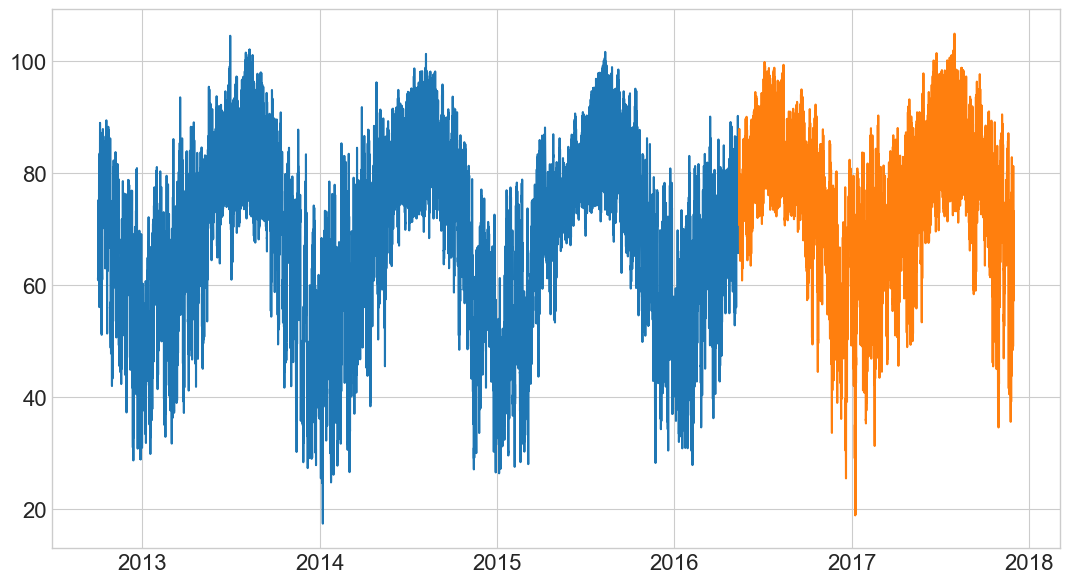

In [4]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

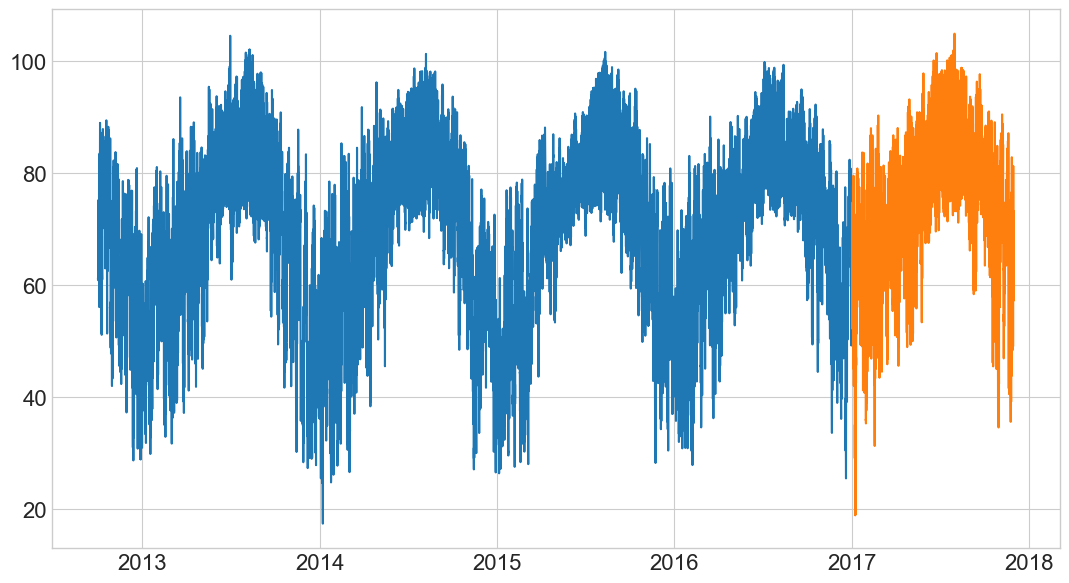

In [5]:
train = df.loc[:'2016'] # includes 2016
test = df.loc['2017']

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

In [6]:
train.head()

temp
datetime                      
2012-10-01 13:00:00  61.052000
2012-10-01 14:00:00  61.076568
2012-10-01 15:00:00  61.139294
2012-10-01 16:00:00  61.202020
2012-10-01 17:00:00  61.264747

In [7]:
train.loc["2012"].shape

(2195, 1)

In [8]:
y_train = train.temp
y = train.temp
y_train.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

Text(0.5, 1.0, 'Distribution of Temp')

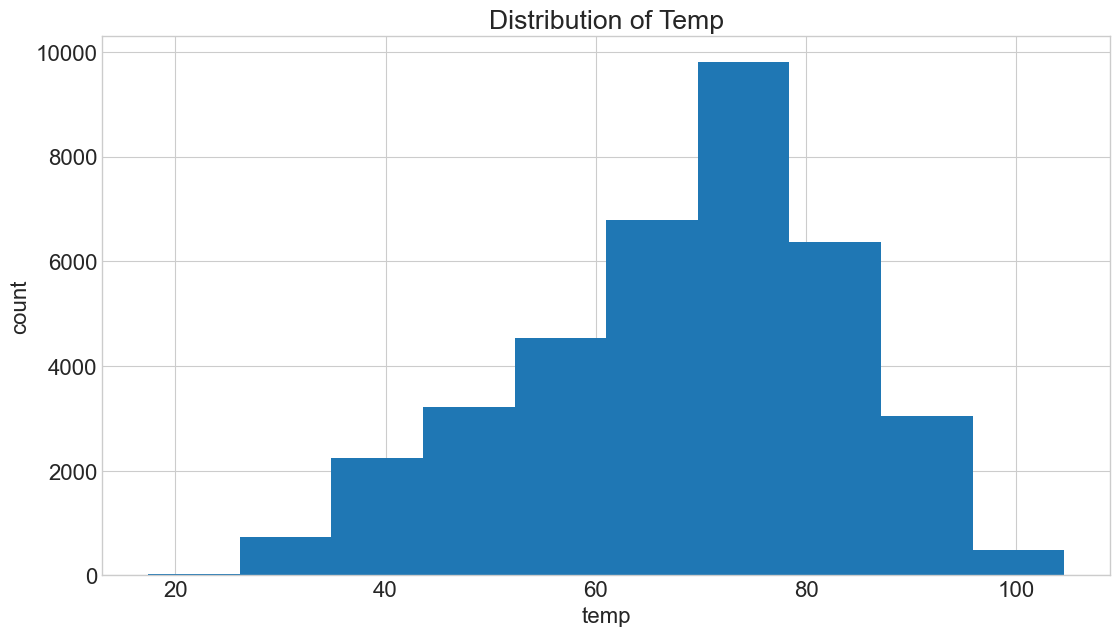

In [9]:
y_train.plot.hist()
plt.xlabel("temp")
plt.ylabel("count")
plt.title("Distribution of Temp")

[Text(0.5, 1.0, 'Average Temperature by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Temp (F)')]

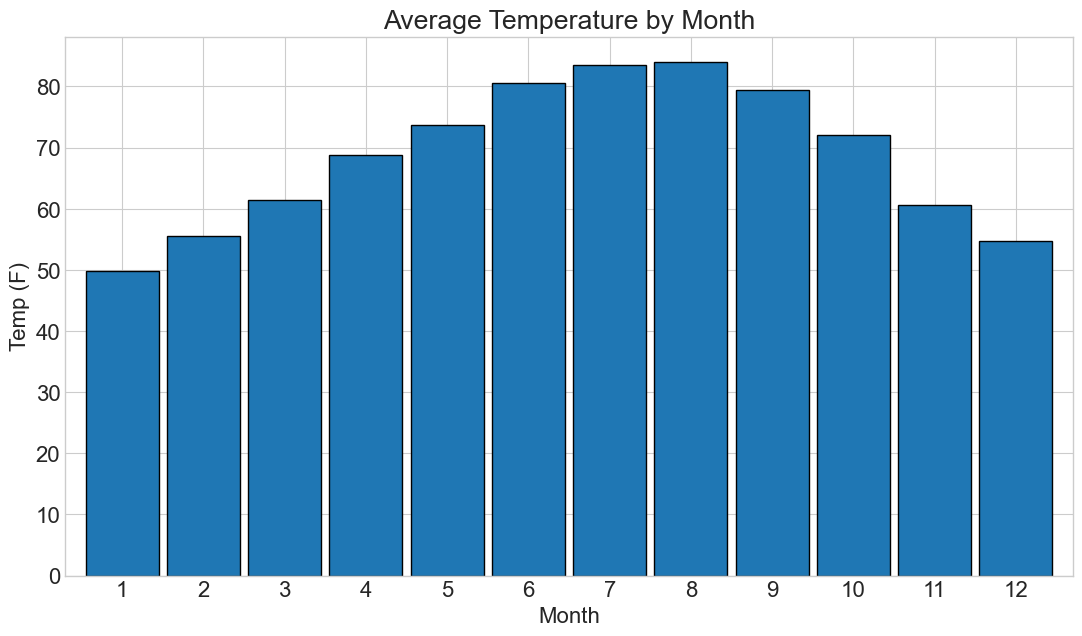

In [10]:
ax = y_train.groupby(y_train.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Month', xlabel='Month', ylabel='Temp (F)')

[Text(0.5, 1.0, 'Average Temperature by Week'),
 Text(0.5, 0, 'Week'),
 Text(0, 0.5, 'Temp (F)')]

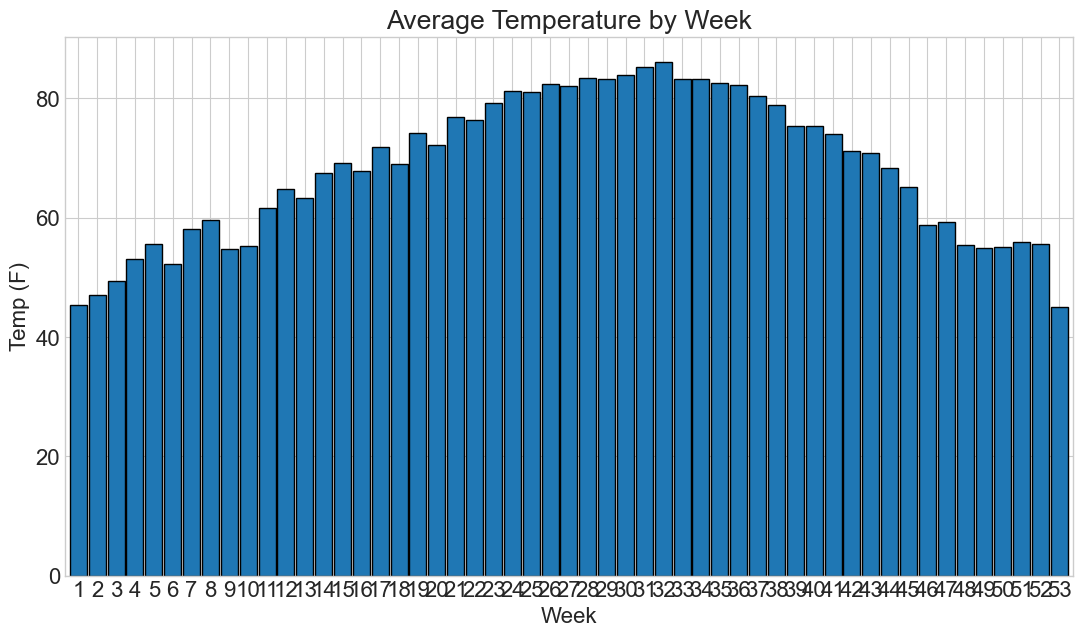

In [11]:
ax = y_train.groupby(y_train.index.isocalendar().week).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Week', xlabel='Week', ylabel='Temp (F)')

[Text(0.5, 1.0, 'Average Temperature by Weekday'),
 Text(0.5, 30.0, 'Weekday'),
 Text(30.0, 0.5, 'Temp (F)')]

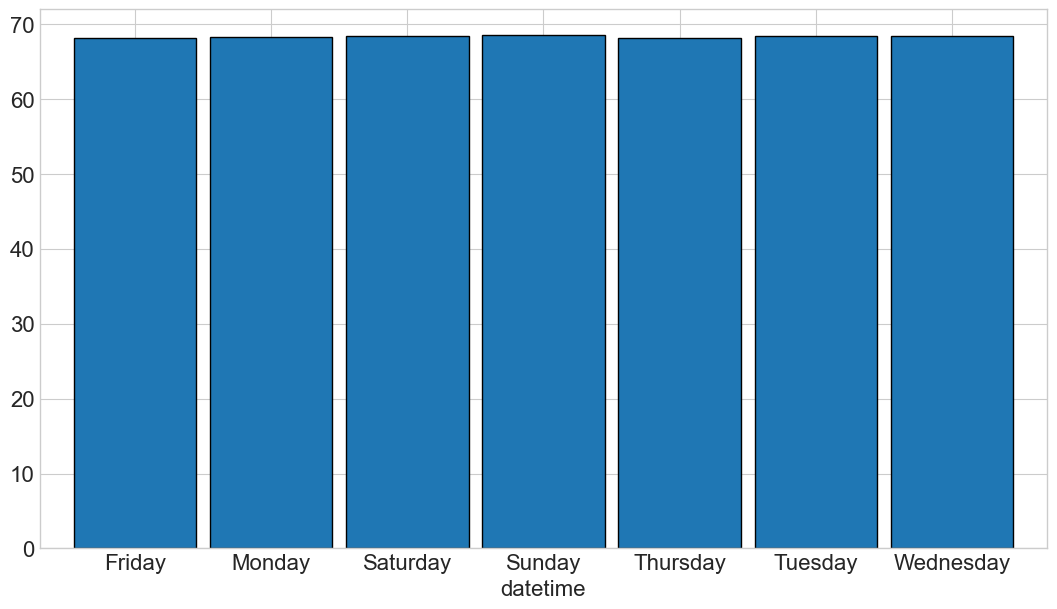

In [12]:
y_train.groupby(y_train.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Temperature by Weekday', xlabel='Weekday', ylabel='Temp (F)')


<AxesSubplot: xlabel='datetime'>

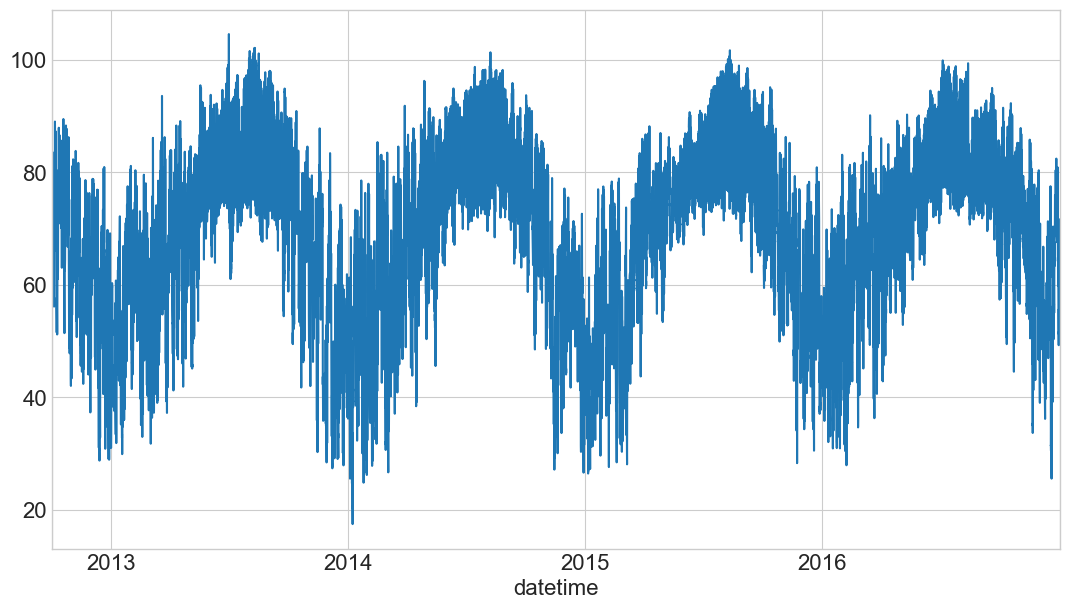

In [13]:
y_train.plot()

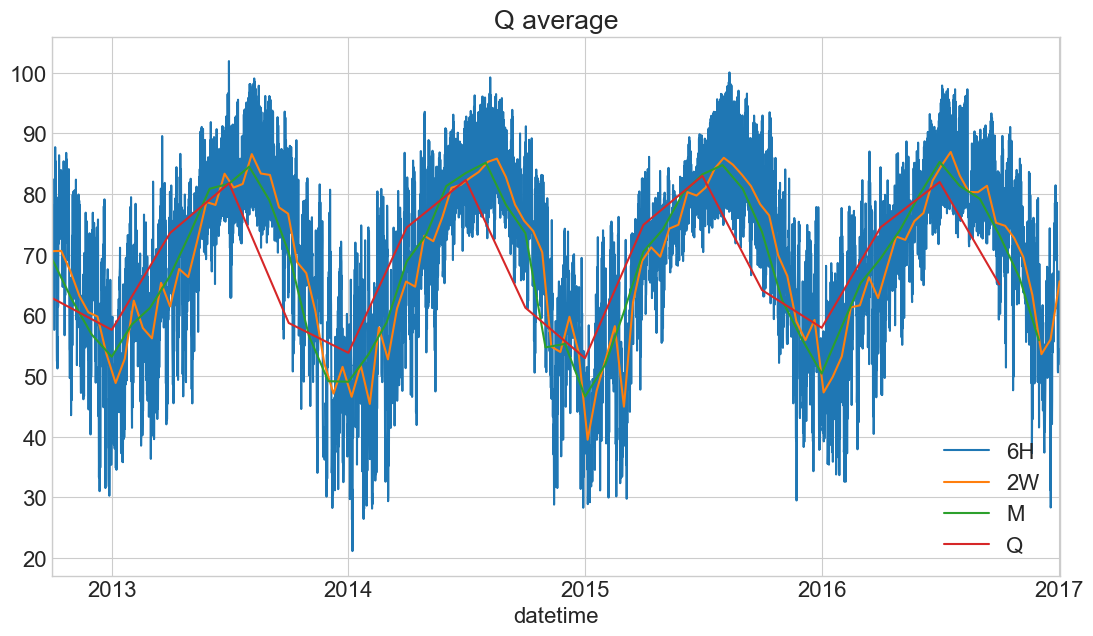

In [14]:
for i in ["6H","2W","M","Q"]:
    y_train.resample(i).mean().plot(title=f'{i} average',label=i)
plt.legend()
plt.show()

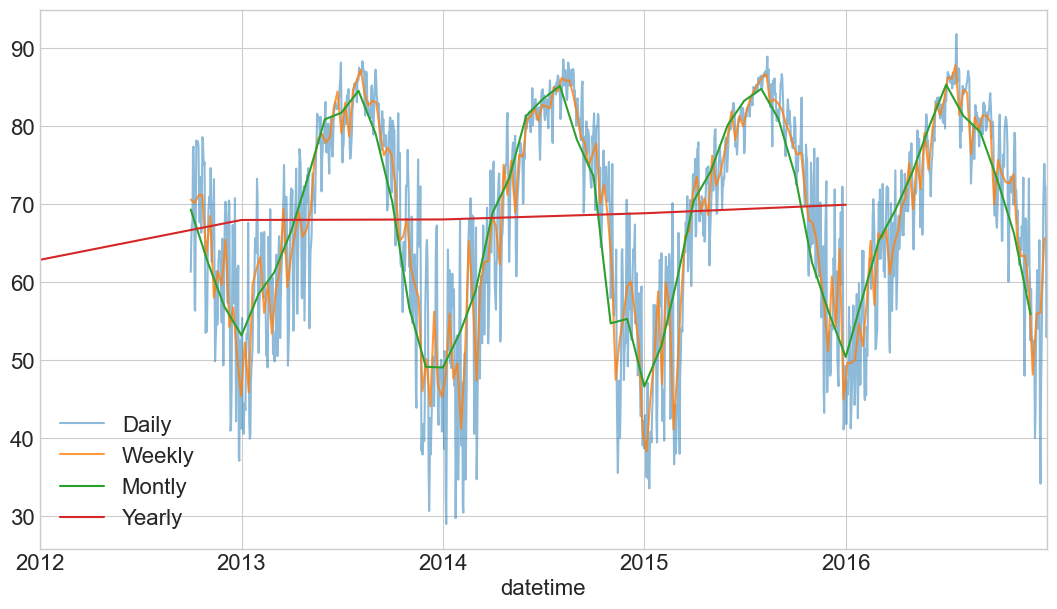

In [15]:
y_train.resample('D').mean().plot(alpha=.5, label='Daily')
y_train.resample('W').mean().plot(alpha=.8, label='Weekly')
y_train.resample('M').mean().plot(label='Montly')
y_train.resample('Y').mean().plot(label='Yearly')
plt.legend()

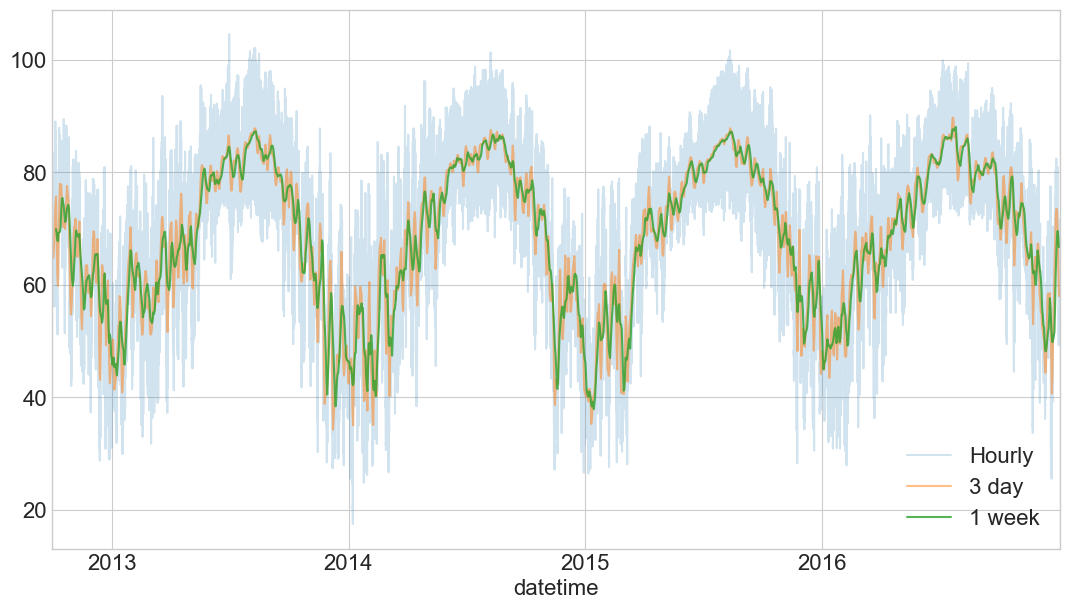

In [16]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=.8, label='1 week')
plt.legend()

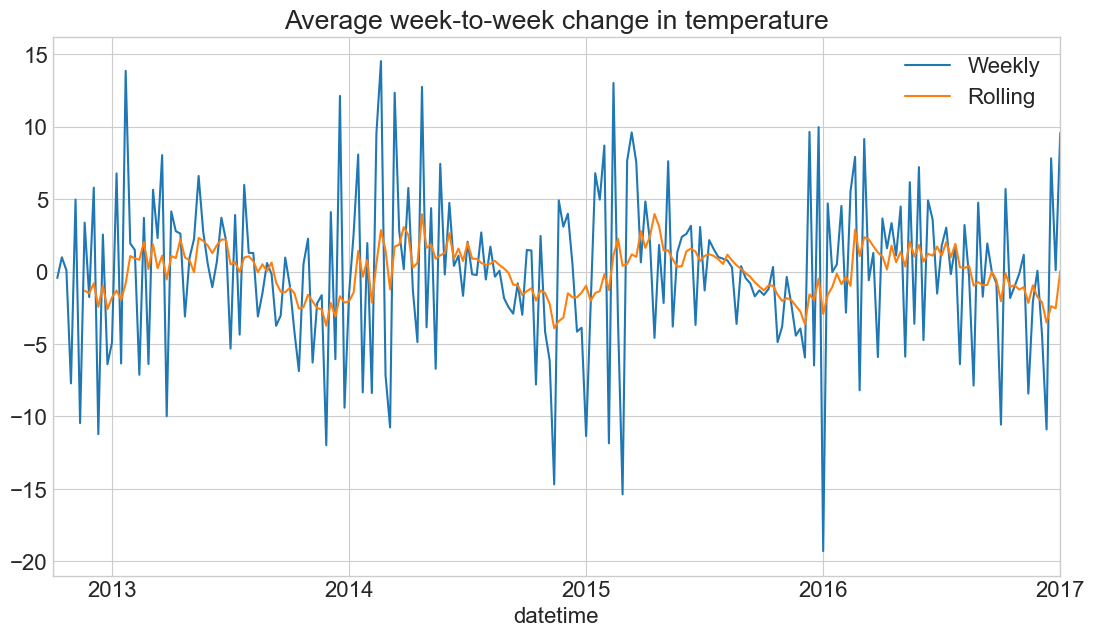

In [17]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature',label="Weekly")
y.resample('W').mean().rolling(7).mean().diff().plot(title='Average week-to-week change in temperature',label="Rolling")
plt.legend()

<AxesSubplot: title={'center': 'Average month-to-month change in temperature'}, xlabel='datetime'>

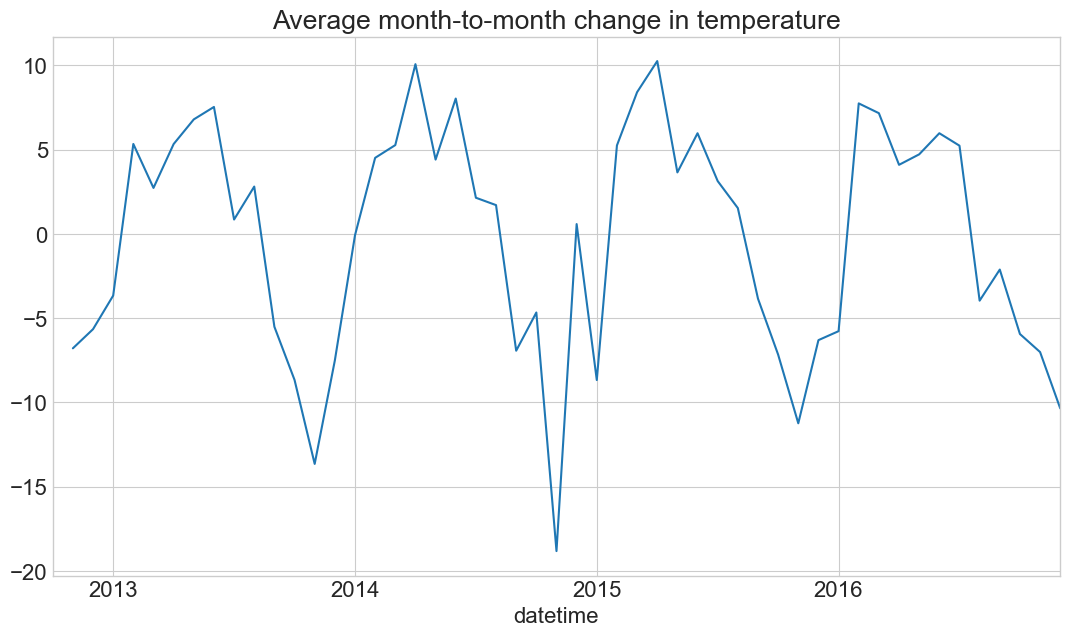

In [18]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')


In [19]:
y.groupby([y.index.year, y.index.month]).mean().head()

datetime  datetime
2012      10          69.318705
          11          62.521575
          12          56.860014
2013      1           53.192333
          2           58.522799
Name: temp, dtype: float64

<AxesSubplot: title={'center': 'Seasonal Plot'}, xlabel='datetime'>

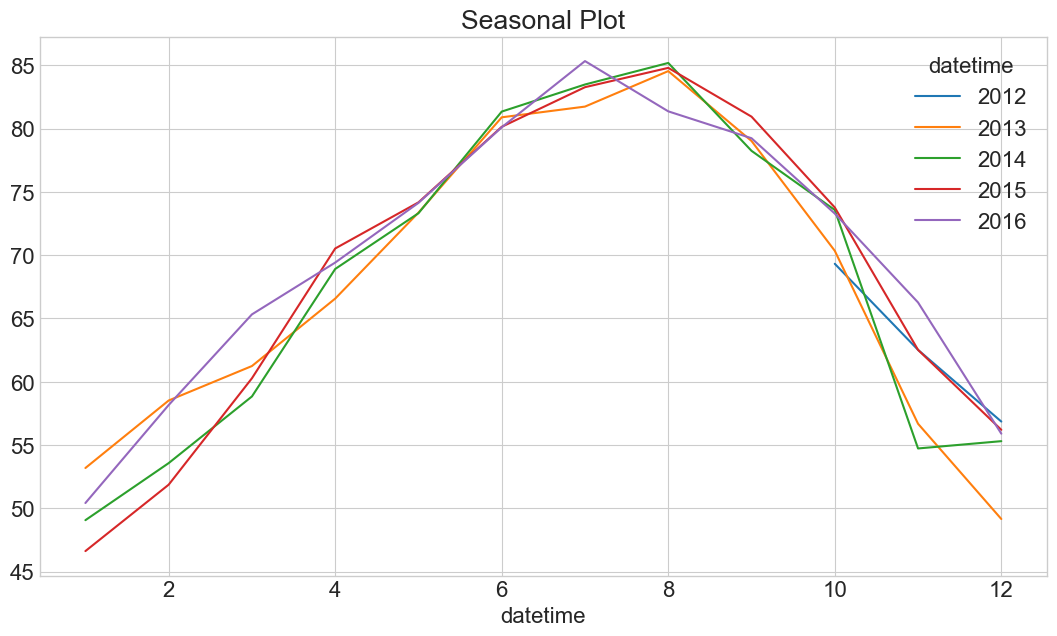

In [20]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_49596/2954427800.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ax, (month, subset) in zip(axs, table.iteritems()):


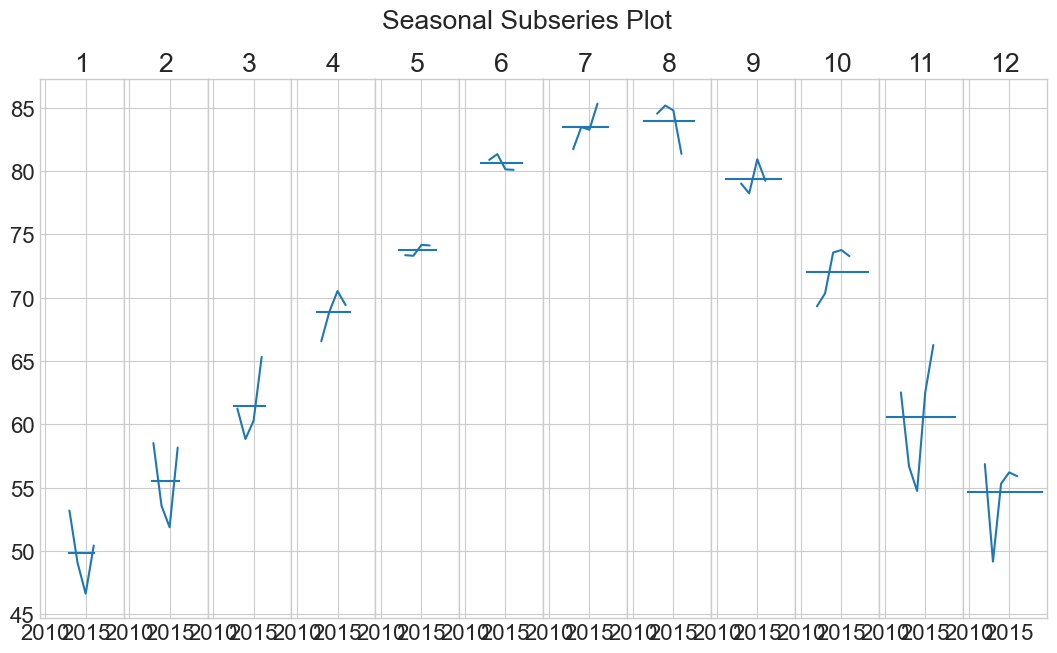

In [21]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


#Here each subplot column represents one month, 
# and within the each subplot we see how the average temperature 
# for that month has changed from year to year. 
# The dashed black line across the middle of each subplot represents 
# the average temperature for that month.

Text(0.5, 1.0, 'Lag plot with lag=1')

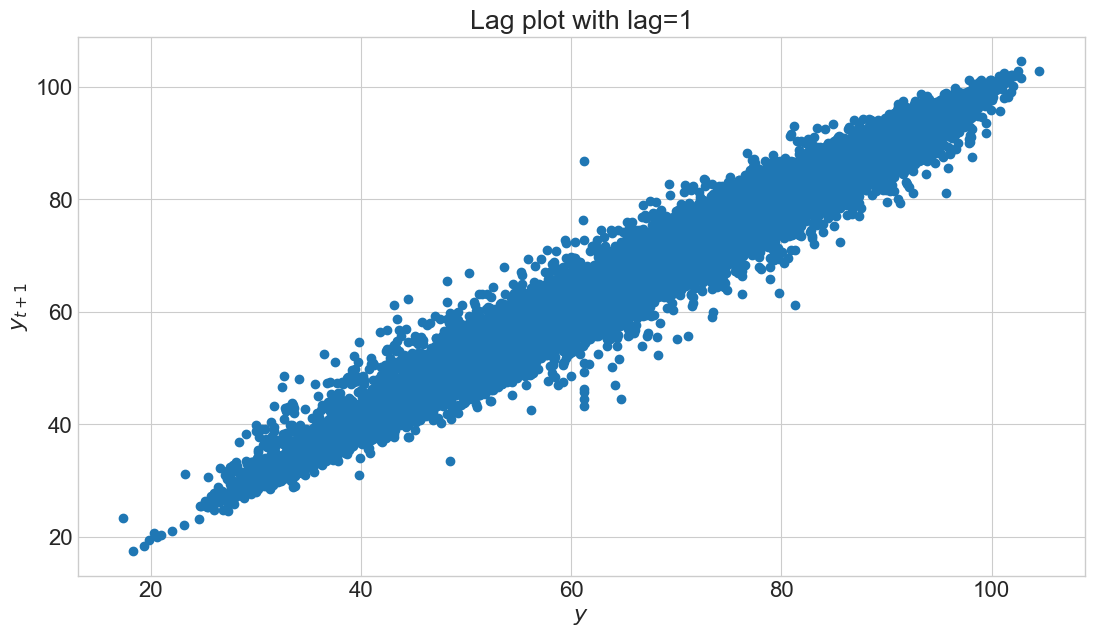

In [22]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')


/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_49596/3662136212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t + 1)'] = train.temp.shift(-1)


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

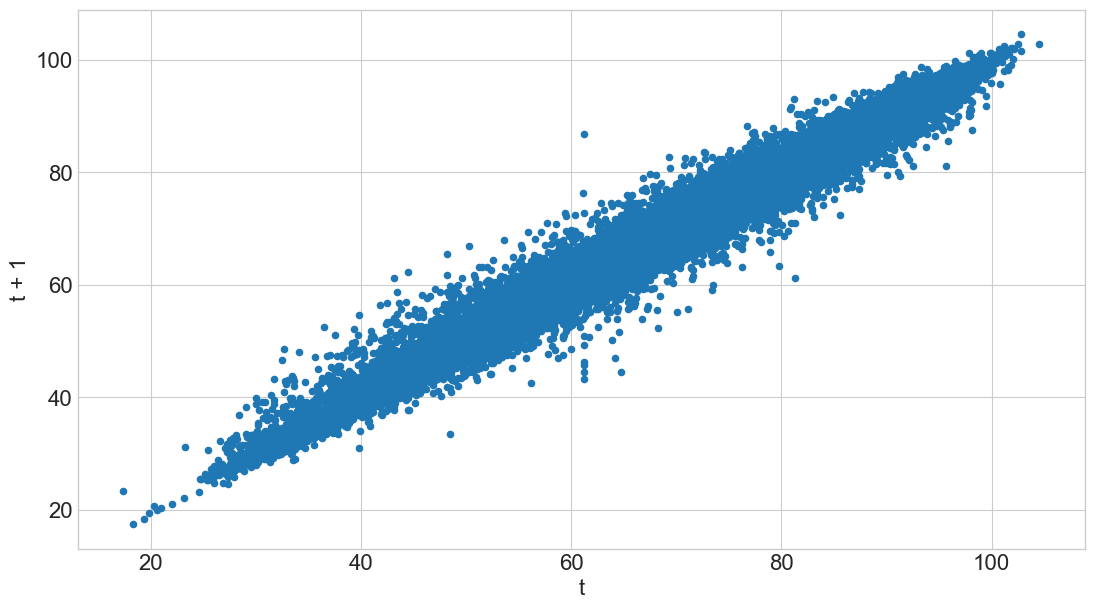

In [23]:
train['y(t + 1)'] = train.temp.shift(-1)
ax = train.plot.scatter(x='temp', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')


In [24]:
del train['y(t + 1)']

this_week  the_next_week
datetime                            
2012-10-07  70.595201      70.152821
2012-10-14  70.152821      71.138375
2012-10-21  71.138375      71.230464
2012-10-28  71.230464      63.510554
2012-11-04  63.510554      68.482625
...               ...            ...
2016-12-04  59.062094      48.163625
2016-12-11  48.163625      55.979132
2016-12-18  55.979132      56.073143
2016-12-25  56.073143      65.640625
2017-01-01  65.640625            NaN

[222 rows x 2 columns]

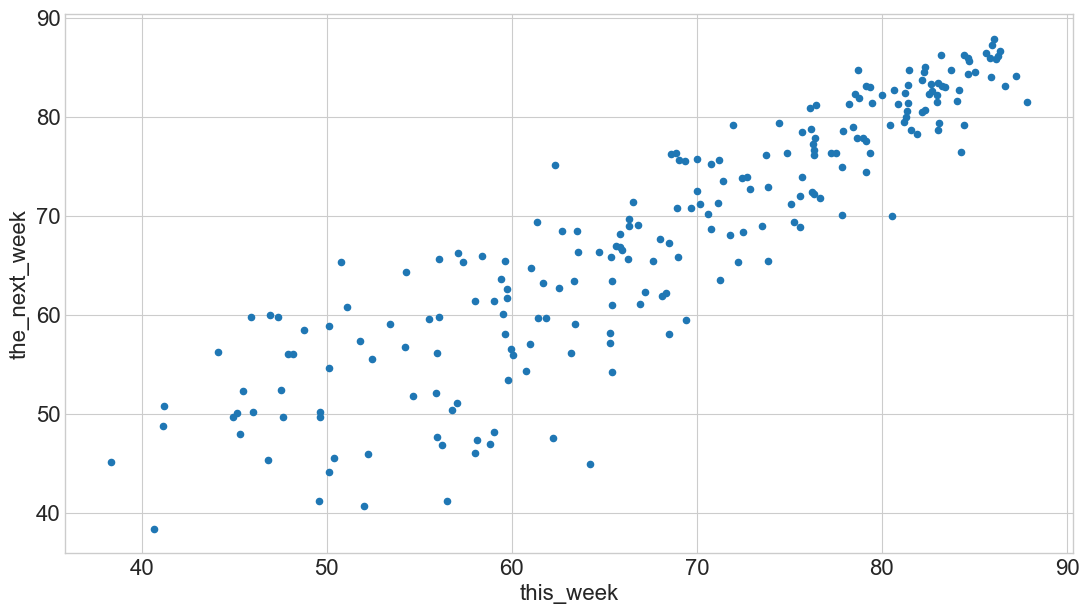

In [25]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.temp.shift(-1)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly


this_week  12_weeks_out
datetime                           
2012-10-07  70.595201     50.376741
2012-10-14  70.152821     45.473616
2012-10-21  71.138375     52.252877
2012-10-28  71.230464     45.907936
2012-11-04  63.510554     59.763739
...               ...           ...
2016-12-04  59.062094           NaN
2016-12-11  48.163625           NaN
2016-12-18  55.979132           NaN
2016-12-25  56.073143           NaN
2017-01-01  65.640625           NaN

[222 rows x 2 columns]

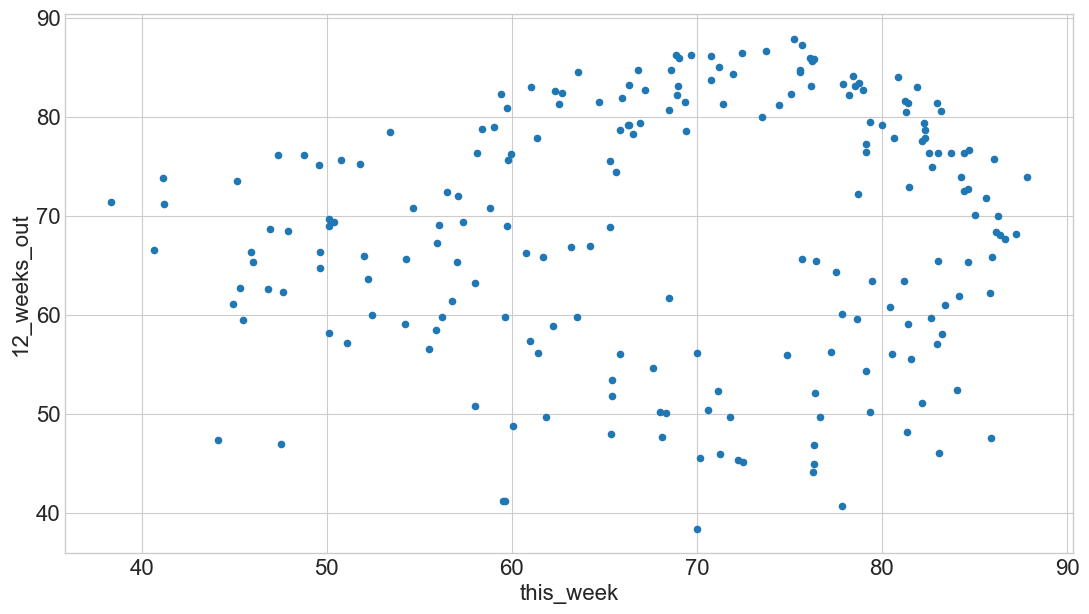

In [26]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly


this_week  half_a_year_later
datetime                                
2012-10-07  70.595201          63.558611
2012-10-14  70.152821          66.345532
2012-10-21  71.138375          68.965502
2012-10-28  71.230464          65.862071
2012-11-04  63.510554          66.797107
...               ...                ...
2016-12-04  59.062094                NaN
2016-12-11  48.163625                NaN
2016-12-18  55.979132                NaN
2016-12-25  56.073143                NaN
2017-01-01  65.640625                NaN

[222 rows x 2 columns]

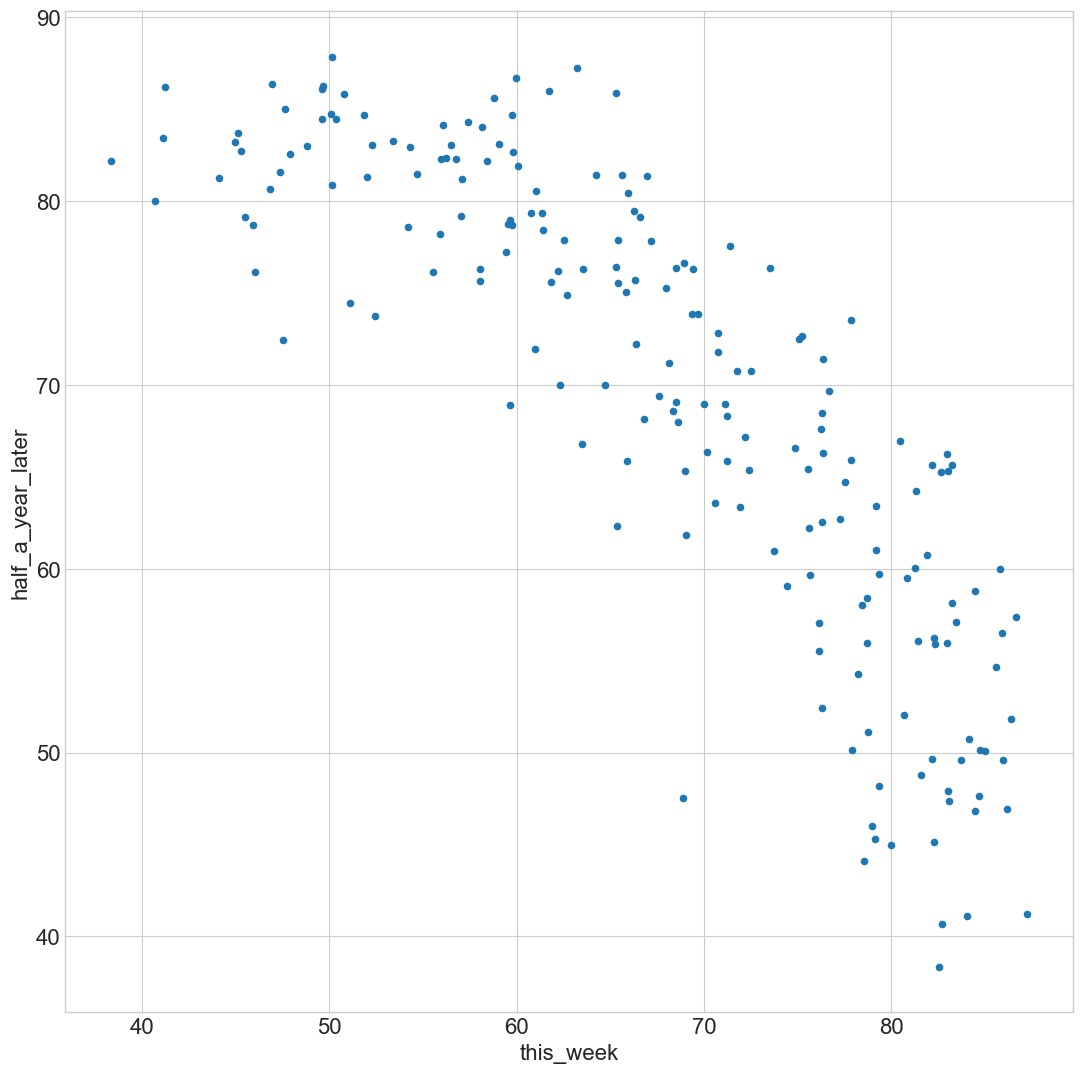

In [27]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly


<AxesSubplot: xlabel='y(t)', ylabel='y(t + 26)'>

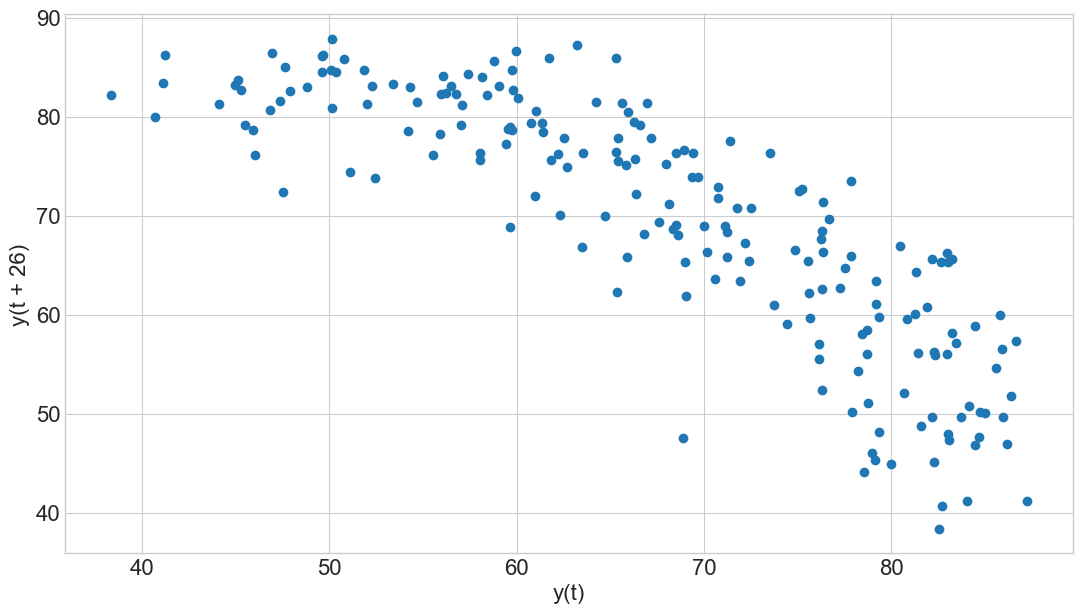

In [28]:
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)


<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

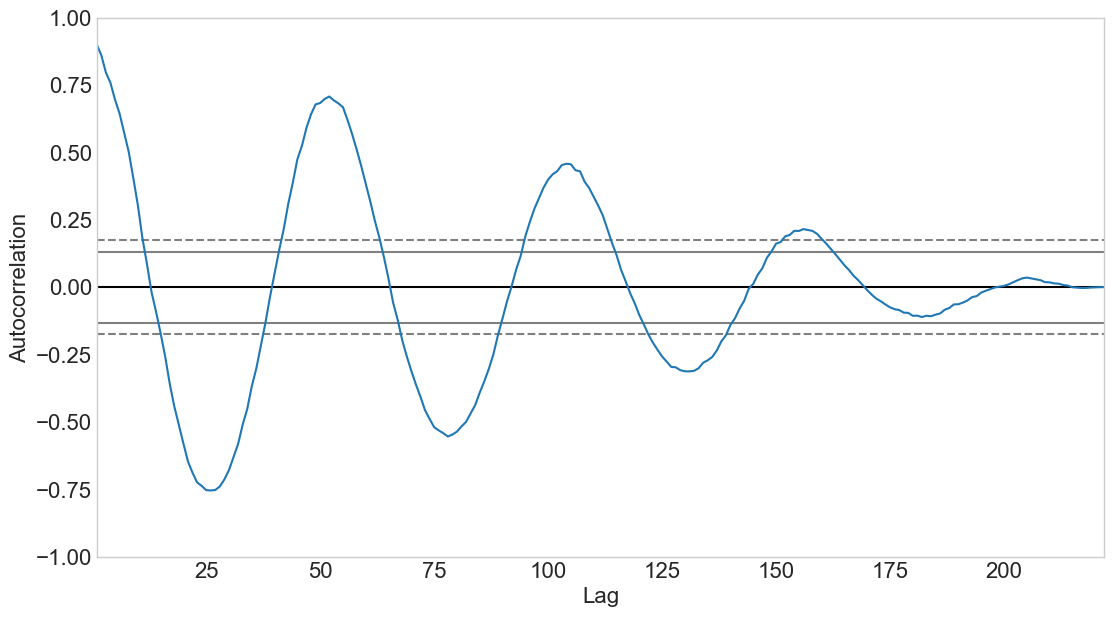

In [29]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())


Seasonal decomposition is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise1.   

There are two types of seasonal decomposition models, additive and multiplicative. 


Additive seasonal decomposition model:
yt=St+Tt+Rt

Multiplicative model:
yt=St×Tt×Rt

We can use the seasonal_decompose function from the statsmodels library to perform this decomposition.

In [30]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


y  trend  seasonal  resid
datetime                                     
2012-10-07  70.595201    NaN  8.545501    NaN
2012-10-14  70.152821    NaN  7.255470    NaN
2012-10-21  71.138375    NaN  2.468309    NaN
2012-10-28  71.230464    NaN  1.820126    NaN
2012-11-04  63.510554    NaN -0.114287    NaN

<AxesSubplot: xlabel='datetime'>

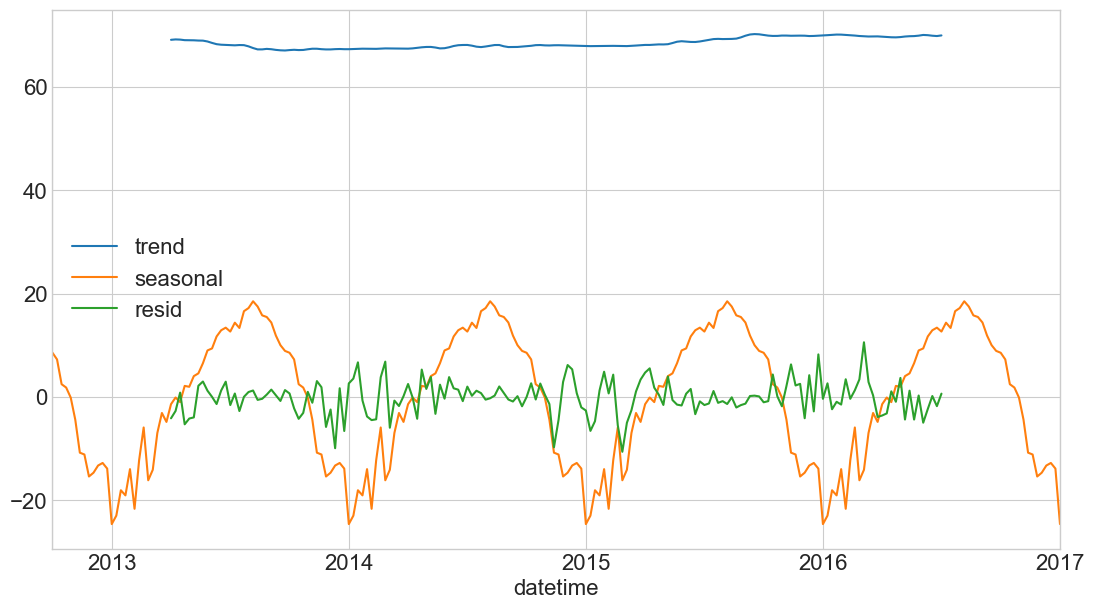

In [31]:
decomposition.iloc[:, 1:].plot()

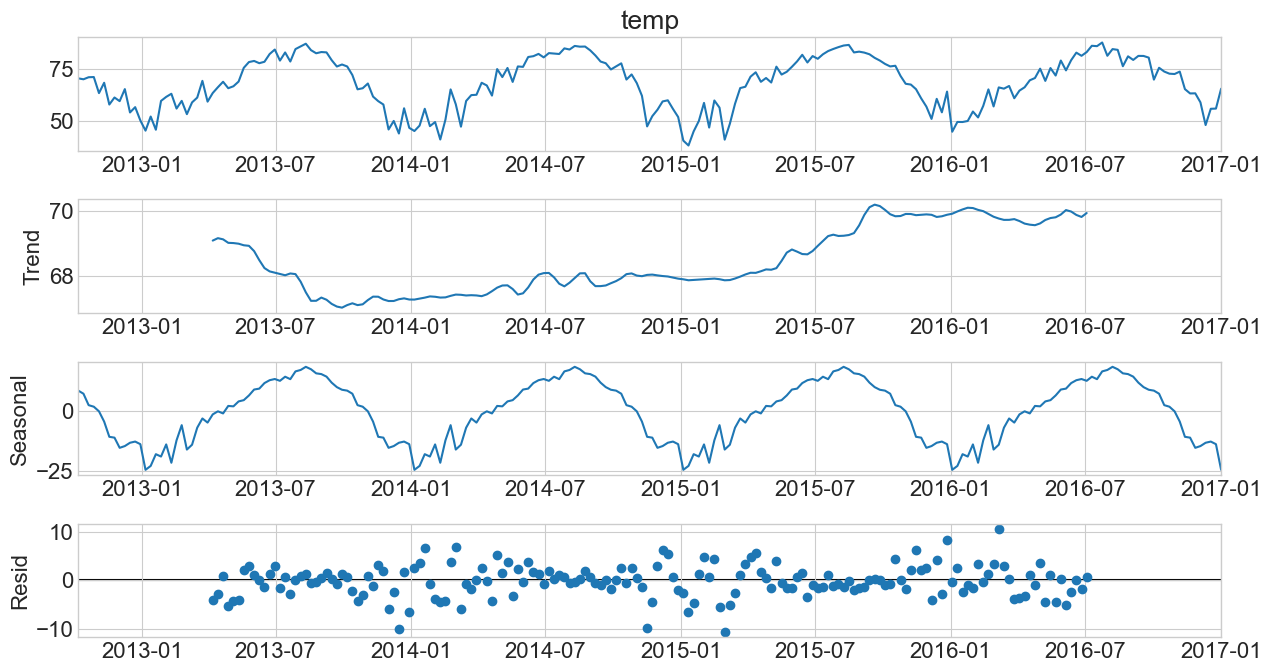

In [32]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [33]:
train = train.resample('D').mean()
# create a categorical feature
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').mean()

temp
temp_bin           
cold      49.381699
cool      65.200219
warm      75.447977
hot       83.449087

In [34]:
train.groupby('temp_bin').resample('M').size().unstack(0)

temp_bin    cold  cool  warm   hot
datetime                          
2012-10-31   6.0   9.0  16.0   NaN
2012-11-30  10.0  16.0   4.0   NaN
2012-12-31  16.0  14.0   1.0   NaN
2013-01-31  24.0   5.0   2.0   NaN
2013-02-28  17.0  11.0   0.0   NaN
2013-03-31  11.0  16.0   4.0   NaN
2013-04-30   7.0  14.0   9.0   NaN
2013-05-31   1.0   8.0  16.0   6.0
2013-06-30   0.0   0.0  12.0  18.0
2013-07-31   0.0   0.0   9.0  22.0
2013-08-31   0.0   0.0   1.0  30.0
2013-09-30   0.0   2.0  16.0  12.0
2013-10-31   1.0  13.0  14.0   3.0
2013-11-30  15.0  13.0   2.0   0.0
2013-12-31  24.0   7.0   0.0   0.0
2014-01-31  26.0   5.0   0.0   0.0
2014-02-28  18.0   9.0   1.0   0.0
2014-03-31  13.0  17.0   1.0   0.0
2014-04-30   4.0  11.0  13.0   2.0
2014-05-31   0.0   8.0  22.0   1.0
2014-06-30   0.0   0.0   5.0  25.0
2014-07-31   0.0   0.0   3.0  28.0
2014-08-31   0.0   0.0   0.0  31.0
2014-09-30   0.0   2.0  18.0  10.0
2014-10-31   0.0   9.0  16.0   6.0
2014-11-30  20.0   9.0   1.0   0.0
2014-12-31  20.0  11.0   0.0   0.0
2015-01-31  29.0   2.0   0.0   0.0
2015-02-28  18.0  10.0   0.0   0.0
2015-03-31  11.0  17.0   3.0   0.0
2015-04-30   0.0  16.0  14.0   0.0
2015-05-31   0.0   5.0  26.0   0.0
2015-06-30   0.0   0.0  11.0  19.0
2015-07-31   0.0   0.0   2.0  29.0
2015-08-31   0.0   0.0   1.0  30.0
2015-09-30   0.0   0.0  11.0  19.0
2015-10-31   0.0   7.0  21.0   3.0
2015-11-30   8.0  17.0   5.0   0.0
2015-12-31  18.0  11.0   2.0   0.0
2016-01-31  29.0   2.0   0.0   0.0
2016-02-29  12.0  16.0   1.0   0.0
2016-03-31   5.0  18.0   8.0   0.0
2016-04-30   1.0  16.0  13.0   0.0
2016-05-31   0.0   7.0  21.0   3.0
2016-06-30   0.0   0.0  11.0  19.0
2016-07-31   0.0   0.0   3.0  28.0
2016-08-31   0.0   0.0  10.0  21.0
2016-09-30   0.0   2.0  10.0  18.0
2016-10-31   0.0   8.0  18.0   5.0
2016-11-30   4.0  19.0   7.0   NaN
2016-12-31  21.0   6.0   4.0   NaN

Text(0, 0.5, '% of days in the month')

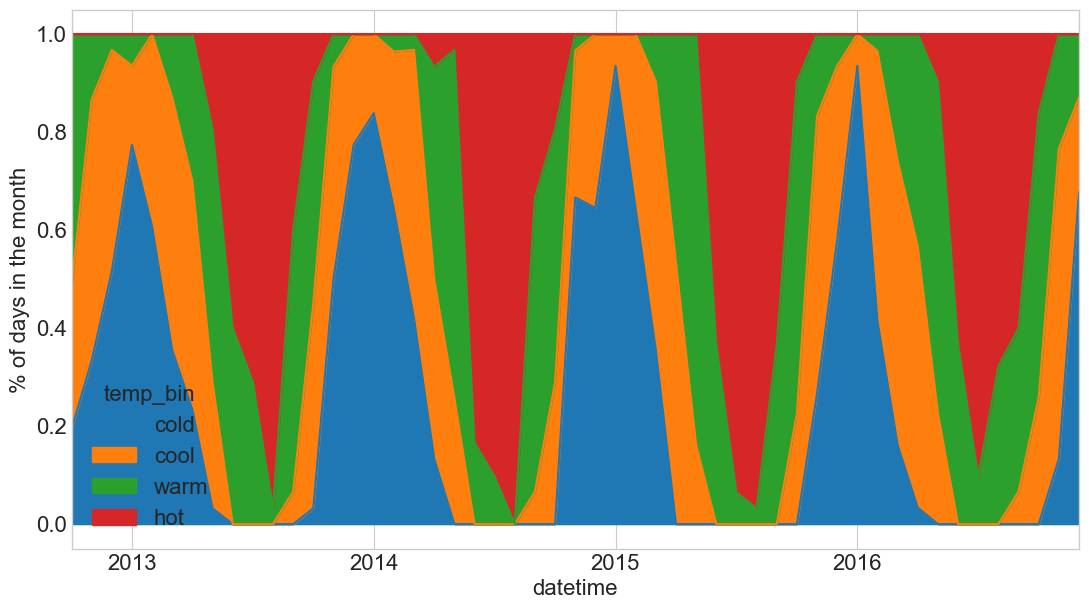

In [35]:
(train.groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_49596/3509110378.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = (train['2015'].groupby('temp_bin').resample('M').\


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

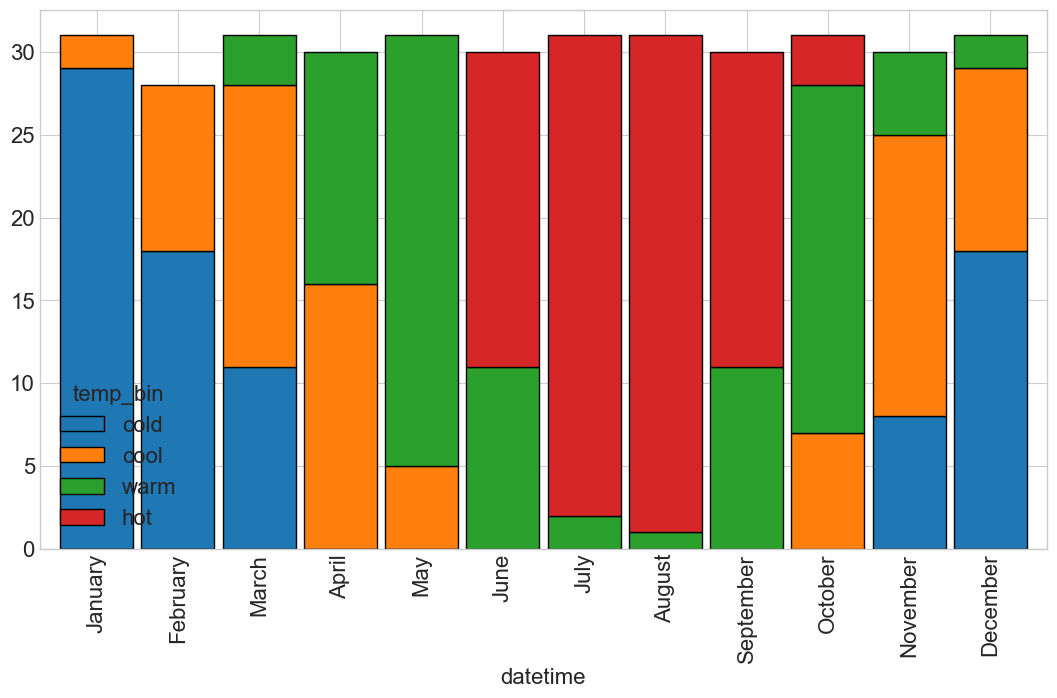

In [36]:
ax = (train['2015'].groupby('temp_bin').resample('M').\
    size().unstack(0).plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)


In [37]:
train.head()

temp temp_bin
datetime                      
2012-10-01  61.330942     cool
2012-10-02  65.678822     cool
2012-10-03  67.411250     cool
2012-10-04  67.703750     cool
2012-10-05  77.073125     warm

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_49596/536148800.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ax = (train['2015']


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

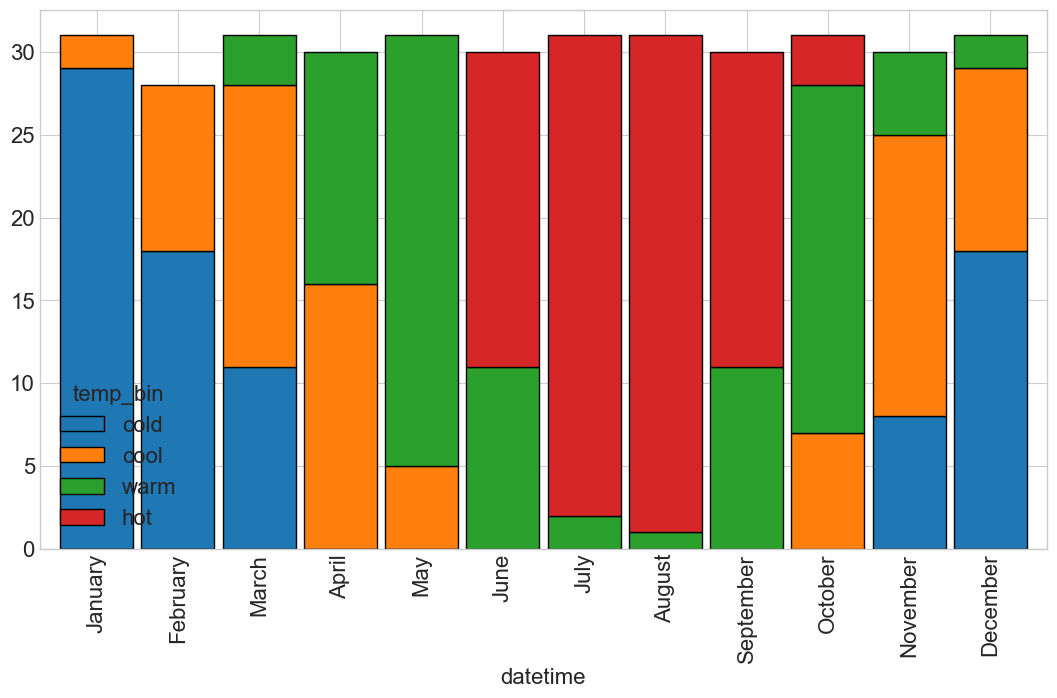

In [38]:
ax = (train['2015']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

A common problem we can run into when visualizing time series data is that the order of the months or days of the week logically is not the same as the order alphabetically. One workaround for this is to format the dates such that the have a number prepended to them (for example, 0-sunday, 1-monday) and the plot. Once the plot is created, we can manipulate the tick labels and remove the prefix.

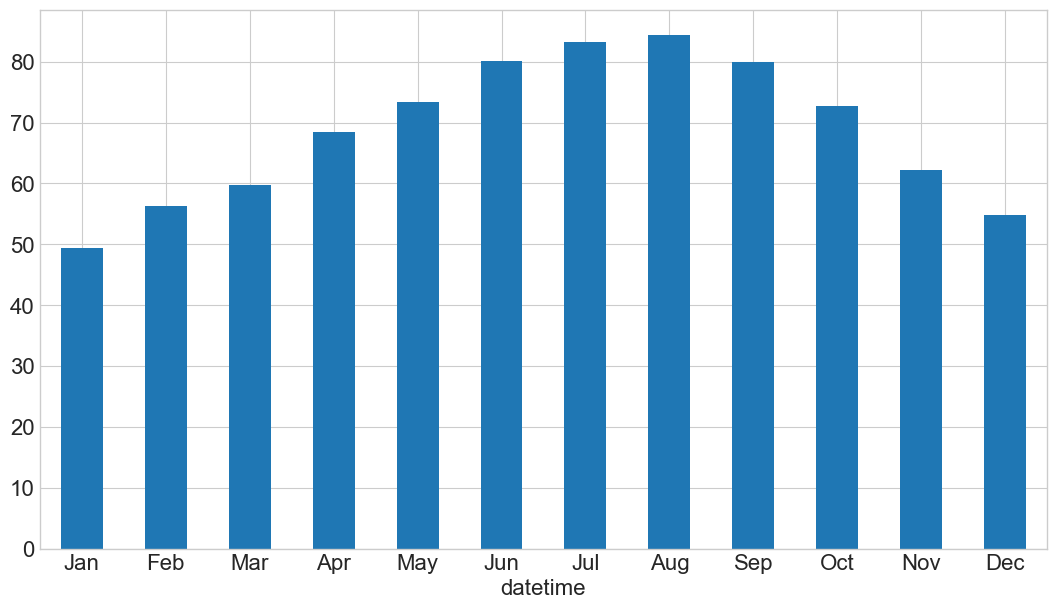

In [39]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

If you wish to apply custom formatting to your axes, you should use plt.plot or ax.plot and pass the datetime index as your x values as opposed to using the built-in pandas plotting methods.

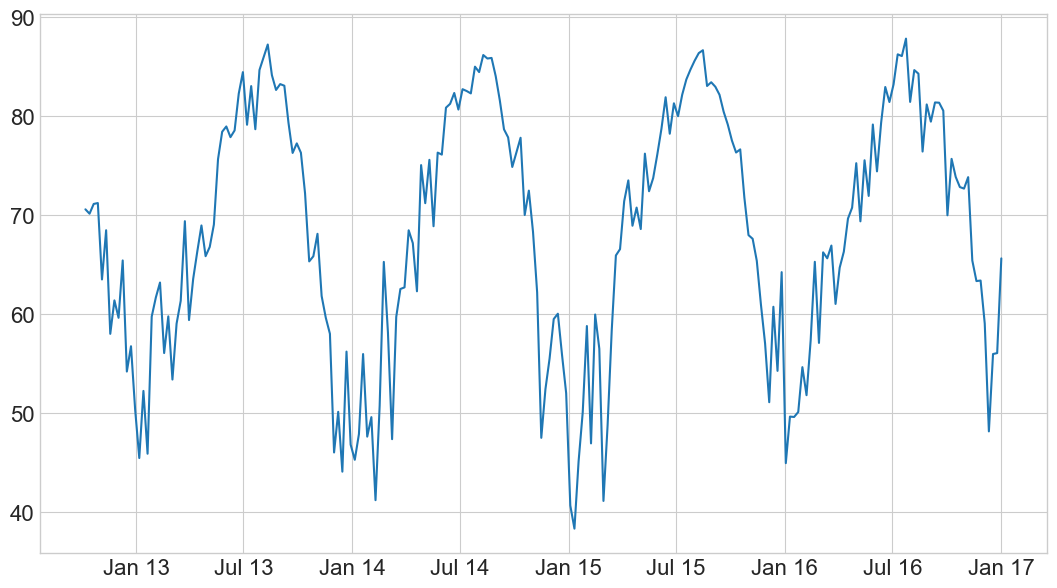

In [40]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))


# Do your work for this exercise in a notebook named explore. 
# Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

# For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. 
# For both datasets you should choose a method of splitting your data and only explore the training split.

is null before
 Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64
is null after
 Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64


Consumption     Wind   Solar  Wind+Solar     month  year
Date                                                                
2006-01-01   1069.18400    0.000   0.000       0.000   January  2006
2006-01-02   1380.52100    0.000   0.000       0.000   January  2006
2006-01-03   1442.53300    0.000   0.000       0.000   January  2006
2006-01-04   1457.21700    0.000   0.000       0.000   January  2006
2006-01-05   1477.13100    0.000   0.000       0.000   January  2006
...                 ...      ...     ...         ...       ...   ...
2017-12-27   1263.94091  394.507  16.530     411.037  December  2017
2017-12-28   1299.86398  506.424  14.162     520.586  December  2017
2017-12-29   1295.08753  584.277  29.854     614.131  December  2017
2017-12-30   1215.44897  721.247   7.467     728.714  December  2017
2017-12-31   1107.11488  721.176  19.980     741.156  December  2017

[4383 rows x 6 columns]

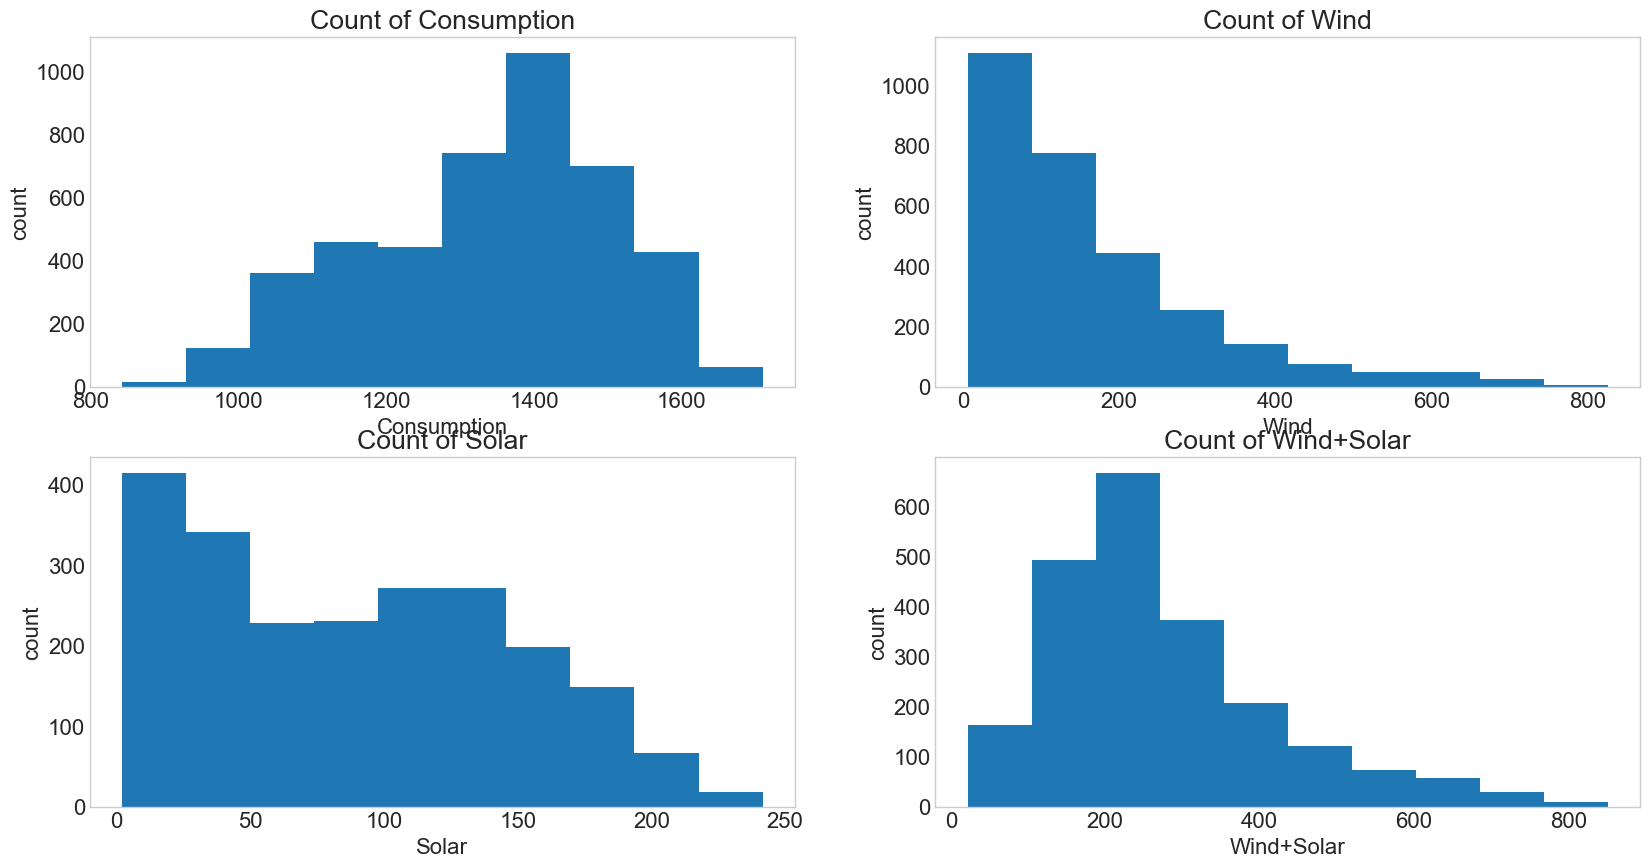

In [41]:
df1 = prepare.prep_germany_opsd()
target1 = "Consumption"
df1

store ids = [ 1  2  3  4  5  6  7  8  9 10] | store cities = ['San Antonio'] | store states = ['TX']
sale amount count = 213 | sale date count = 1826
item brand count = 49 | item name count = 50 | item_price count = 47


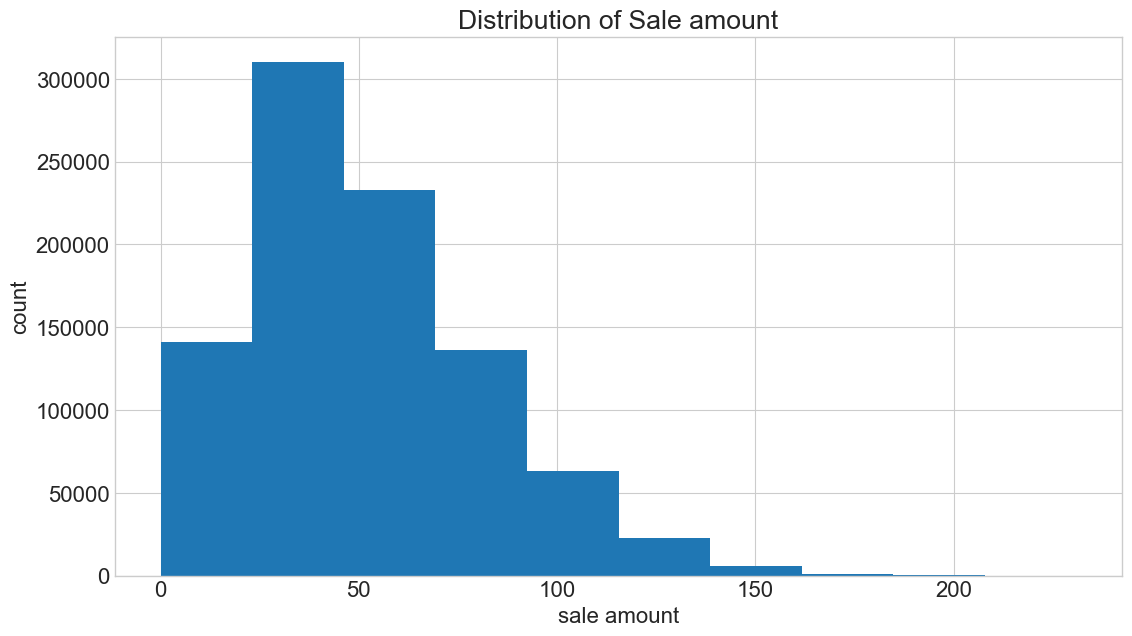

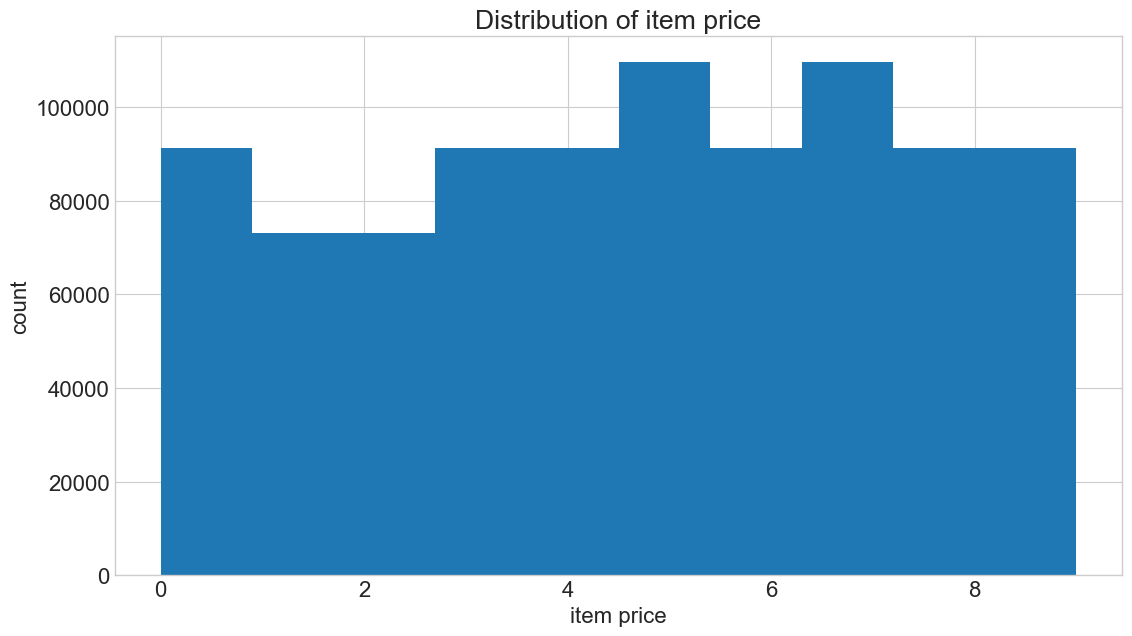

sale_amount  store           store_address   store_city  \
sale_date                                                             
2013-01-01         13.0      1  12125 Alamo Ranch Pkwy  San Antonio   
2013-01-01         26.0      7  12018 Perrin Beitel Rd  San Antonio   
2013-01-01         27.0      7  12018 Perrin Beitel Rd  San Antonio   
2013-01-01         54.0      8     15000 San Pedro Ave  San Antonio   
2013-01-01         35.0      9      735 SW Military Dr  San Antonio   
...                 ...    ...                     ...          ...   
2017-12-31         21.0      9      735 SW Military Dr  San Antonio   
2017-12-31         32.0     10    8503 NW Military Hwy  San Antonio   
2017-12-31         55.0      1  12125 Alamo Ranch Pkwy  San Antonio   
2017-12-31        100.0      8     15000 San Pedro Ave  San Antonio   
2017-12-31         82.0     10    8503 NW Military Hwy  San Antonio   

           store_state  store_zipcode       item_brand  \
sale_date                                                
2013-01-01          TX          78253         Riceland   
2013-01-01          TX          78217          Mueller   
2013-01-01          TX          78217       Mama Marys   
2013-01-01          TX          78232          Mueller   
2013-01-01          TX          78221          Mueller   
...                ...            ...              ...   
2017-12-31          TX          78221            Halls   
2017-12-31          TX          78231            Halls   
2017-12-31          TX          78253      Natures Way   
2017-12-31          TX          78232  The First Years   
2017-12-31          TX          78231           Choice   

                                                    item_name  item_price  \
sale_date                                                                   
2013-01-01                     Riceland American Jazmine Rice        0.84   
2013-01-01  Mueller Sport Care Basic Support Level Medium ...        8.40   
2013-01-01                                        Pizza Sauce        4.65   
2013-01-01  Mueller Sport Care Basic Support Level Medium ...        8.40   
2013-01-01  Mueller Sport Care Basic Support Level Medium ...        8.40   
...                                                       ...         ...   
2017-12-31  Halls Menthol Cough Suppresant/oral Anesthetic...        4.17   
2017-12-31  Halls Menthol Cough Suppresant/oral Anesthetic...        4.17   
2017-12-31                     Natures Way Forskohlii - 60 Ct        5.19   
2017-12-31  Tomy The First Years Gumdrop Orthodontic Pacif...        6.52   
2017-12-31  Choice Organic Teas Black Tea Classic Black - ...        5.20   

               month day_of_week  sales_total  
sale_date                                      
2013-01-01   January     Tuesday        10.92  
2013-01-01   January     Tuesday       218.40  
2013-01-01   January     Tuesday       125.55  
2013-01-01   January     Tuesday       453.60  
2013-01-01   January     Tuesday       294.00  
...              ...         ...          ...  
2017-12-31  December      Sunday        87.57  
2017-12-31  December      Sunday       133.44  
2017-12-31  December      Sunday       285.45  
2017-12-31  December      Sunday       652.00  
2017-12-31  December      Sunday       426.40  

[913000 rows x 12 columns]

In [42]:
df0 = prepare.prep_sales()
target0 = "sales_total"
df0

In [43]:
def explore_split_time_series(df,target="",train_size=.6,validate_size=.2):
    ''' 
    input dataframe, target(as string), and train size(as float)
    splits based on size, seperates out into y(series) and train df (includes target)
    plots a few examples
    returns train, test,y_train,y_test
    '''
    n = df.shape[0]
    test_start_index = round((train_size+validate_size) * n)
    validate_start_index = round((train_size) * n)

    train = df[:validate_start_index] # everything up (not including) to the test_start_index
    validate = df[validate_start_index:test_start_index]
    test = df[test_start_index:] # everything from the test_start_index to the end

    y_train = train[target]
    print(train.shape,"train shape")

    y_validate = validate[target]
    print(validate.shape,"validate shape")
    
    y_test = test[target]
    print(test.shape,"test shape")

    plt.plot(train.index, train[target])
    plt.plot(validate.index, validate[target])
    plt.plot(test.index, test[target])
    plt.title(f"{target} over time")
    plt.ylabel(f"{target}")
    plt.xlabel("Time")
    plt.show()

    y_train.plot.hist()
    plt.title(f"{target} distribution (train)")
    plt.xlabel(f"{target}")
    plt.ylabel("Count")
    plt.show()

    return train, validate, test, y_train, y_validate, y_test

(547800, 12) train shape
(182600, 12) validate shape
(182600, 12) test shape


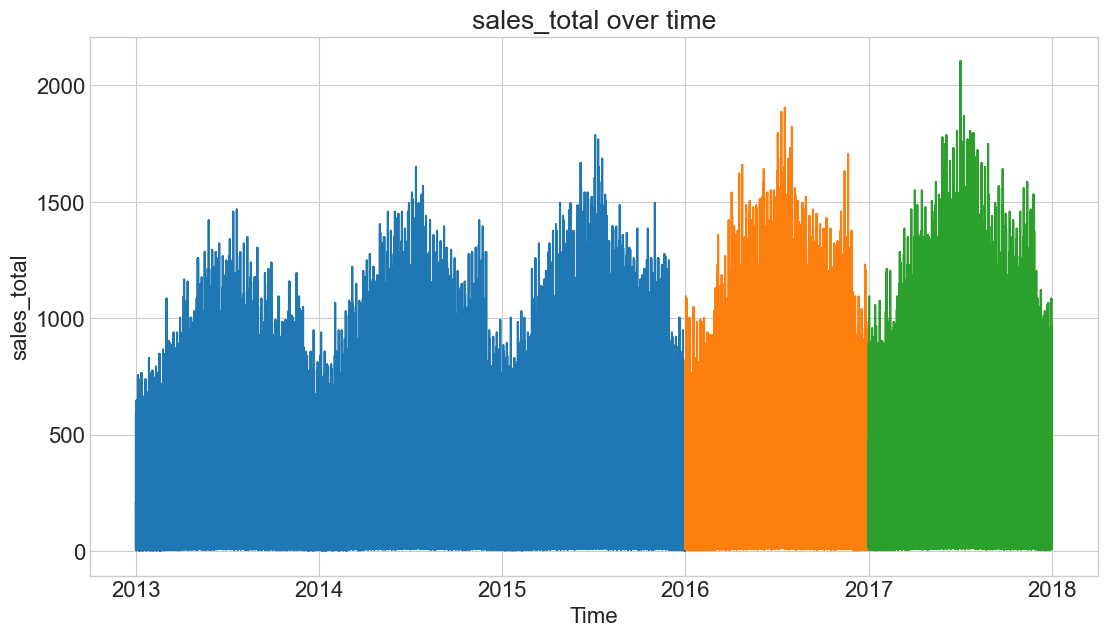

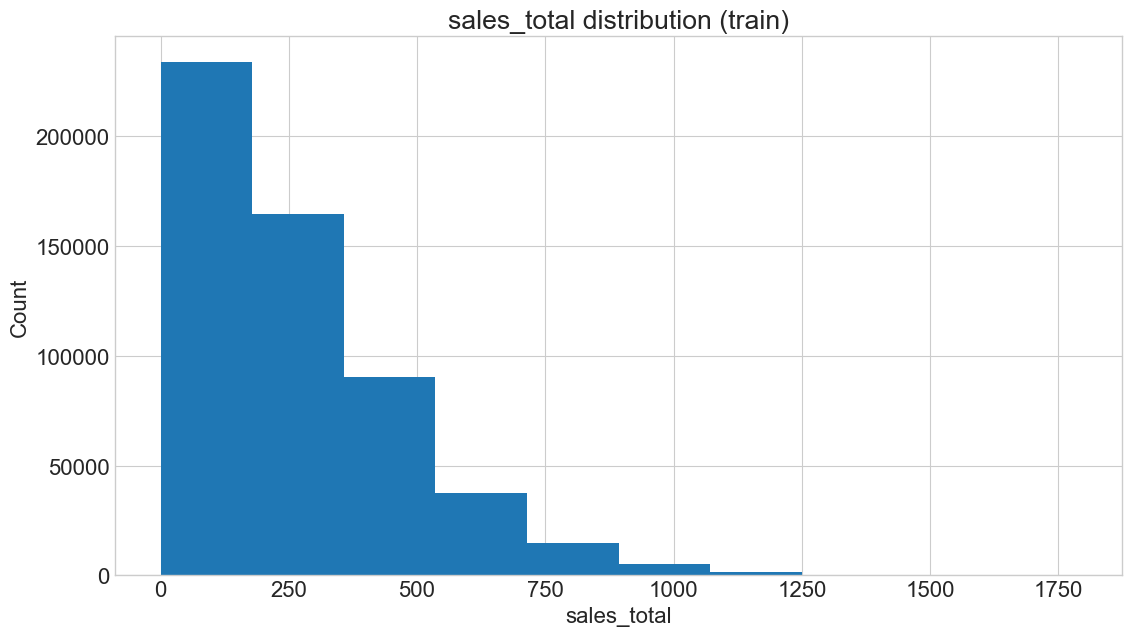

In [44]:
train0, validate0, test0, y_train0, y_validate0, y_test0 = explore_split_time_series(df0,target0)

In [45]:
for i in train.index.year.unique().tolist():
    print(str(i))

2012
2013
2014
2015
2016


In [46]:
train0.loc["2015"]

sale_amount  store            store_address   store_city  \
sale_date                                                              
2015-01-01         49.0      8      15000 San Pedro Ave  San Antonio   
2015-01-01         32.0      4          516 S Flores St  San Antonio   
2015-01-01         36.0      1   12125 Alamo Ranch Pkwy  San Antonio   
2015-01-01         65.0      2         9255 FM 471 West  San Antonio   
2015-01-01         19.0      9       735 SW Military Dr  San Antonio   
...                 ...    ...                      ...          ...   
2015-12-31         63.0      2         9255 FM 471 West  San Antonio   
2015-12-31         62.0      4          516 S Flores St  San Antonio   
2015-12-31         52.0      4          516 S Flores St  San Antonio   
2015-12-31         28.0      3  2118 Fredericksburg Rdj  San Antonio   
2015-12-31         23.0     10     8503 NW Military Hwy  San Antonio   

           store_state  store_zipcode          item_brand  \
sale_date                                                   
2015-01-01          TX          78232        Van De Kamps   
2015-01-01          TX          78204             Petmate   
2015-01-01          TX          78253              Caress   
2015-01-01          TX          78251    Sundown Naturals   
2015-01-01          TX          78221               Halls   
...                ...            ...                 ...   
2015-12-31          TX          78251     The First Years   
2015-12-31          TX          78204       Lea & Perrins   
2015-12-31          TX          78204               Ahold   
2015-12-31          TX          78201  Moms Best Naturals   
2015-12-31          TX          78231               Halls   

                                                    item_name  item_price  \
sale_date                                                                   
2015-01-01         Van De Kamps Fillets Beer Battered - 10 Ct        1.79   
2015-01-01  Petmate Booda Bones Steak Bacon & Chicken Flav...        8.39   
2015-01-01  Caress Velvet Bliss Ultra Silkening Beauty Bar...        6.44   
2015-01-01  Sundown Naturals Essential Electrolytes Tropic...        3.45   
2015-01-01  Halls Menthol Cough Suppresant/oral Anesthetic...        4.17   
...                                                       ...         ...   
2015-12-31  Tomy The First Years Gumdrop Orthodontic Pacif...        6.52   
2015-12-31  Lea & Perrins Marinade In-a-bag Cracked Pepper...        1.68   
2015-12-31                                Ahold Cocoa Almonds        3.17   
2015-12-31  Moms Best Naturals Cereal Toasted Cinnamon Squ...        2.97   
2015-12-31  Halls Menthol Cough Suppresant/oral Anesthetic...        4.17   

               month day_of_week  sales_total  
sale_date                                      
2015-01-01   January    Thursday        87.71  
2015-01-01   January    Thursday       268.48  
2015-01-01   January    Thursday       231.84  
2015-01-01   January    Thursday       224.25  
2015-01-01   January    Thursday        79.23  
...              ...         ...          ...  
2015-12-31  December    Thursday       410.76  
2015-12-31  December    Thursday       104.16  
2015-12-31  December    Thursday       164.84  
2015-12-31  December    Thursday        83.16  
2015-12-31  December    Thursday        95.91  

[182500 rows x 12 columns]

(2630, 6) train shape
(876, 6) validate shape
(877, 6) test shape


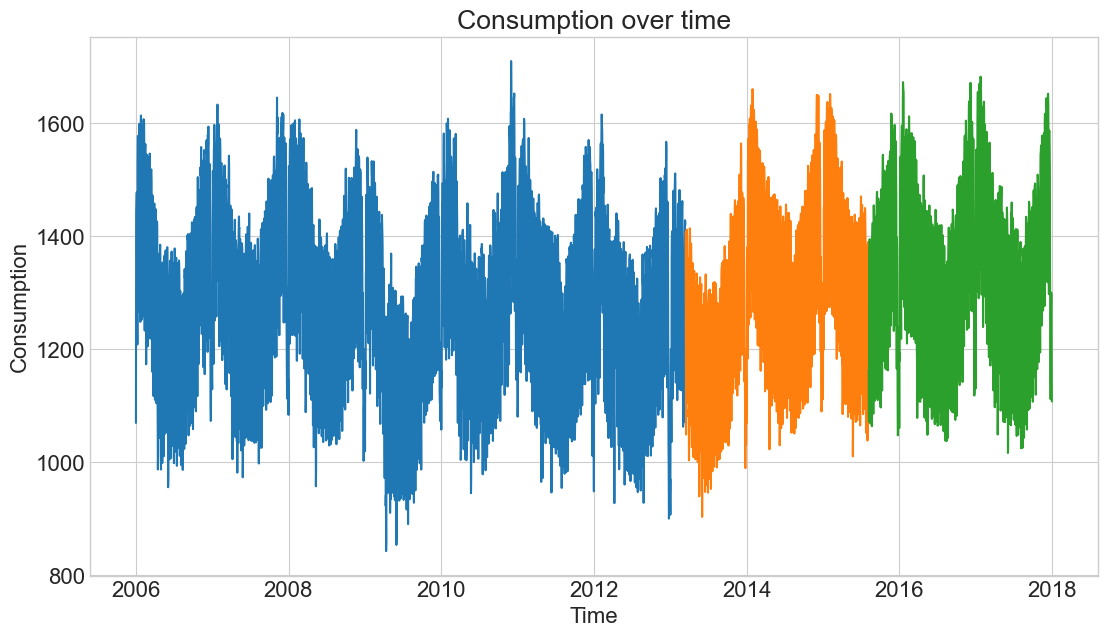

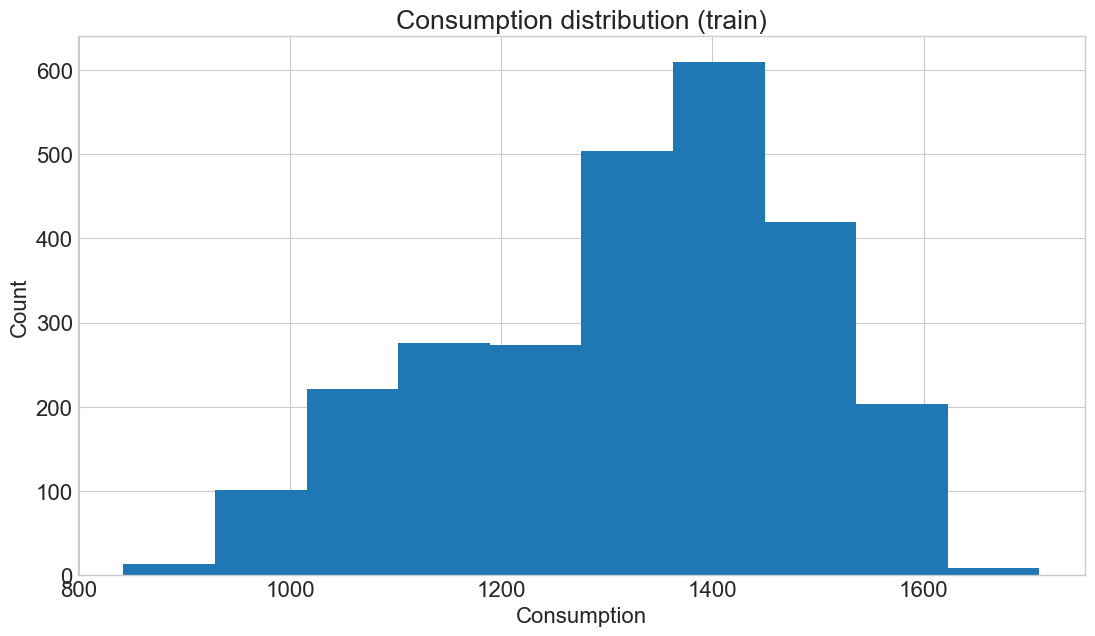

In [47]:
train1, validate1, test1, y_train1, y_validate1, y_test1 = explore_split_time_series(df1,target1)

In [48]:
def explore_target_mean_time_series(y_train,target):
    ''' 
    
    '''
    y_train.resample('D').mean().plot(alpha=.5, label='Daily')
    y_train.resample('W').mean().plot(alpha=.8, label='Weekly')
    y_train.resample('M').mean().plot(label='Montly')
    y_train.resample('Y').mean().plot(label='Yearly')
    plt.title(f"{target} over time")
    plt.legend()
    plt.show()


    y_train.groupby(y_train.index.day_name()).mean().\
        sort_values().plot.bar(width=.9, 
                               ec='black',
                               title=f'Average {target} by Weekday', 
                               xlabel='Weekday', 
                               ylabel=target)
    plt.xticks(rotation=0)

    ax = y_train.groupby(y_train.index.isocalendar().week).mean().plot.bar(width=.9, ec='black')
    plt.xticks(rotation=0)
    ax.set(title=f'Average {target} by Week', xlabel='Week', ylabel=target)
    plt.show()

    ax = y_train.groupby(y_train.index.month).mean().plot.bar(width=.9, ec='black')
    plt.xticks(rotation=0)
    ax.set(title=f'Average {target} by Month', xlabel='Month', ylabel=target)
    plt.show()

    ax = y_train.groupby(y_train.index.year).mean().plot.bar(width=.9, ec='black')
    plt.xticks(rotation=0)
    ax.set(title=f'Average {target} by Year', xlabel='Year', ylabel=target)
    plt.show()

    None

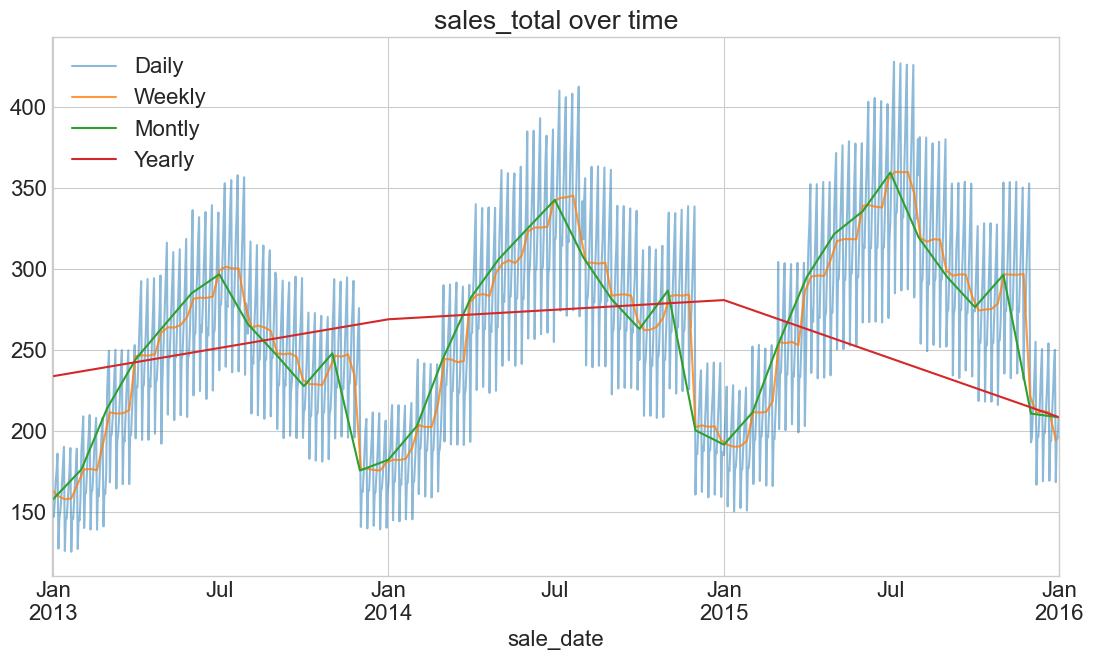

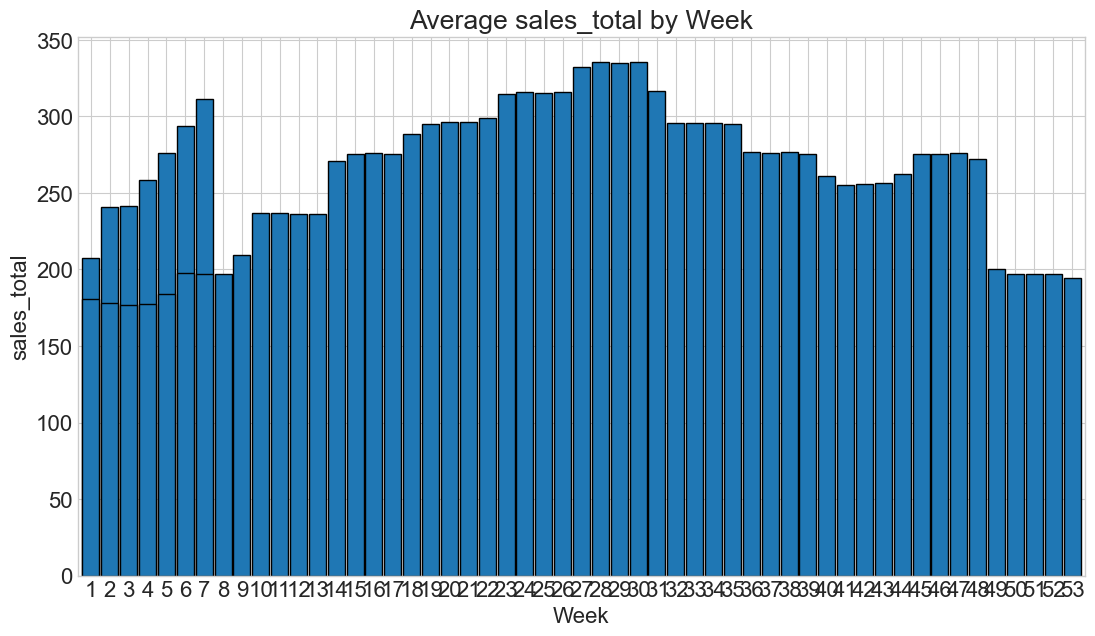

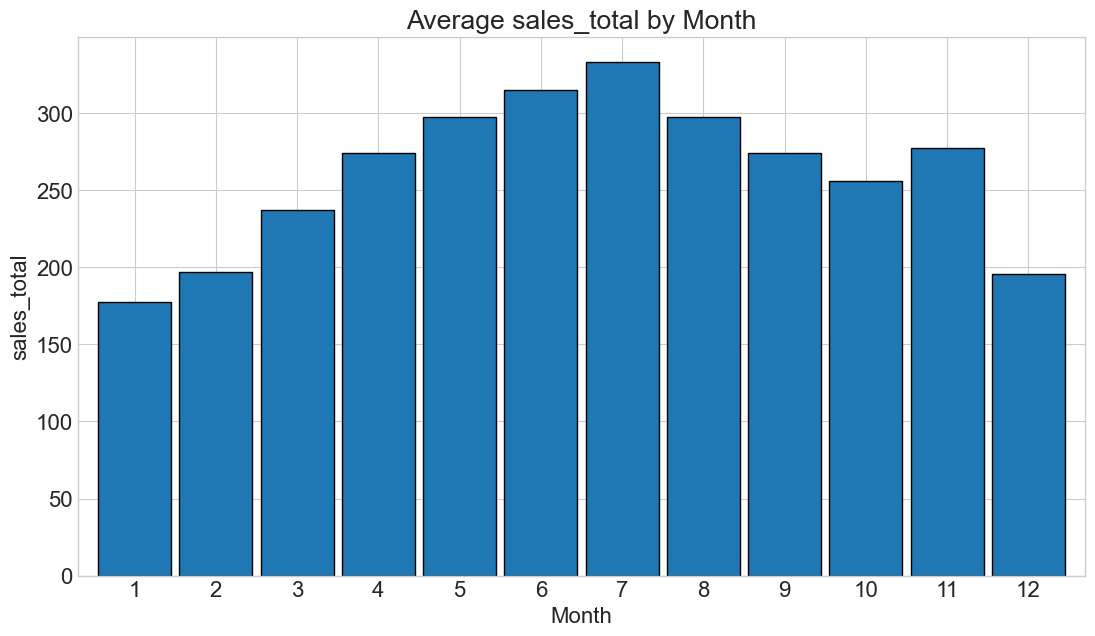

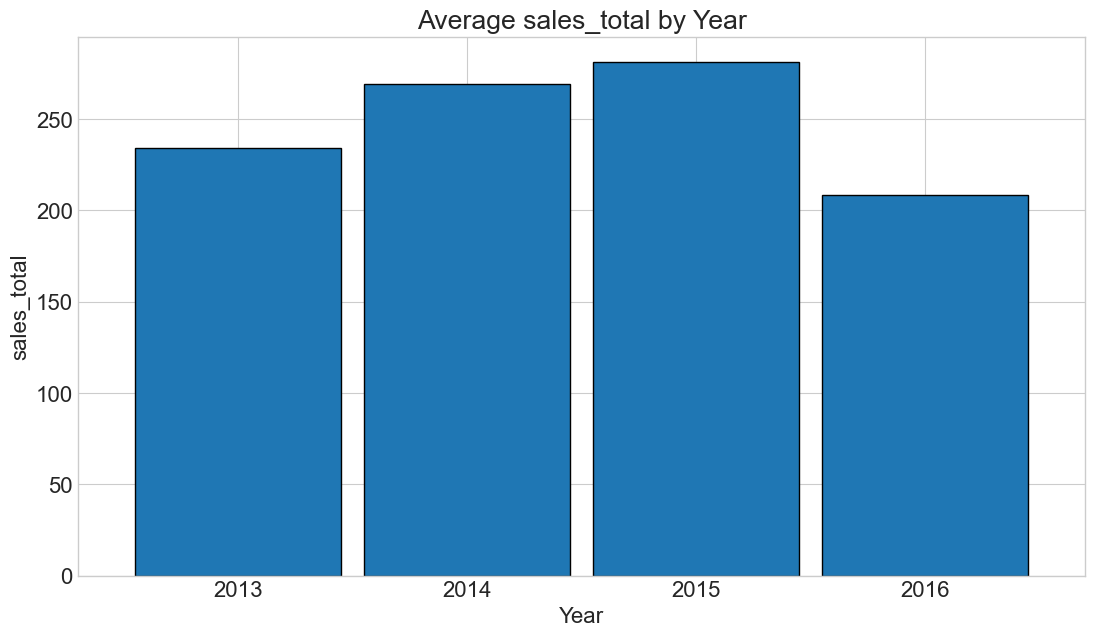

In [49]:
explore_target_mean_time_series(y_train0,target0)

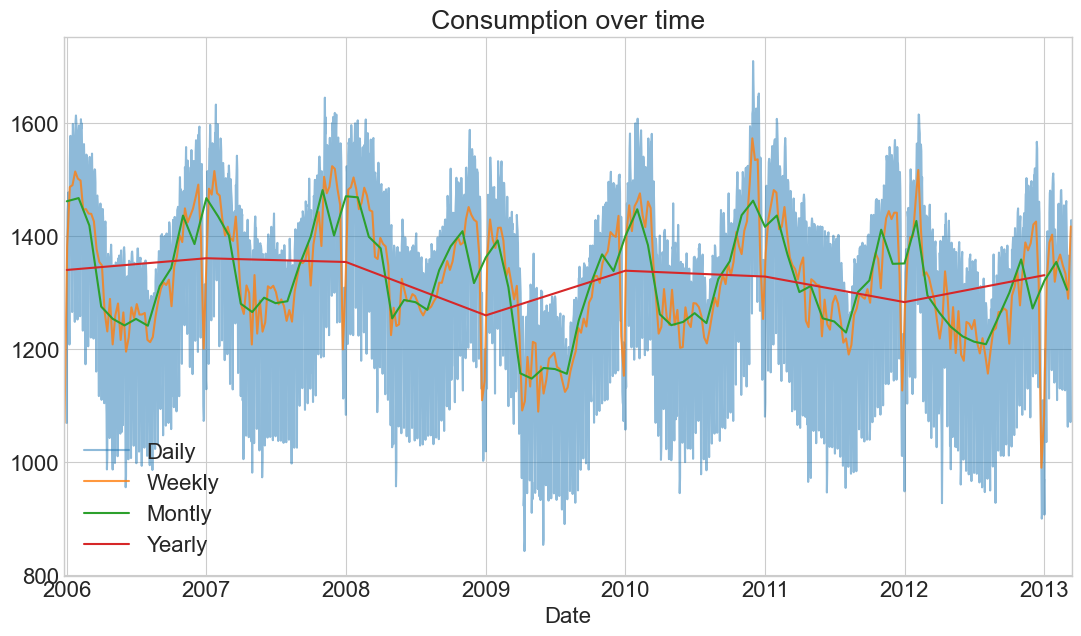

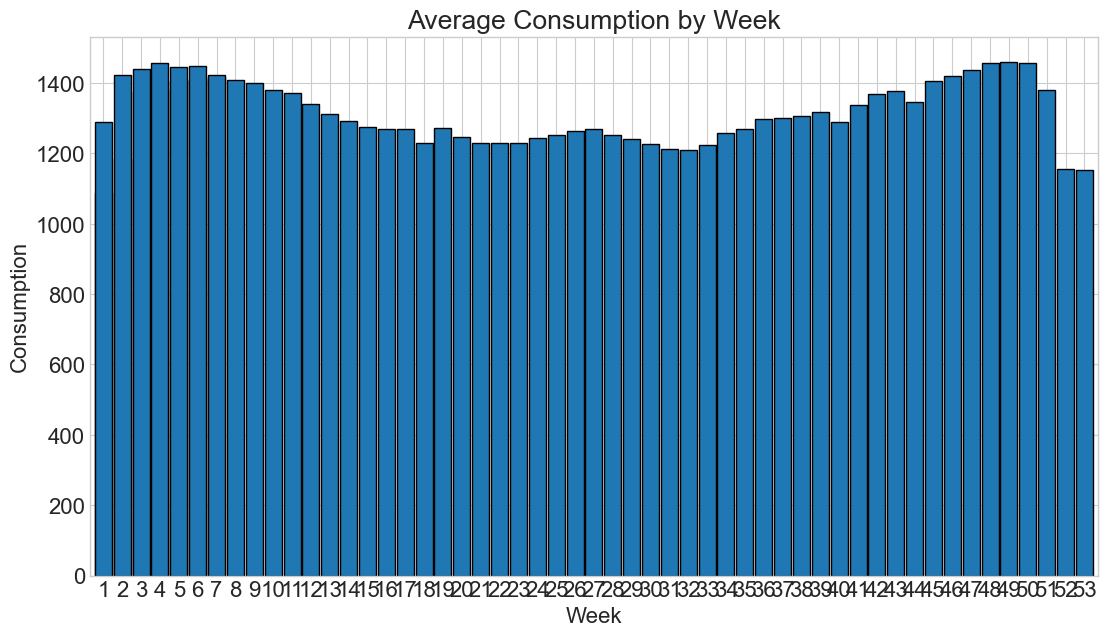

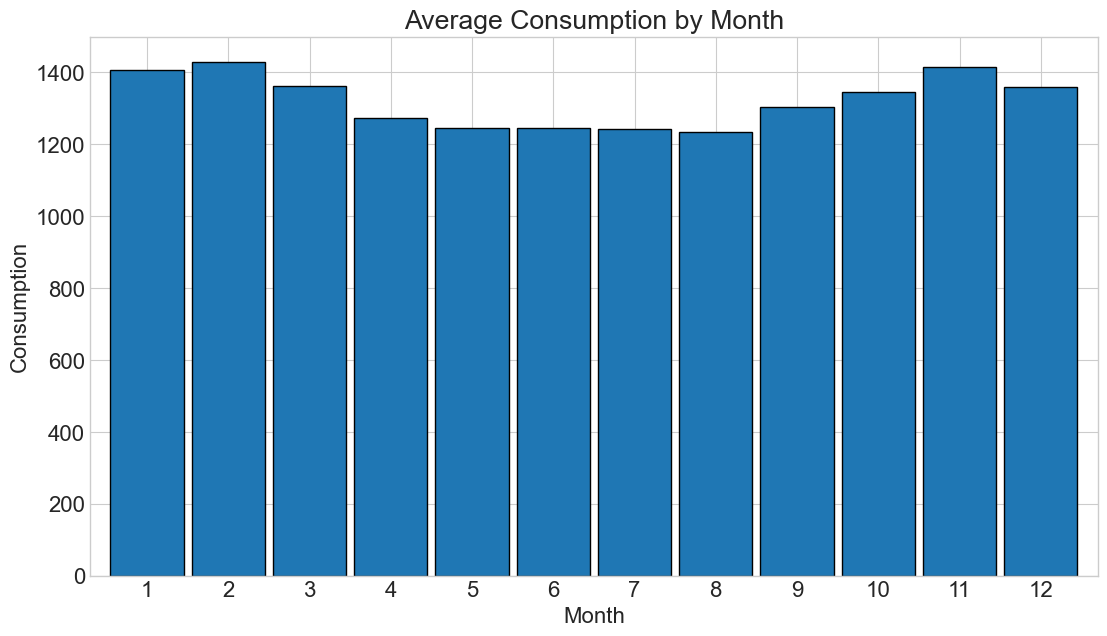

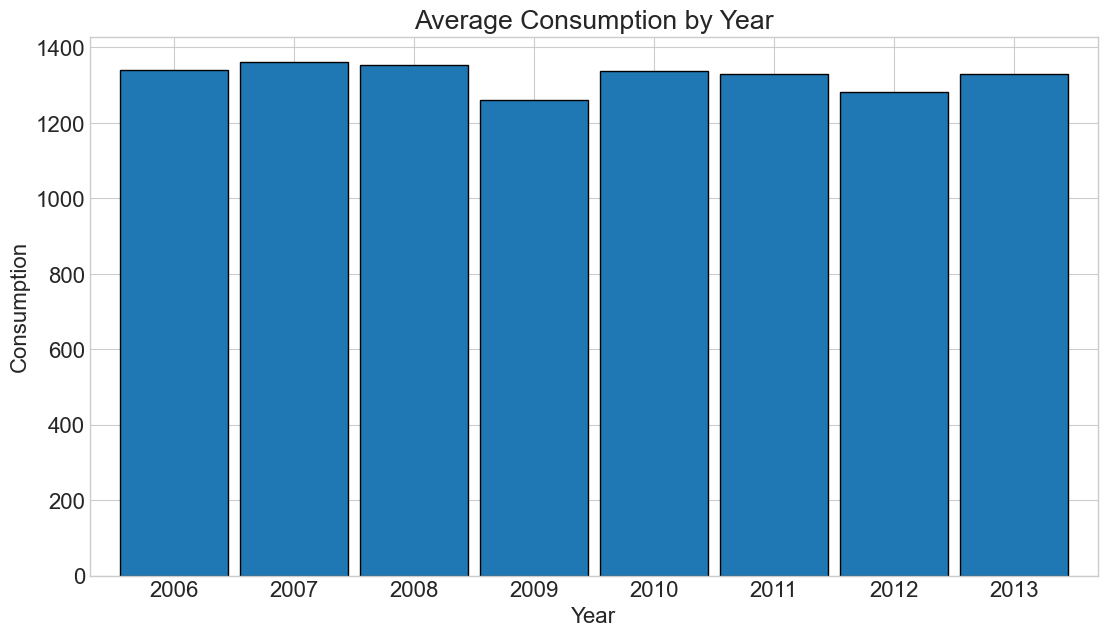

In [50]:
explore_target_mean_time_series(y_train1,target1)

In [51]:
def explore_target_diff_time_series(y_train,target):
    ''' 
    input y_train and target
    prints out a few plots with diffent time spacing
    '''

    y_train.resample('W').mean().diff().plot(title=f'Average change in {target}',label="Week to Week")
    y_train.resample('M').mean().diff().plot(title=f'Average change in {target}',label="Month to Month")
    y_train.resample('Y').mean().diff().plot(title=f'Average change in {target}',label="Year to Year")
    plt.xlabel("Time")
    plt.ylabel(f"{target}")
    plt.legend()

    y_train.groupby([y_train.index.year, y_train.index.month]).mean().unstack(0).plot(title='Seasonal Plot',ylabel=f"{target}")
    table = y_train.groupby([y_train.index.year, y_train.index.month]).mean().unstack()

    fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
    for ax, (month, subset) in zip(axs, table.iteritems()):
        subset.plot(ax=ax, title=month)
        ax.hlines(subset.mean(), *ax.get_xlim())
        ax.set(xlabel='Date',ylabel=f"{target}")

    fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
    fig.subplots_adjust(wspace=0)
    plt.show()
    None

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_49596/71810012.py:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ax, (month, subset) in zip(axs, table.iteritems()):


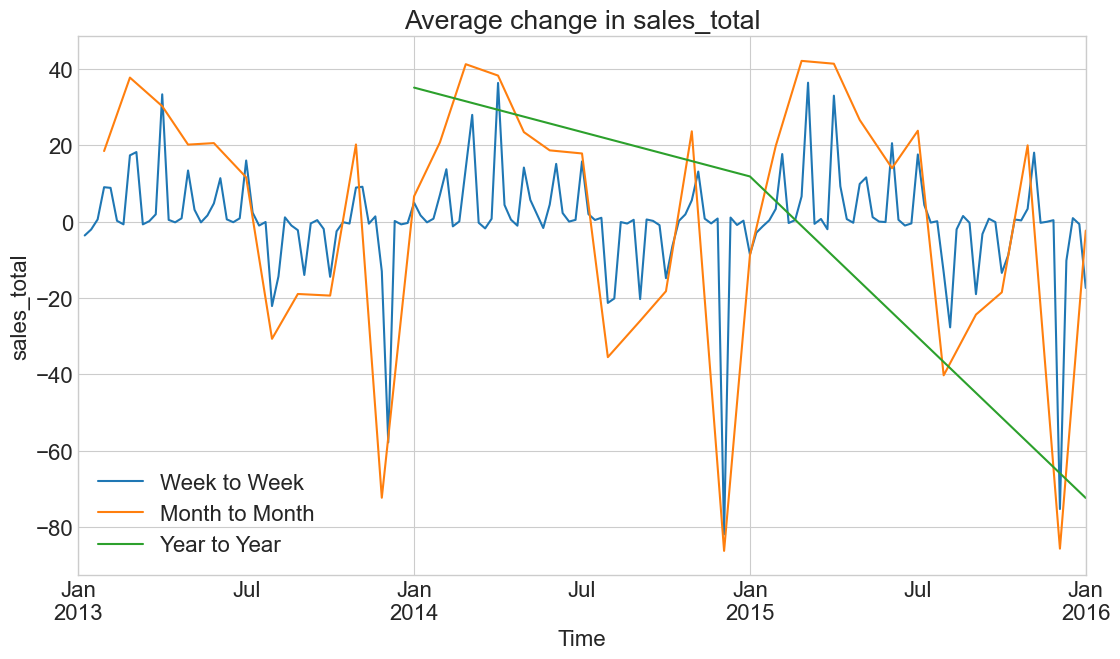

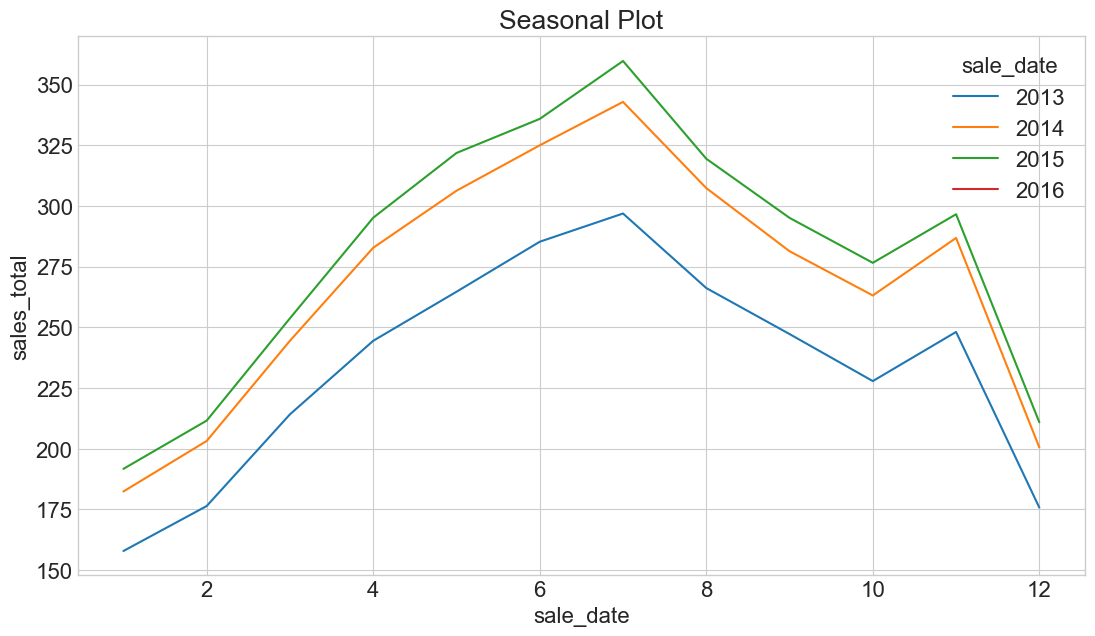

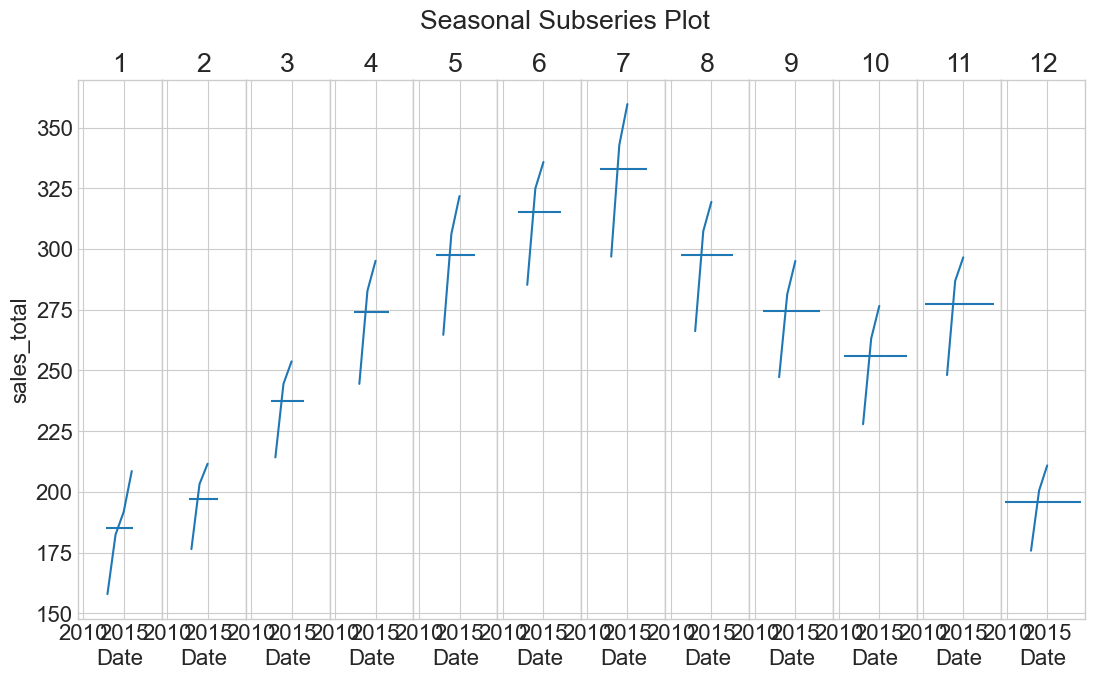

In [52]:
explore_target_diff_time_series(y_train0,target0)

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_49596/71810012.py:18: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ax, (month, subset) in zip(axs, table.iteritems()):


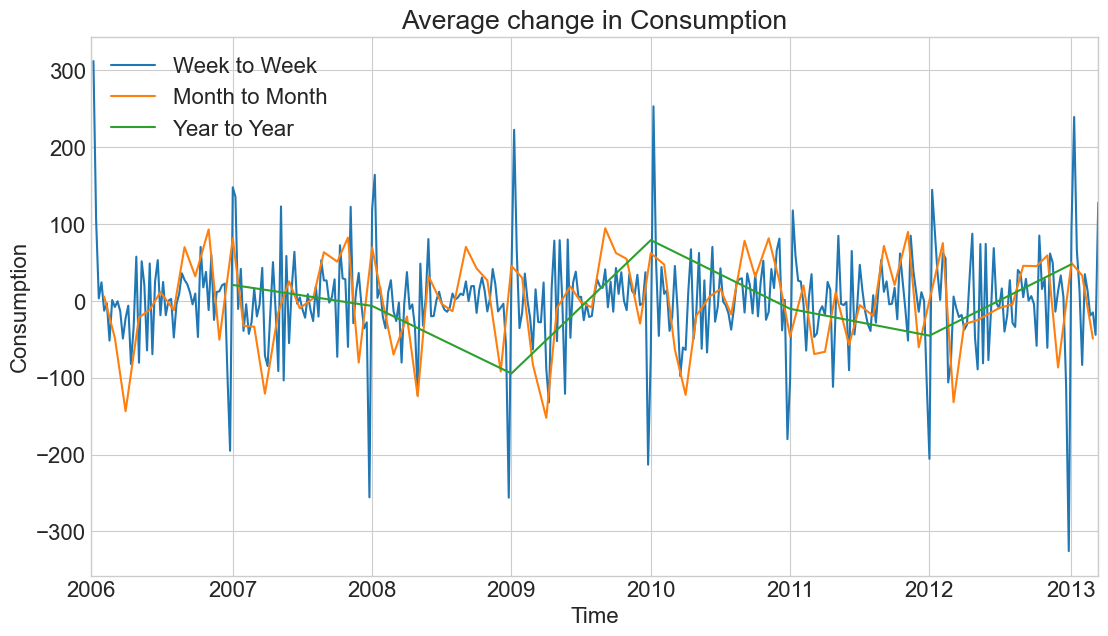

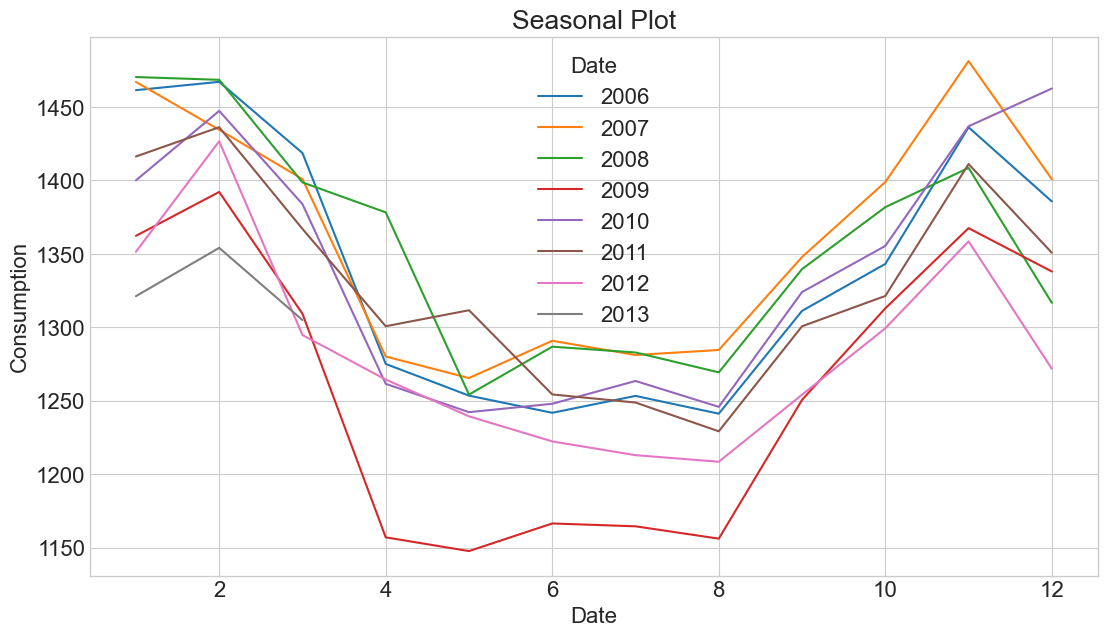

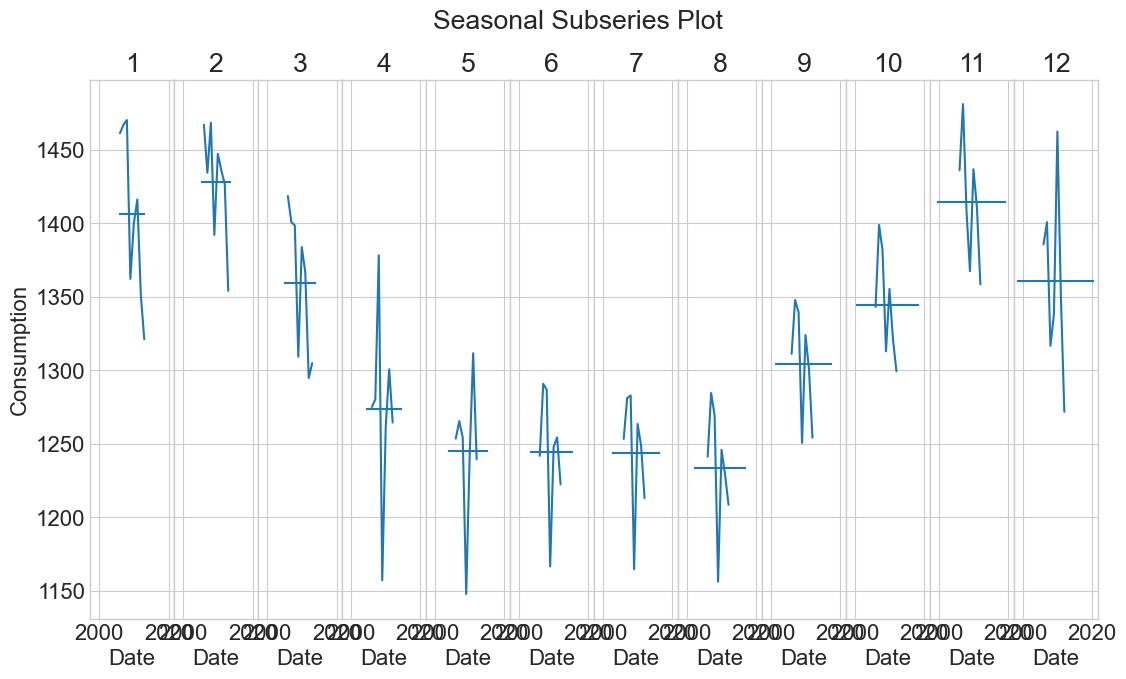

In [53]:
explore_target_diff_time_series(y_train1,target1)

In [54]:
def explore_target_weekly_time_series(train,target,corr_shift=-1,):
    ''' 
    input train dataframe(needs index as datetime) and target(as string), additional arguements optional
    makes a correlation plot, correlation lag plot, and two decomp plots
    creates a decomp dataframe
    returns the decomp df
    '''
    #makes a correlation with a shift of -1 unless otherwise specified
    weekly = train.resample('W').mean()
    weekly[f'Week {corr_shift*-1} Difference'] = weekly[target].shift(corr_shift)
    weekly = weekly.rename(columns={target: 'This Week'})
    weekly.plot.scatter(x='This Week', y=f'Week {corr_shift*-1} Difference')
    plt.title(f"This week compared with {corr_shift*-1} week Difference for {target}")
    plt.show()

    # plots correlation over changing lag
    pd.plotting.autocorrelation_plot(train[target].resample('W').mean())
    plt.title(f"Correlation of {target} over different Weekly Lags")
    plt.show()

    #creates dataframe using seasonal decompose to produce trend season and residual plots
    y_train_temp = train[target].resample('W').mean()
    result = sm.tsa.seasonal_decompose(y_train_temp)
    decomposition = pd.DataFrame({'y': result.observed,
                                'trend': result.trend,
                                'seasonal': result.seasonal,
                                'resid': result.resid,})
    #plots the results
    result.plot()
    plt.xlabel("Time")
    plt.ylabel(f"{target}")
    plt.show()

    decomposition.iloc[:, 1:].plot()
    plt.ylabel(f"{target} Compared")
    plt.title("Comparison - Trends (aggregated)")
    plt.show()

    decomposition.head()
    return decomposition

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_49596/2871909074.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = train.resample('W').mean()


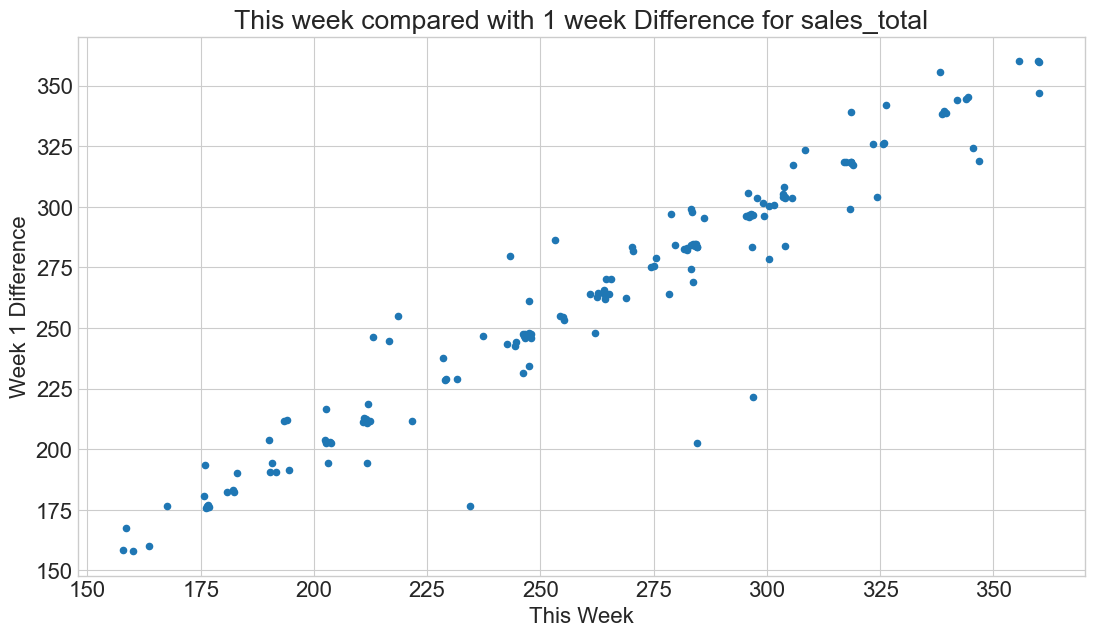

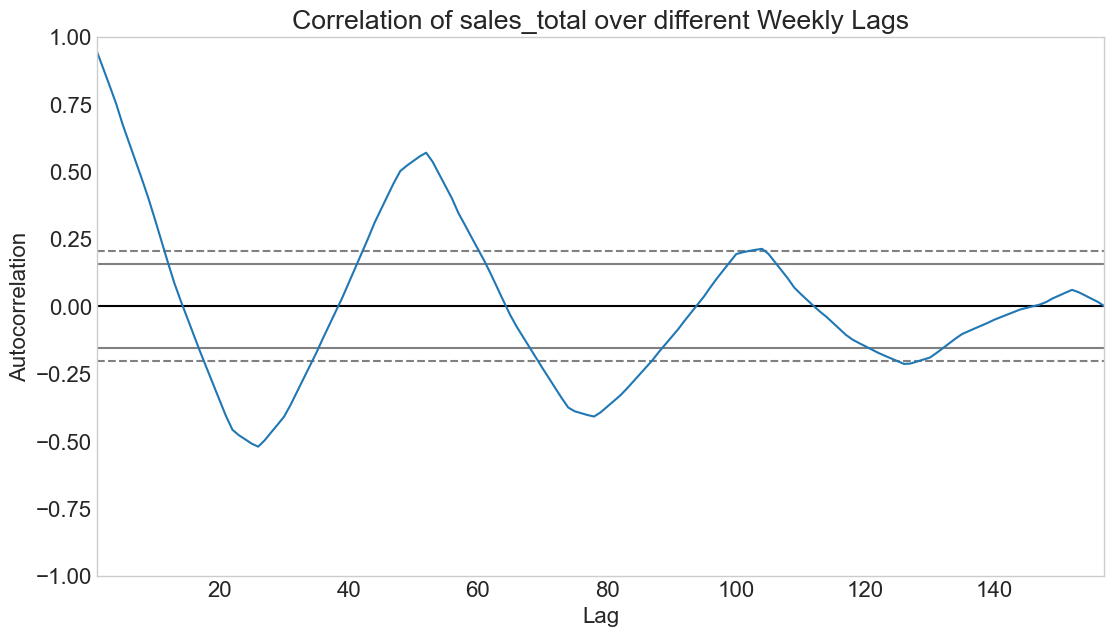

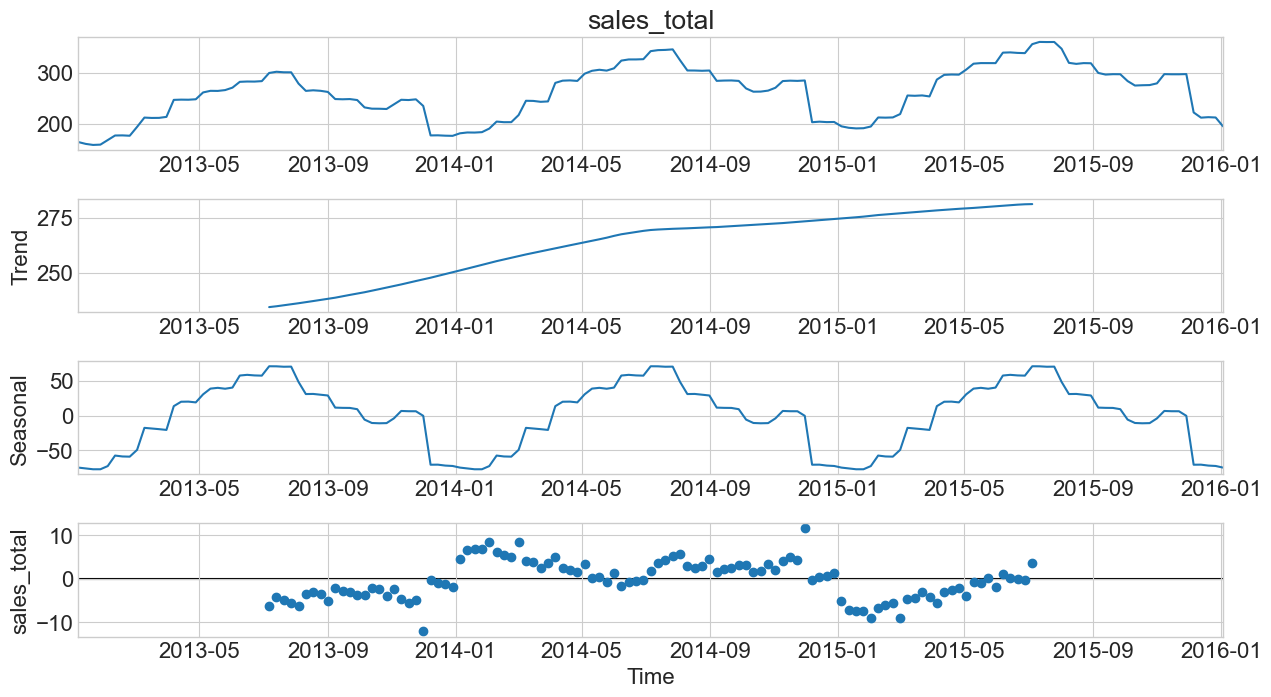

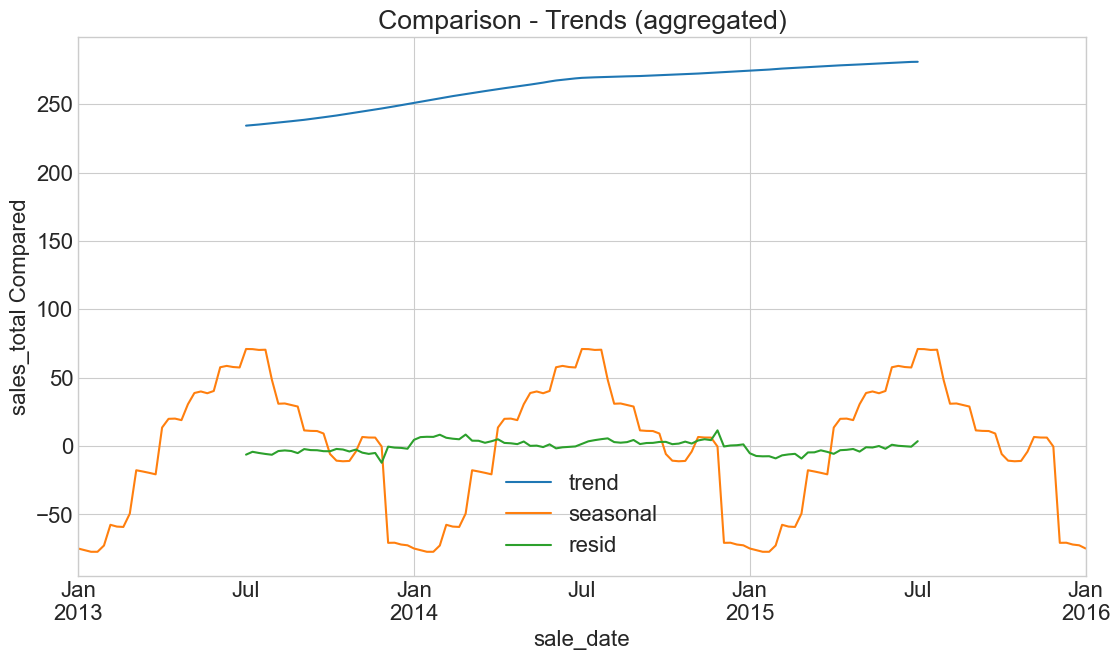

y  trend   seasonal  resid
sale_date                                      
2013-01-06  163.589167    NaN -74.870770    NaN
2013-01-13  159.981203    NaN -76.034203    NaN
2013-01-20  157.946720    NaN -77.275385    NaN
2013-01-27  158.545383    NaN -77.267594    NaN
2013-02-03  167.585014    NaN -72.691078    NaN
...                ...    ...        ...    ...
2015-12-06  221.695289    NaN -70.723855    NaN
2015-12-13  211.503734    NaN -70.640425    NaN
2015-12-20  212.435217    NaN -71.964412    NaN
2015-12-27  211.800551    NaN -72.534779    NaN
2016-01-03  194.438178    NaN -74.870770    NaN

[157 rows x 4 columns]

In [55]:
explore_target_weekly_time_series(train0,target0)

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_49596/2871909074.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = train.resample('W').mean()


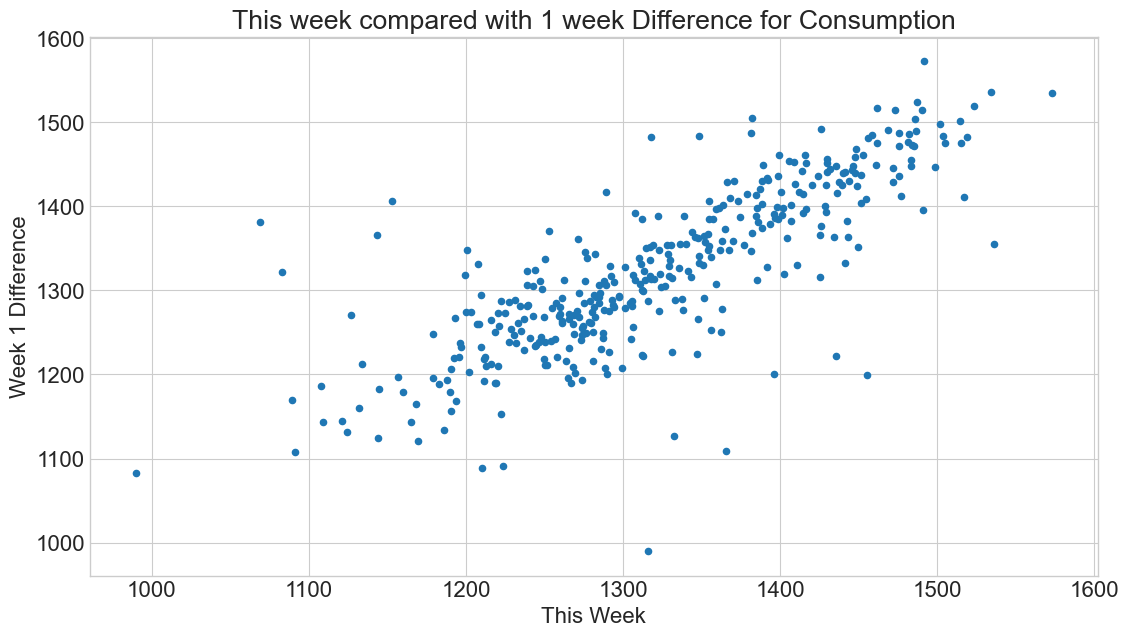

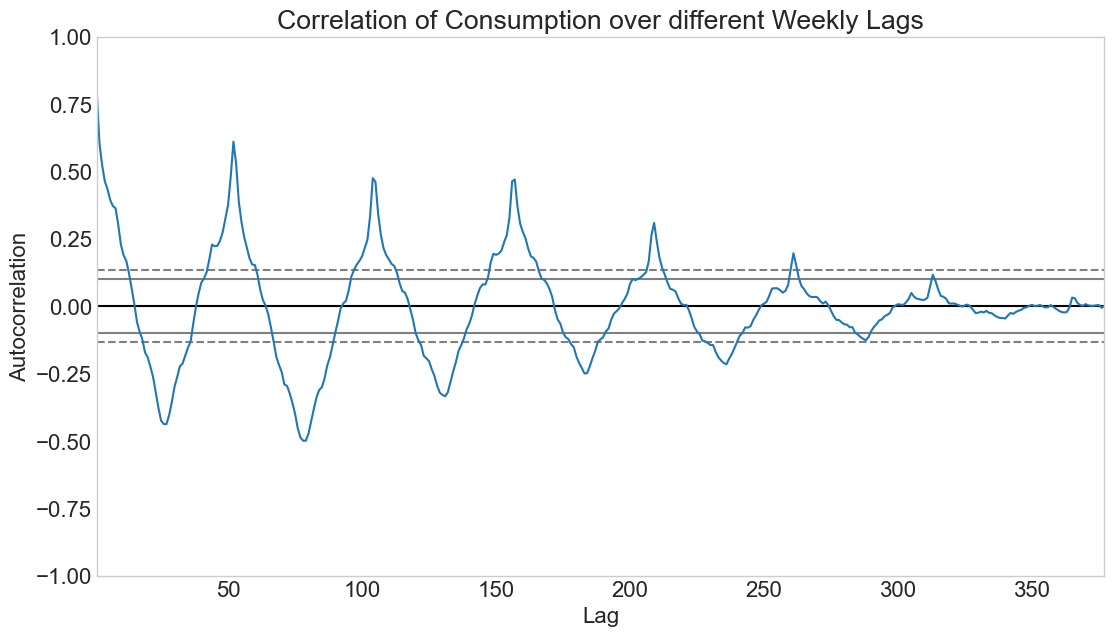

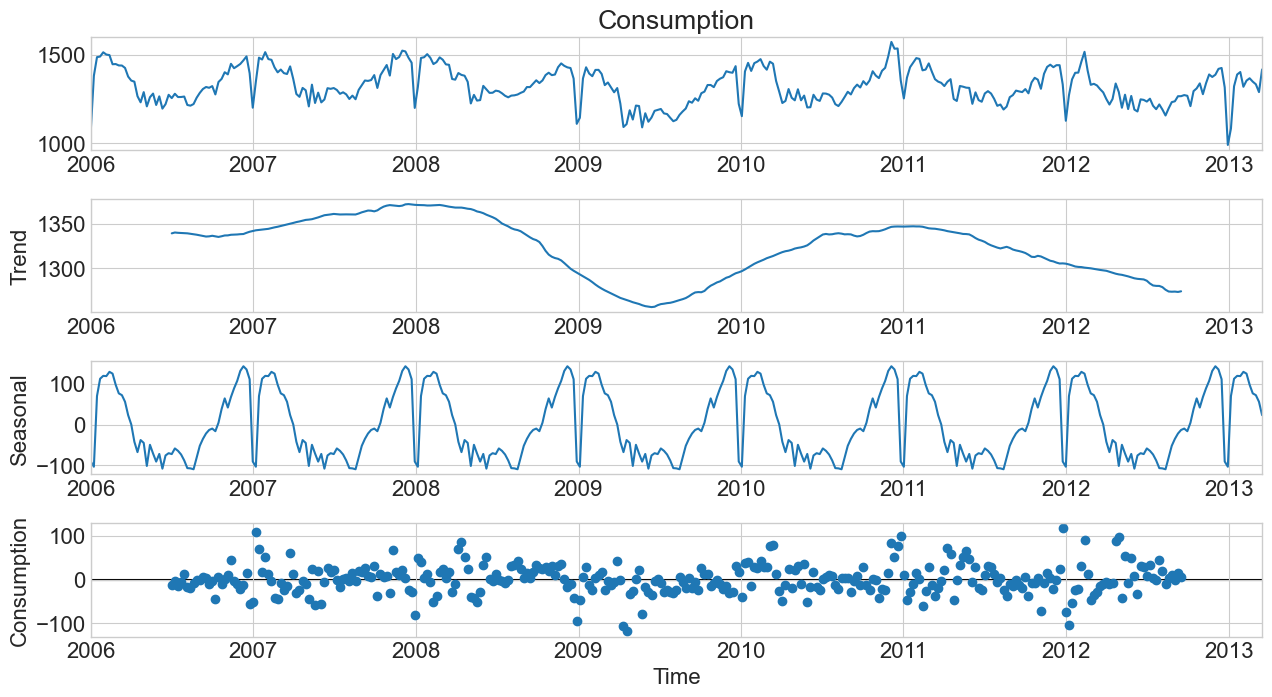

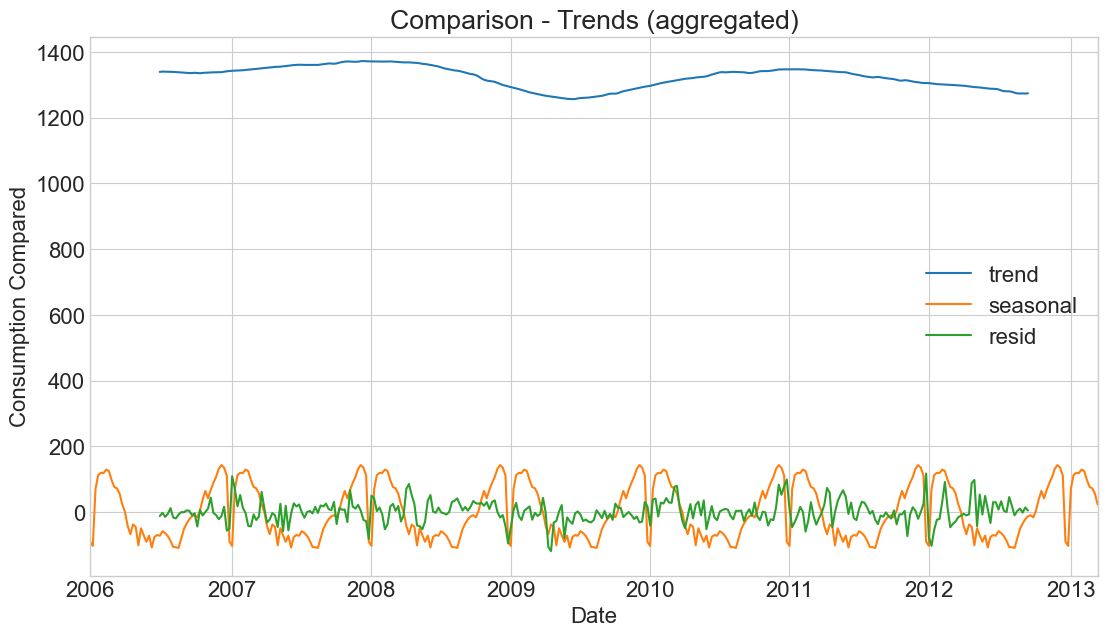

y  trend    seasonal  resid
Date                                             
2006-01-01  1069.184000    NaN  -90.373424    NaN
2006-01-08  1381.300143    NaN -103.179252    NaN
2006-01-15  1486.730286    NaN   69.823340    NaN
2006-01-22  1490.031143    NaN  112.215595    NaN
2006-01-29  1514.176857    NaN  119.297877    NaN
...                 ...    ...         ...    ...
2013-02-17  1367.142143    NaN   97.465364    NaN
2013-02-24  1348.114857    NaN   76.415645    NaN
2013-03-03  1333.157143    NaN   72.040156    NaN
2013-03-10  1288.966000    NaN   55.887205    NaN
2013-03-17  1417.027250    NaN   23.099412    NaN

[377 rows x 4 columns]

In [56]:
explore_target_weekly_time_series(train1,target1)

In [57]:
def explore_target_bin_compare_time_series(train,target,bin="D",scale="M",year="2015"):
   ''' 
   input train(index is datetime), 
           target (string), 
           bin(string-resample bin for integrals), 
           scale(string-resample bin for x axis)
           year(string-to examine further)
   creates a df, and cuts based on quartiles, regroups and resamples
   '''

   train_temp = train.resample(bin).mean()
   # create a categorical feature
   train_temp[f'{target}_bin'] = pd.qcut(train_temp[target], 4, labels=['lowest', 'low', 'high', 'highest'])
   train_temp.groupby(f'{target}_bin').mean()
     
   (train_temp.groupby(f'{target}_bin').resample(scale).size().unstack(0).apply(lambda row: row / row.sum(), axis=1).plot.area())
   plt.ylabel(f'% of {bin} in the {scale}')
   plt.title(f"Distribution of {target} by {bin} over Time")
   plt.show()

   if train_temp.loc[year].groupby(f'{target}_bin').resample(scale).size().shape[0] == train_temp[f'{target}_bin'].nunique():
      ax = (train_temp.loc[year].groupby(f'{target}_bin').resample(scale).size().T.plot.bar(stacked=True, width=.9, ec='black'))
      labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
      ax.set_xticklabels(labels)
      ax.set(ylabel=f"{target}",title=f"Mean {target} in {year} by {scale}")
   else:
      ax = (train_temp.loc[year].groupby(f'{target}_bin').resample(scale).size().unstack(0).plot.bar(stacked=True, width=.9, ec='black'))
      labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
      ax.set_xticklabels(labels)
      ax.set(ylabel=f"{target}",title=f"Mean {target} in {year} by {scale}")

   plt.show()
   ax = train[target].groupby(train[target].index.strftime('%m-%b')).mean().plot.bar(title=f"{target} by Month (mean)")
   ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
   plt.show()
   None

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_49596/4175393445.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_temp = train.resample(bin).mean()


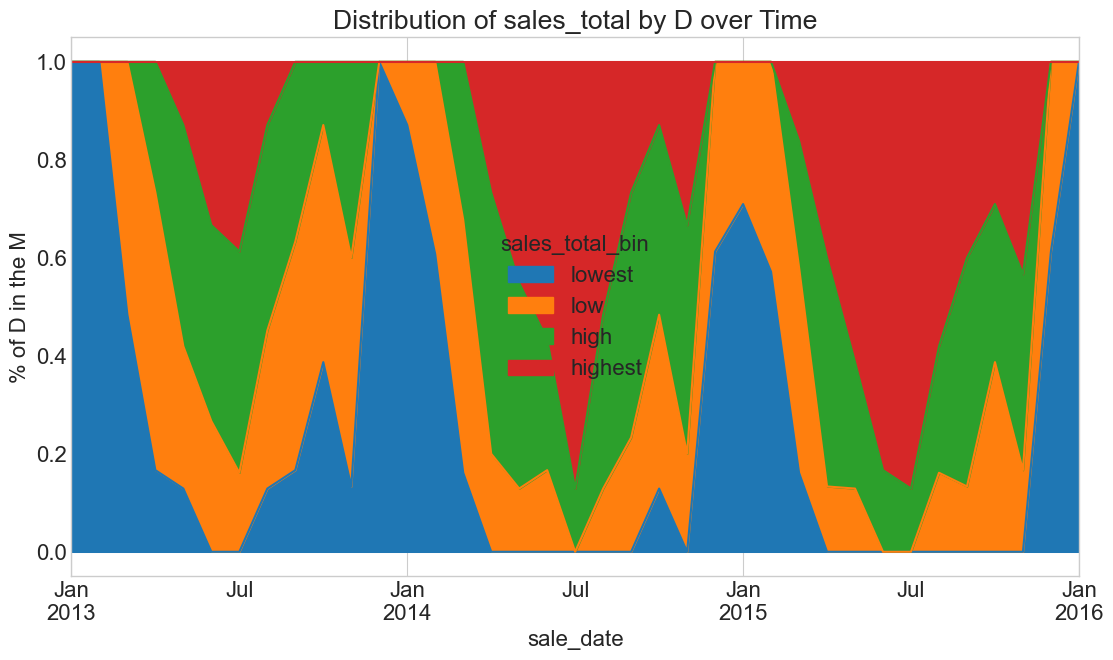

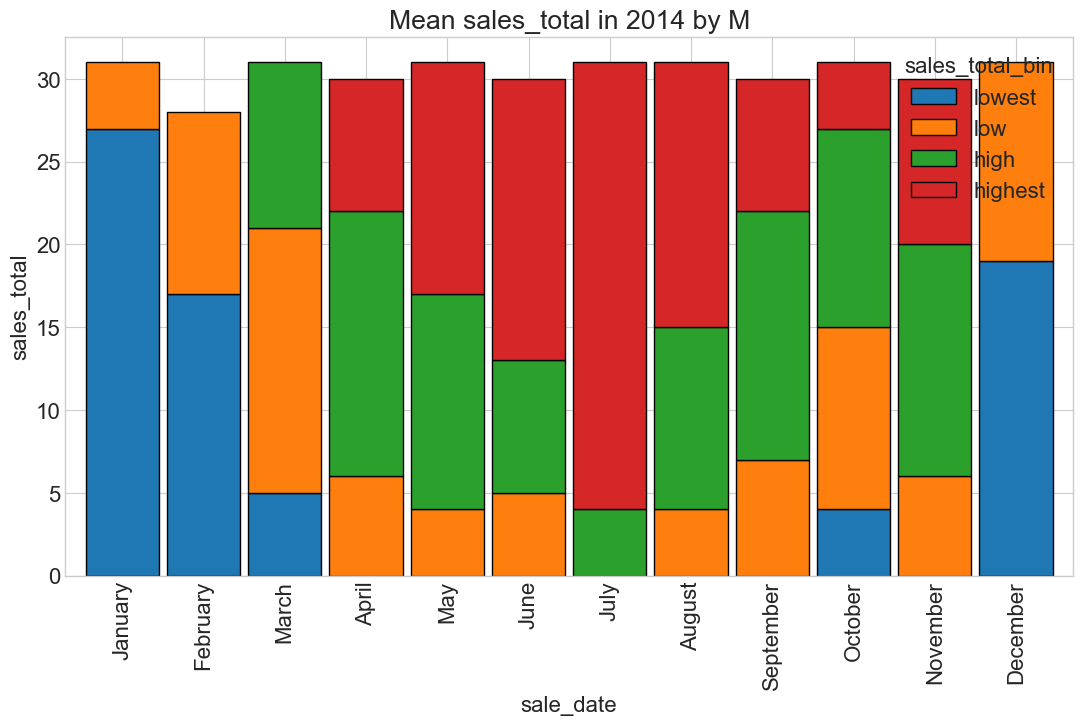

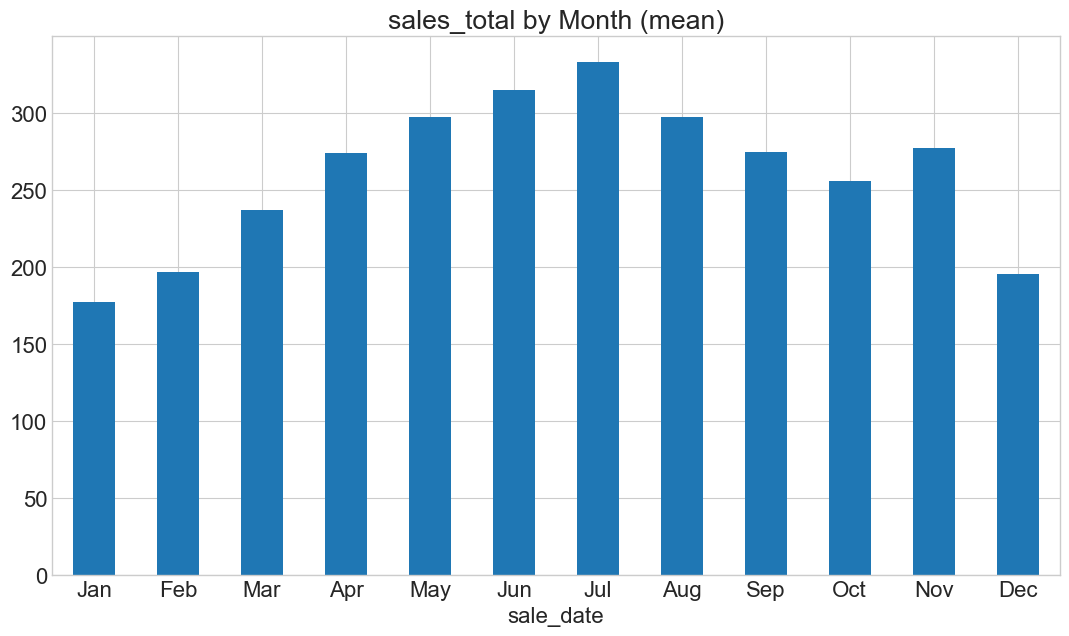

In [58]:
explore_target_bin_compare_time_series(train0,target0,bin="D",scale="M",year="2014")

/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_49596/4175393445.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_temp = train.resample(bin).mean()


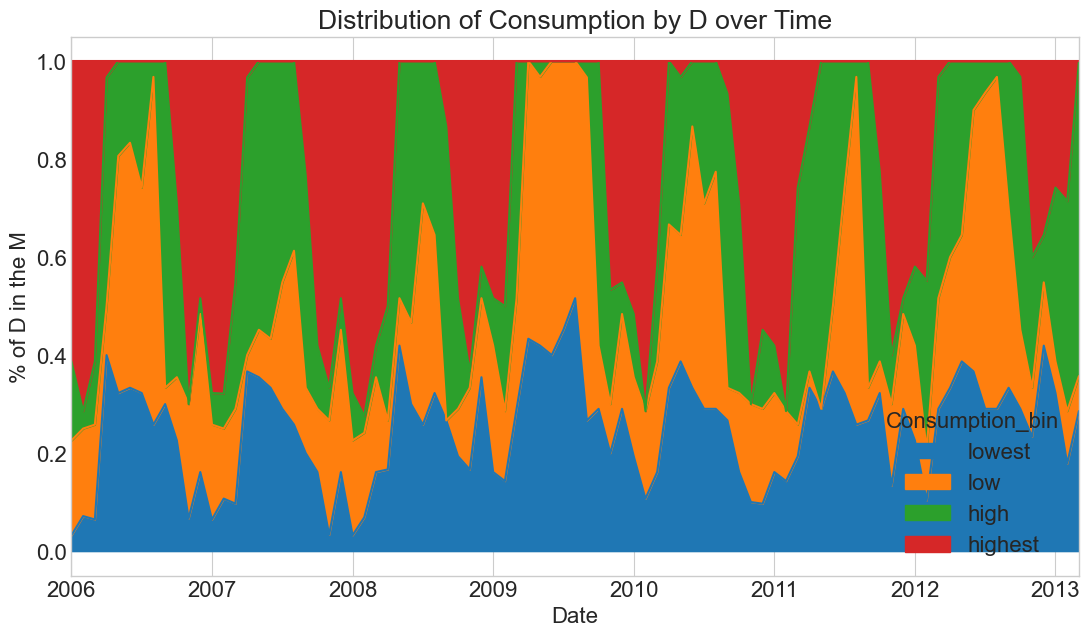

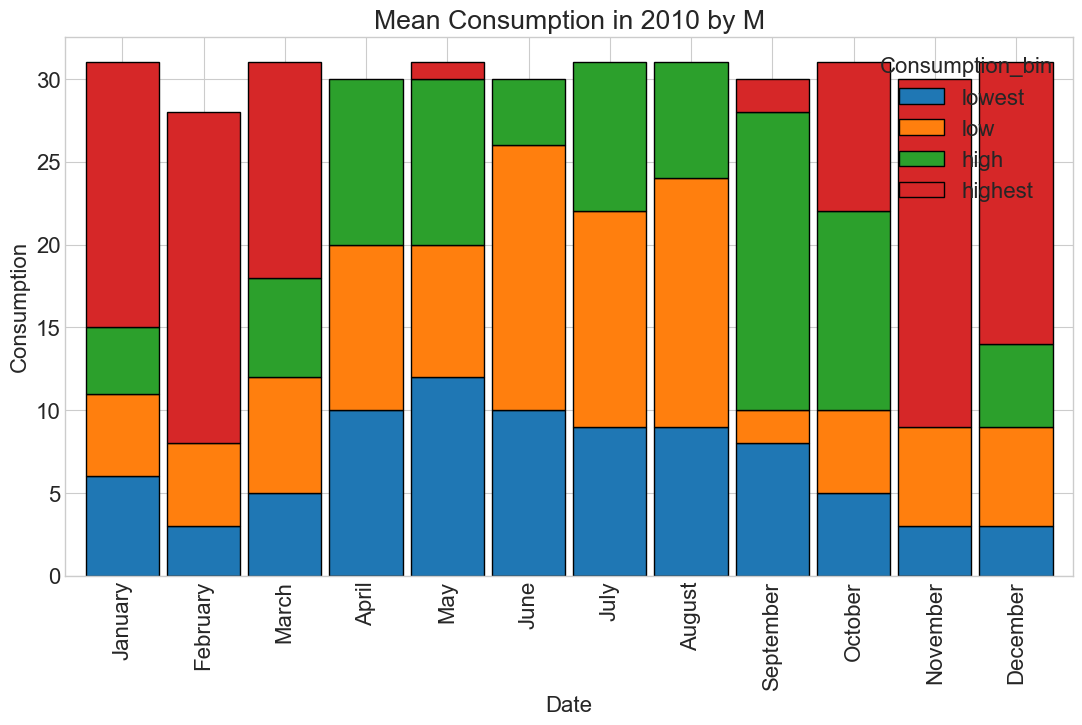

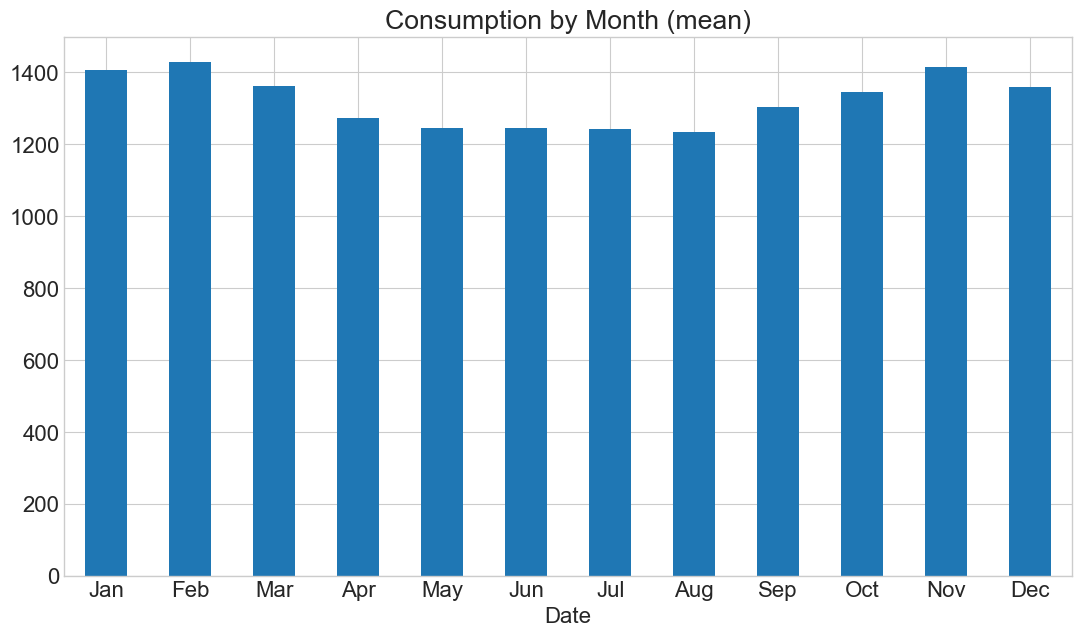

In [59]:
explore_target_bin_compare_time_series(train1,target1,bin="D",scale="M",year="2010")

is null before
 Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64
is null after
 Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64
(2630, 6) train shape
(876, 6) validate shape
(877, 6) test shape


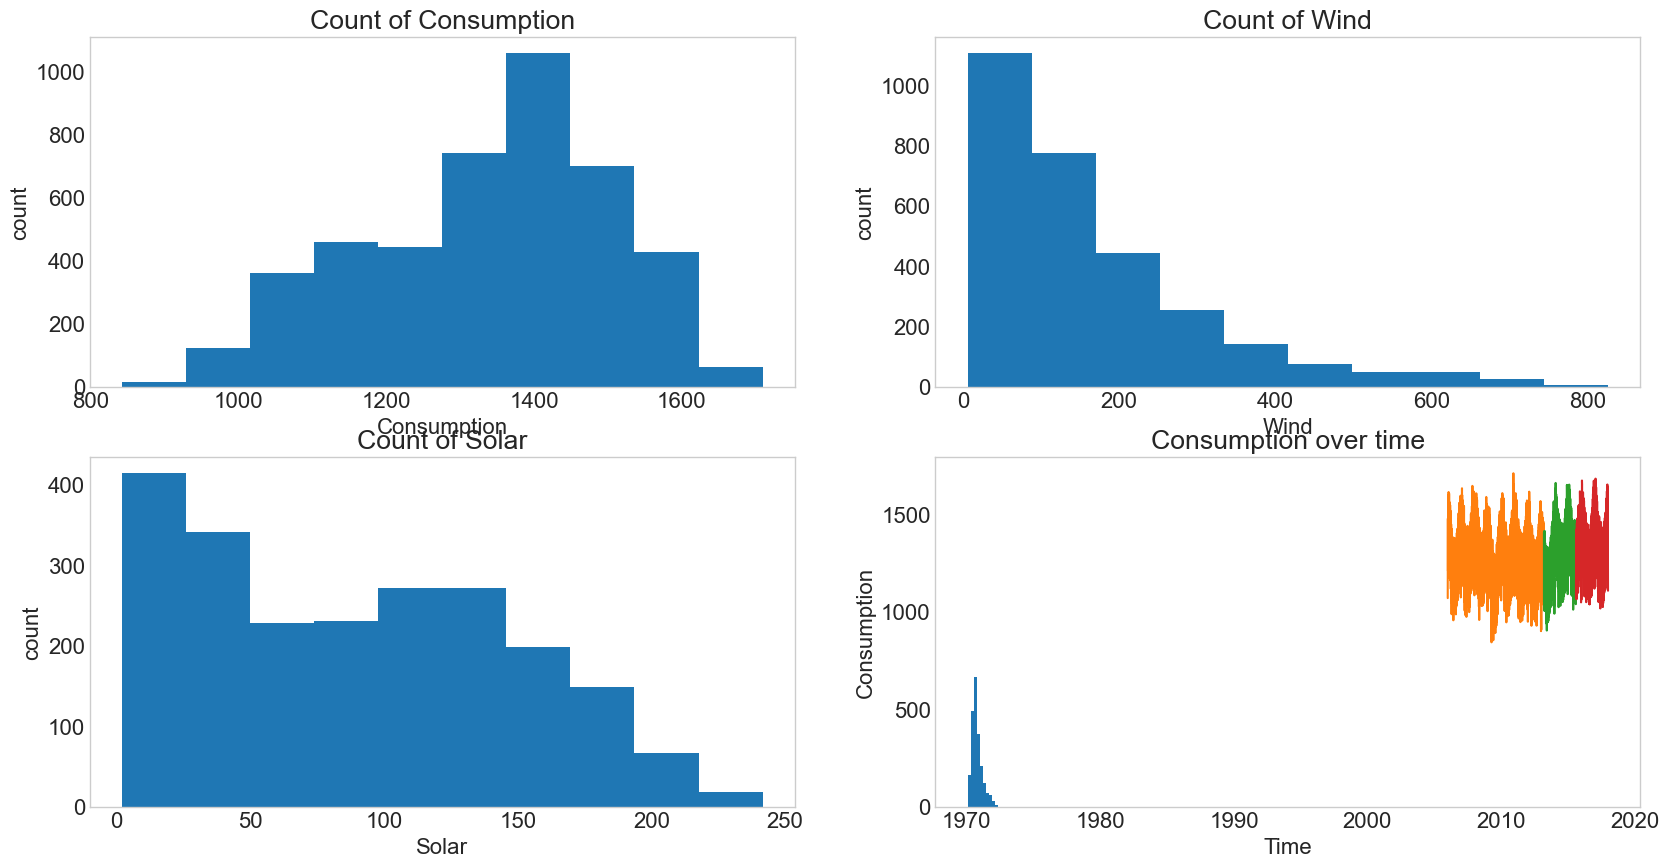

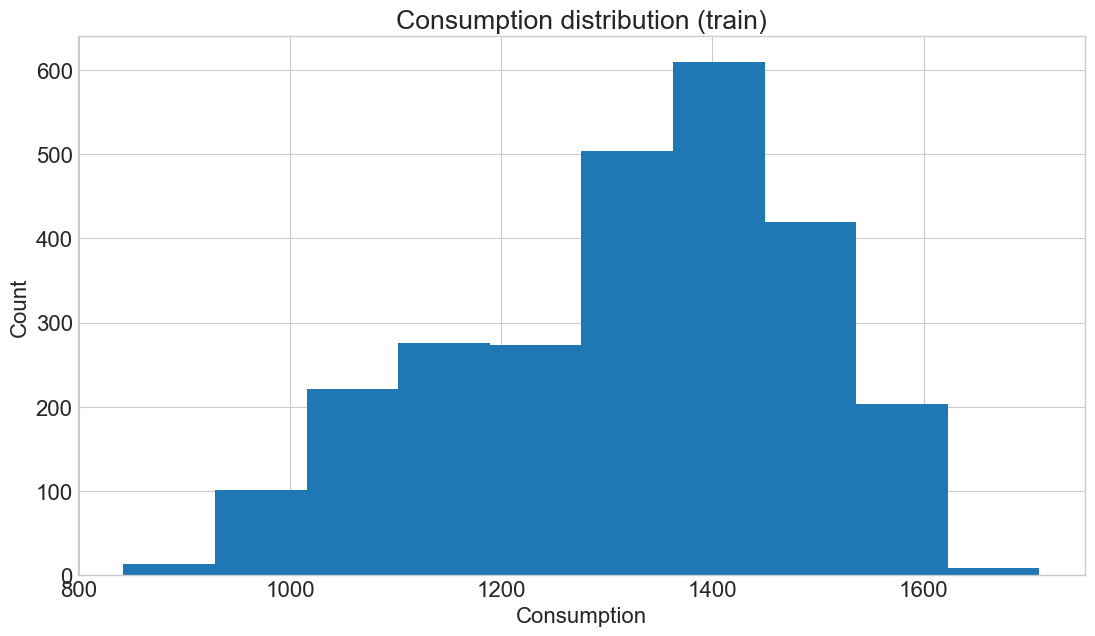

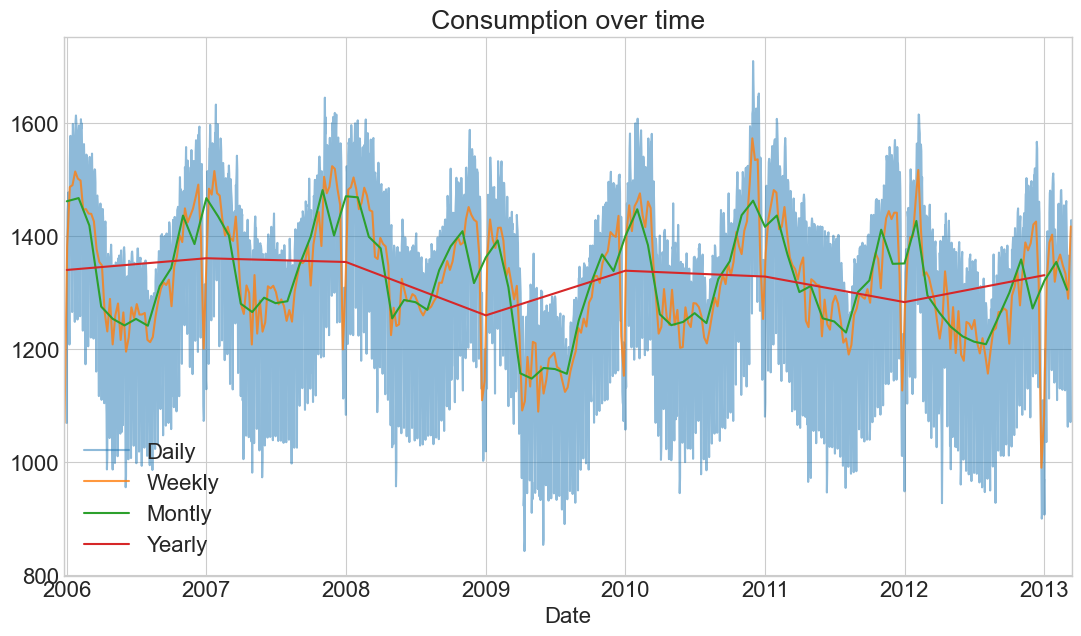

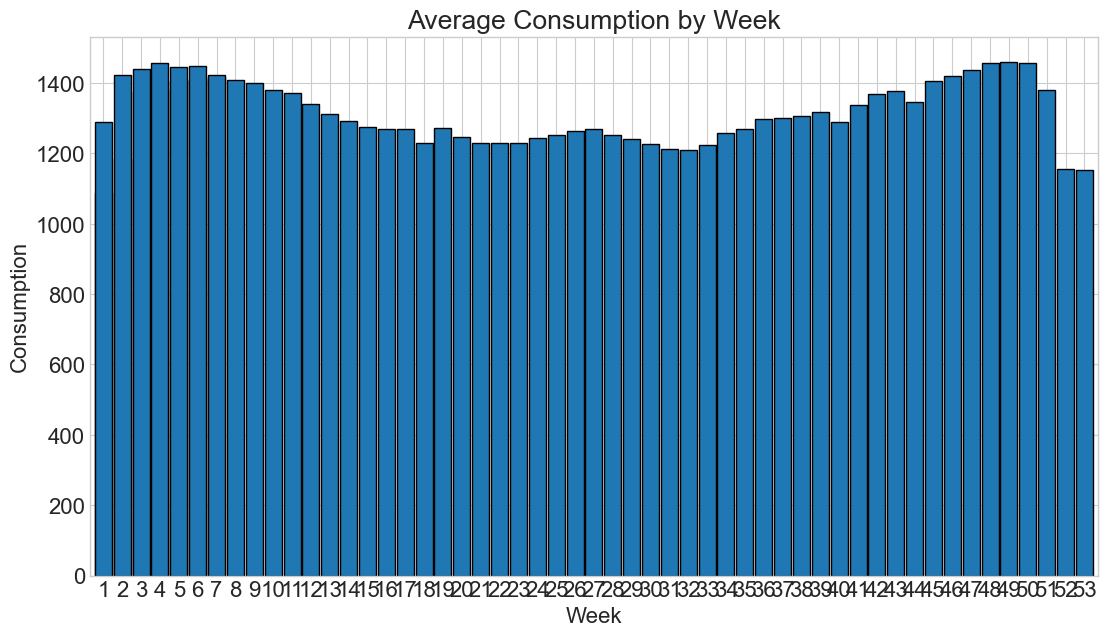

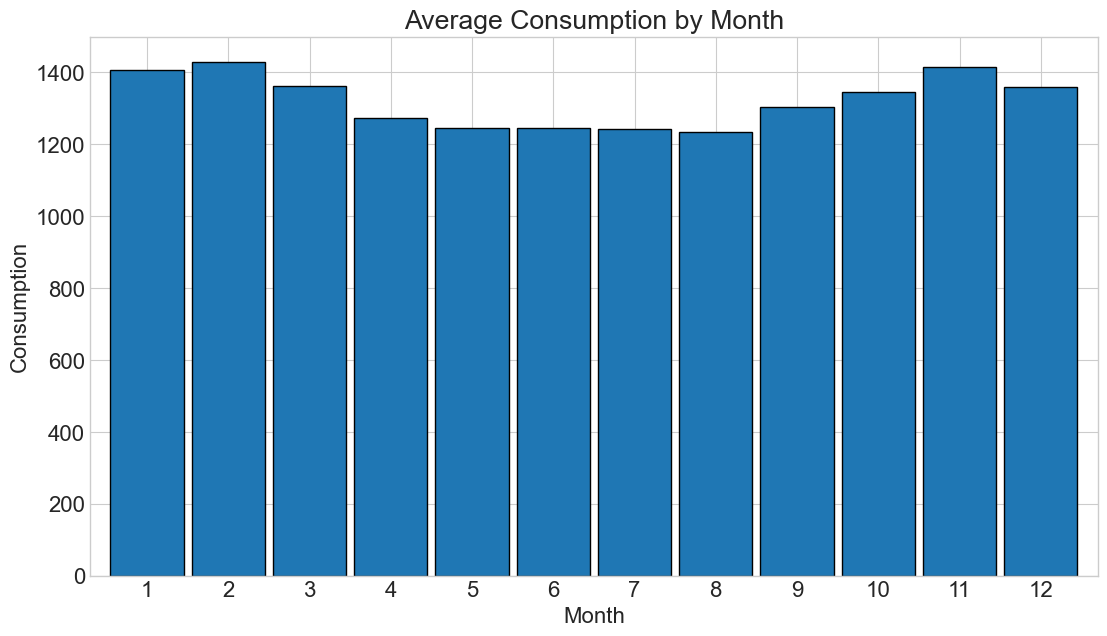

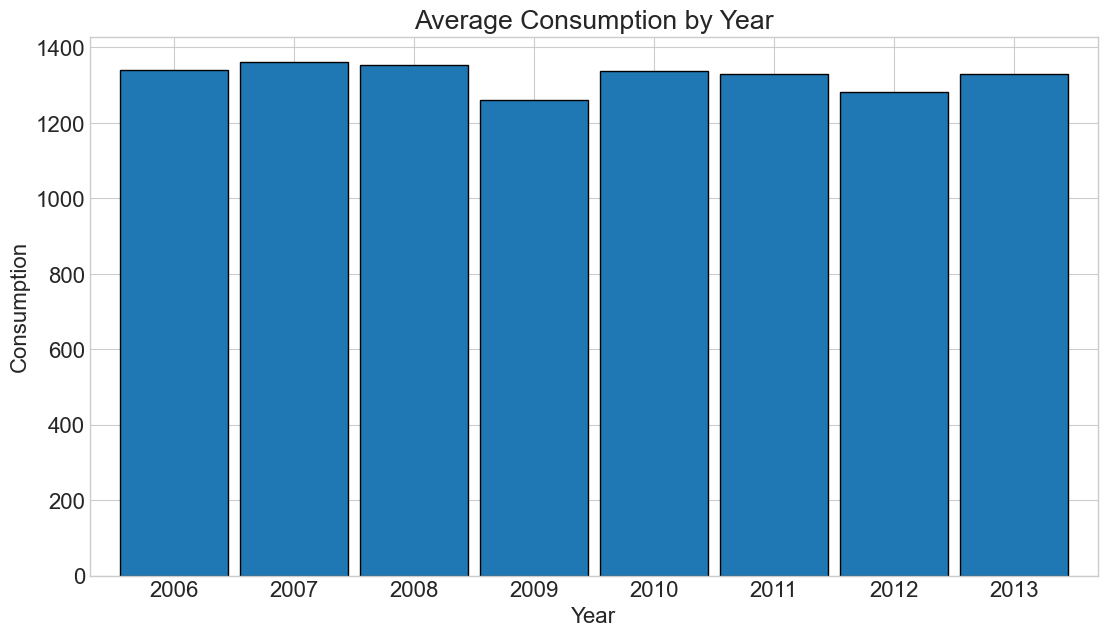

/Users/geary.shenck/codeup-data-science/time-series-exercises/explore.py:128: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ax, (month, subset) in zip(axs, table.iteritems()):


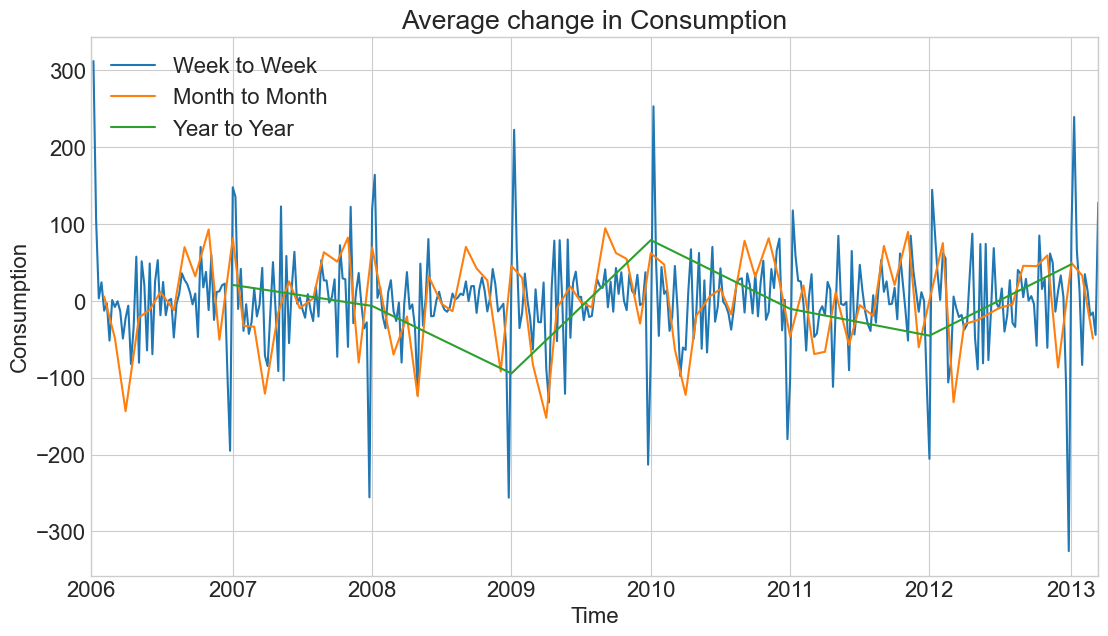

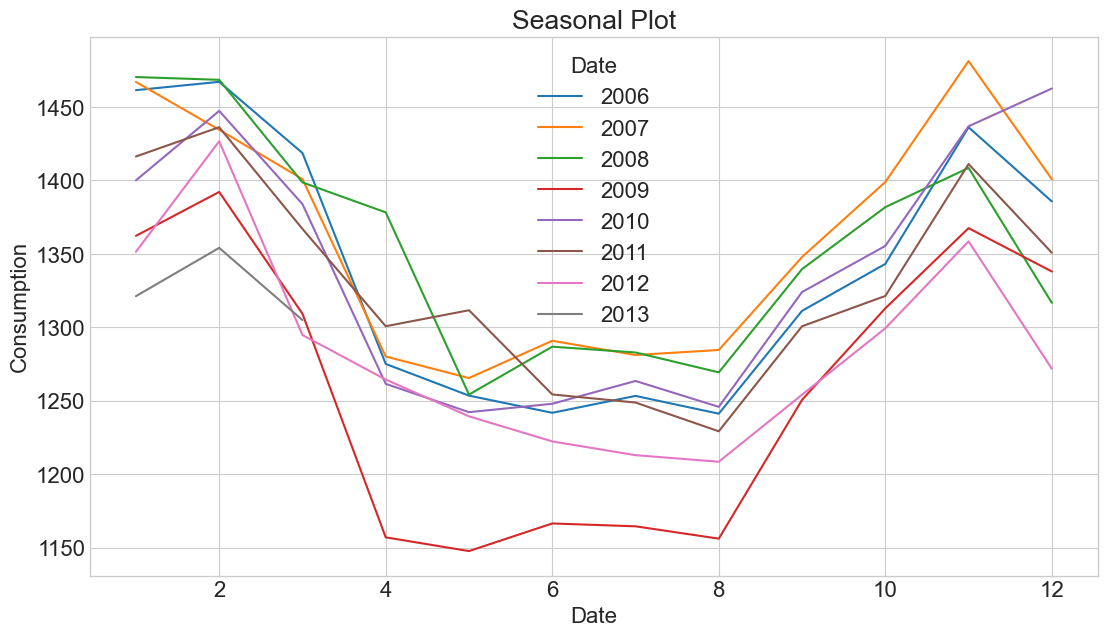

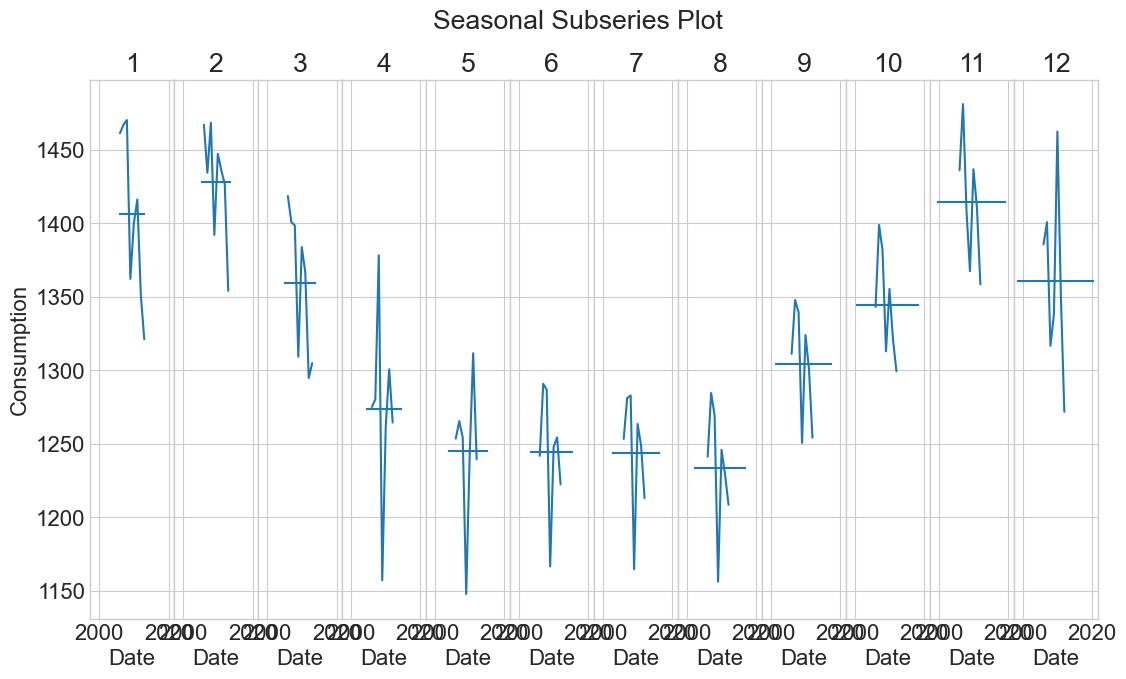

/Users/geary.shenck/codeup-data-science/time-series-exercises/explore.py:146: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = train.resample('W').mean()


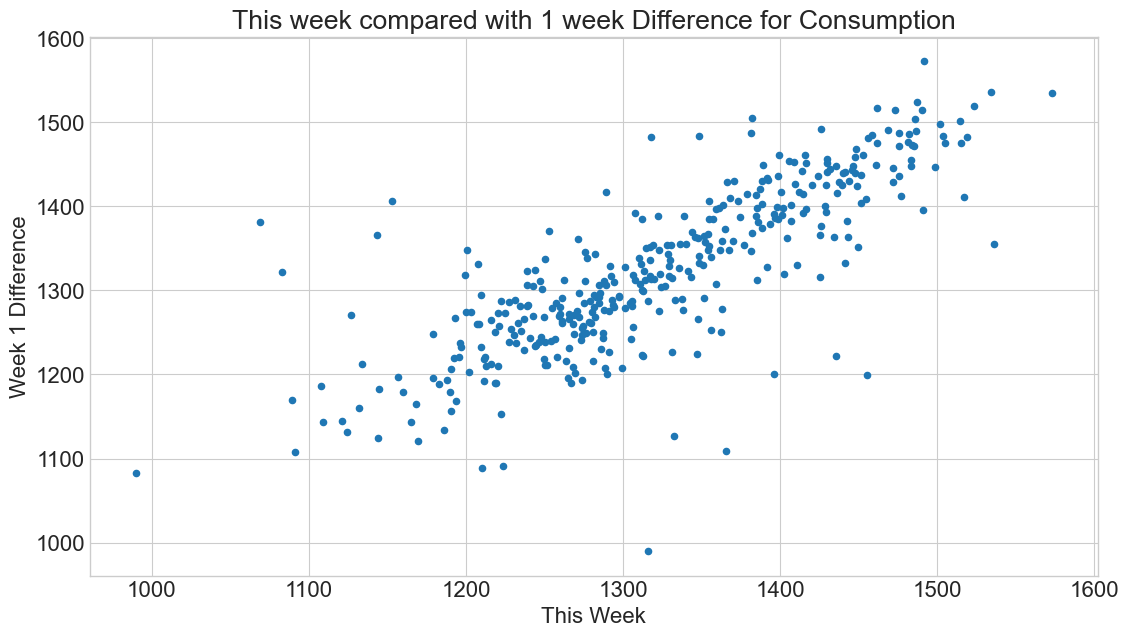

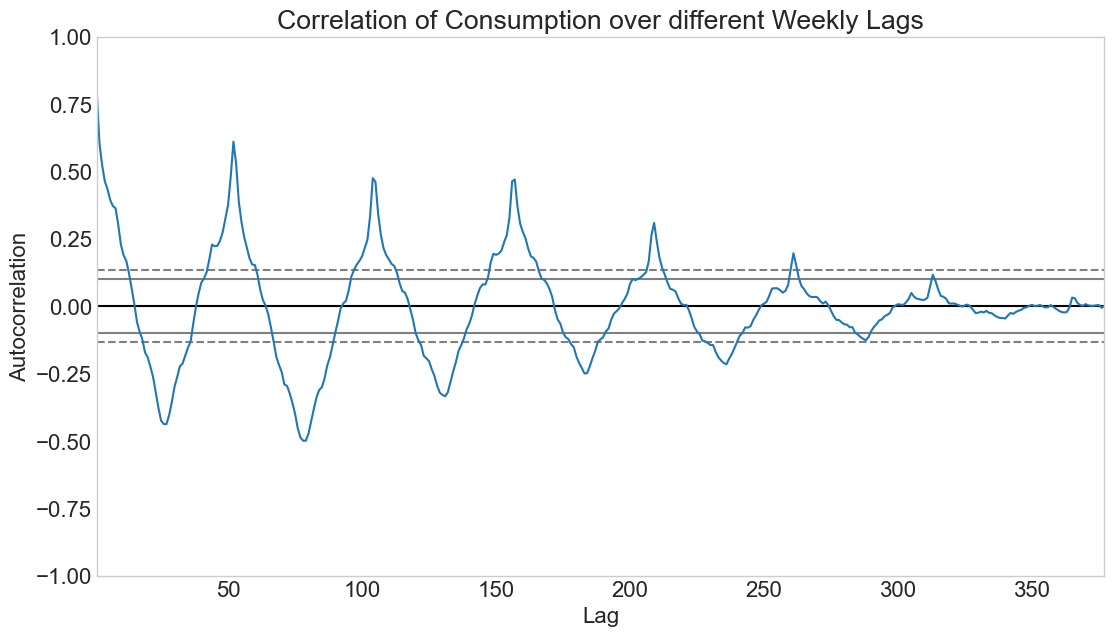

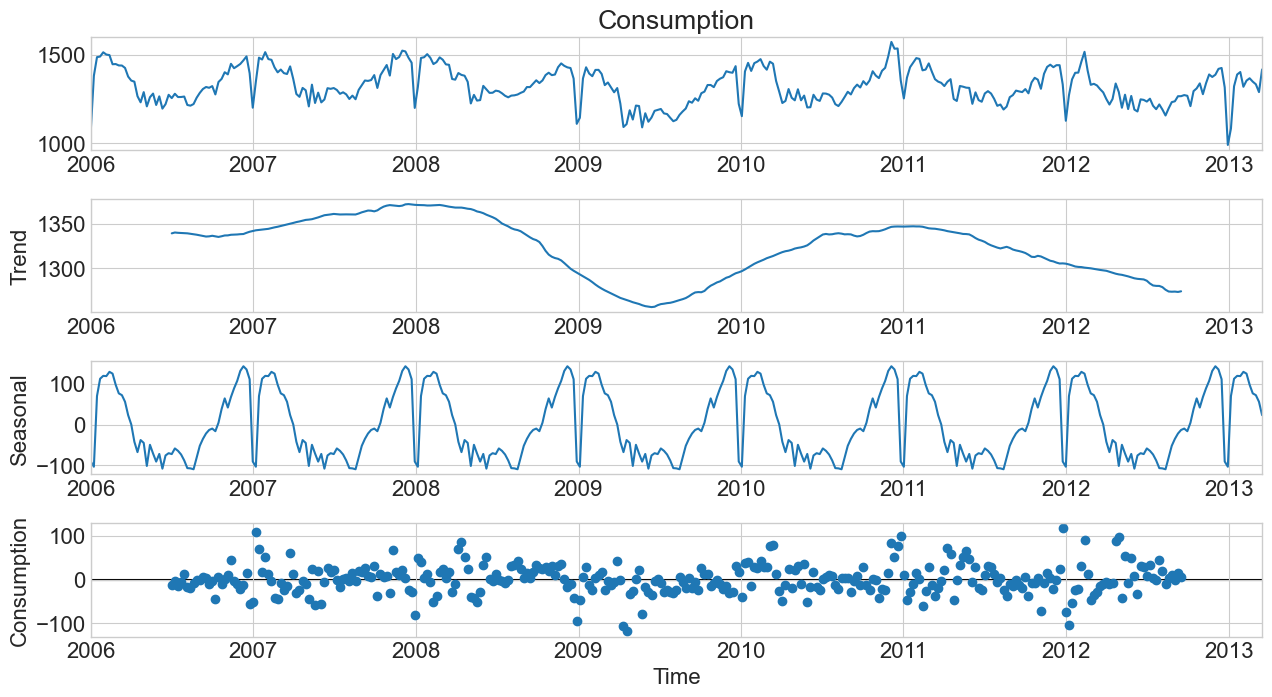

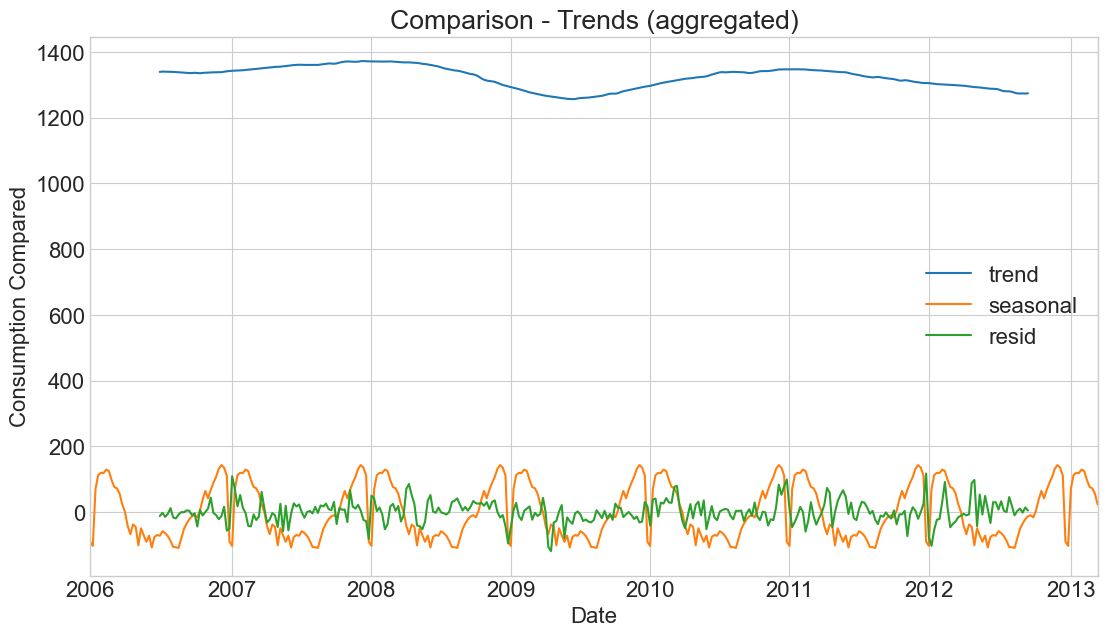

/Users/geary.shenck/codeup-data-science/time-series-exercises/explore.py:189: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_temp = train.resample(bin).mean()


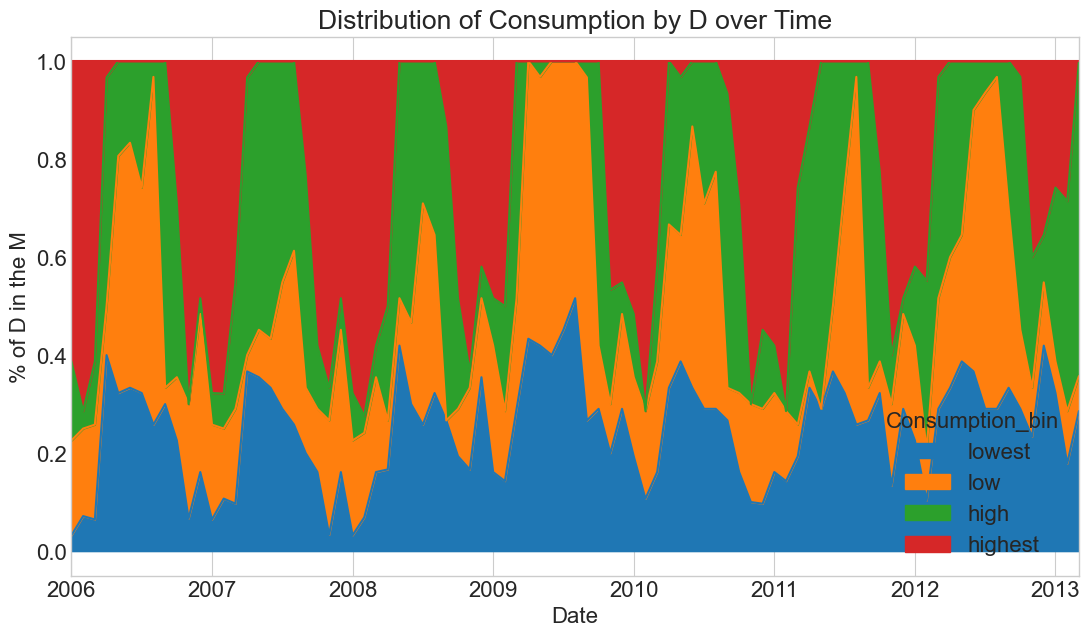

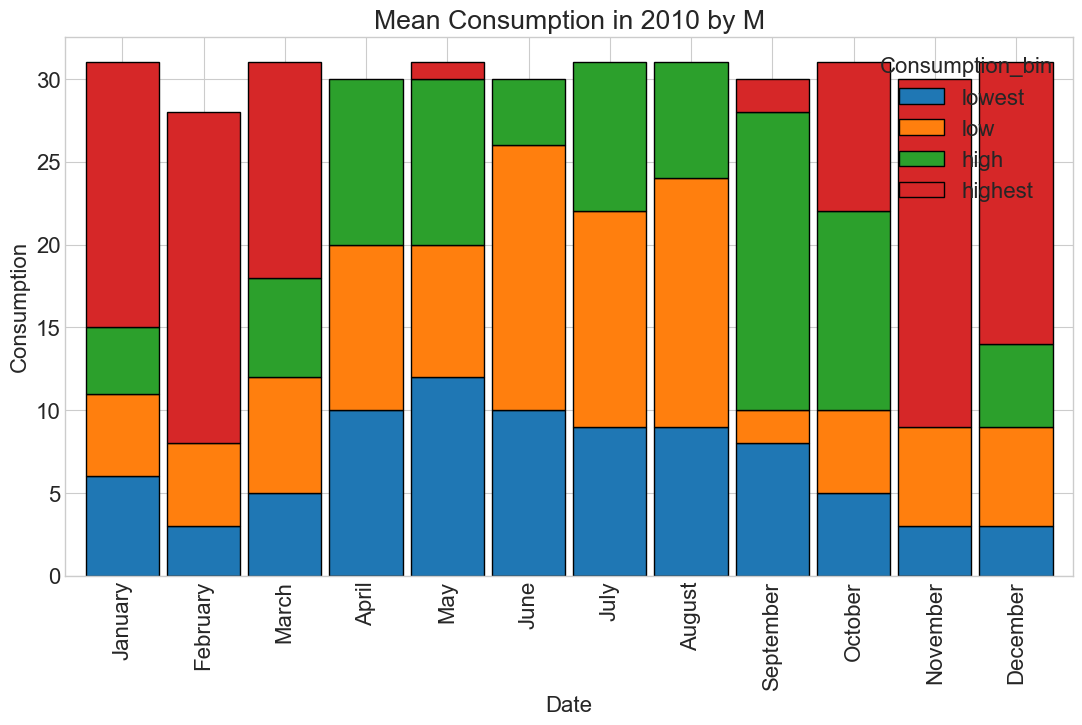

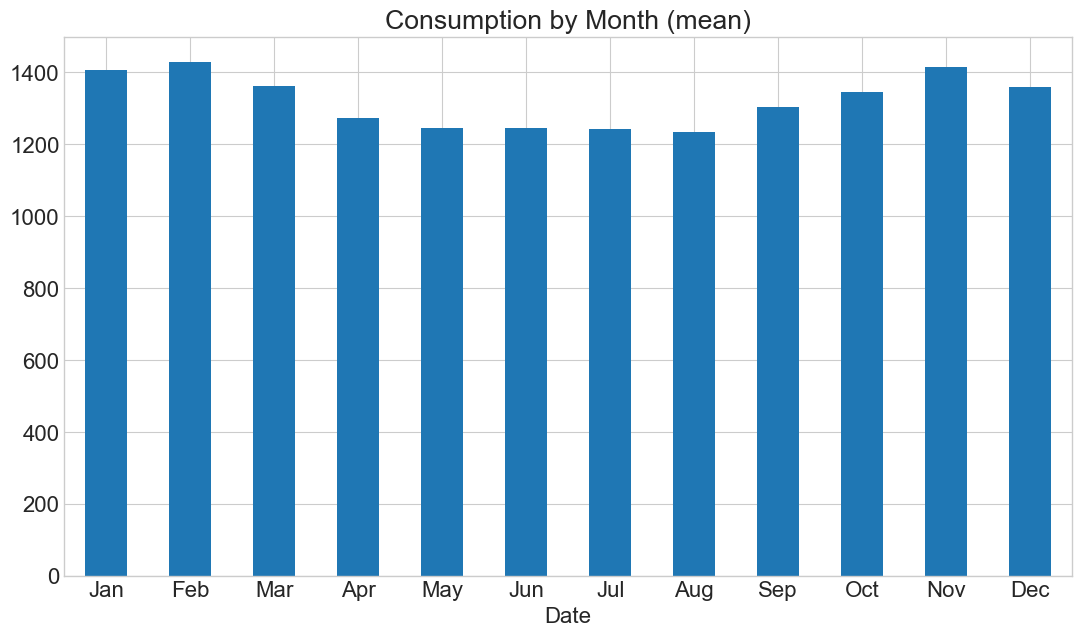

In [60]:
target="Consumption"
df = prepare.prep_germany_opsd()

train, validate, test, y_train, y_validate, y_test = explore.explore_split_time_series(df,target)
explore.explore_target_mean_time_series(y_train,target)
explore.explore_target_diff_time_series(y_train,target)
explore.explore_target_weekly_time_series(train,target)
explore.explore_target_bin_compare_time_series(train,target,bin="D",scale="M",year="2010")

store ids = [ 1  2  3  4  5  6  7  8  9 10] | store cities = ['San Antonio'] | store states = ['TX']
sale amount count = 213 | sale date count = 1826
item brand count = 49 | item name count = 50 | item_price count = 47


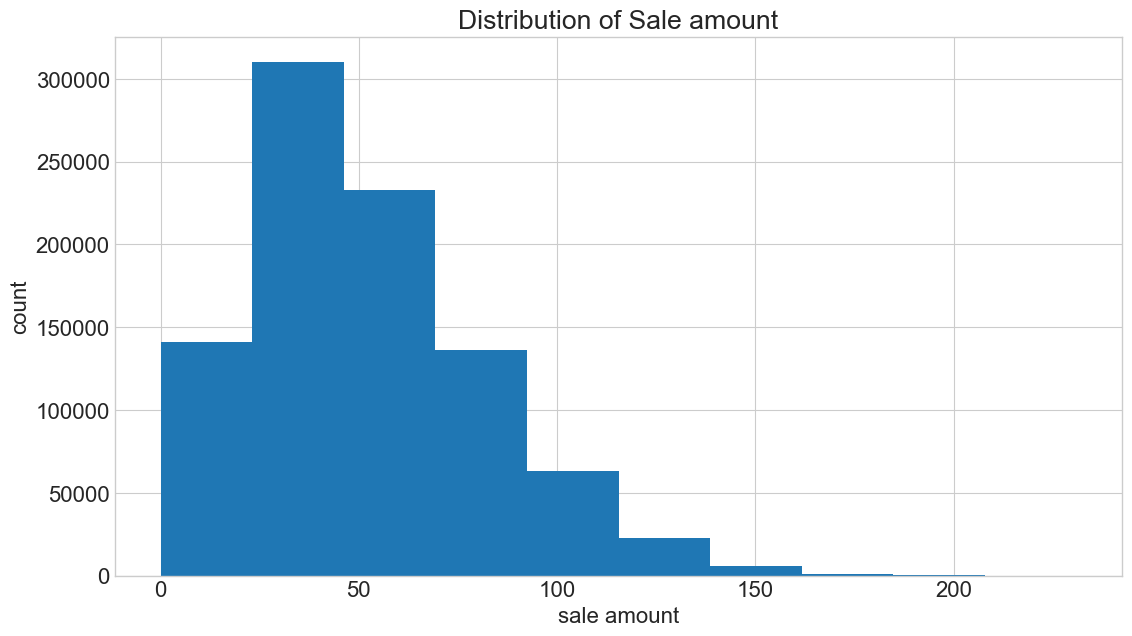

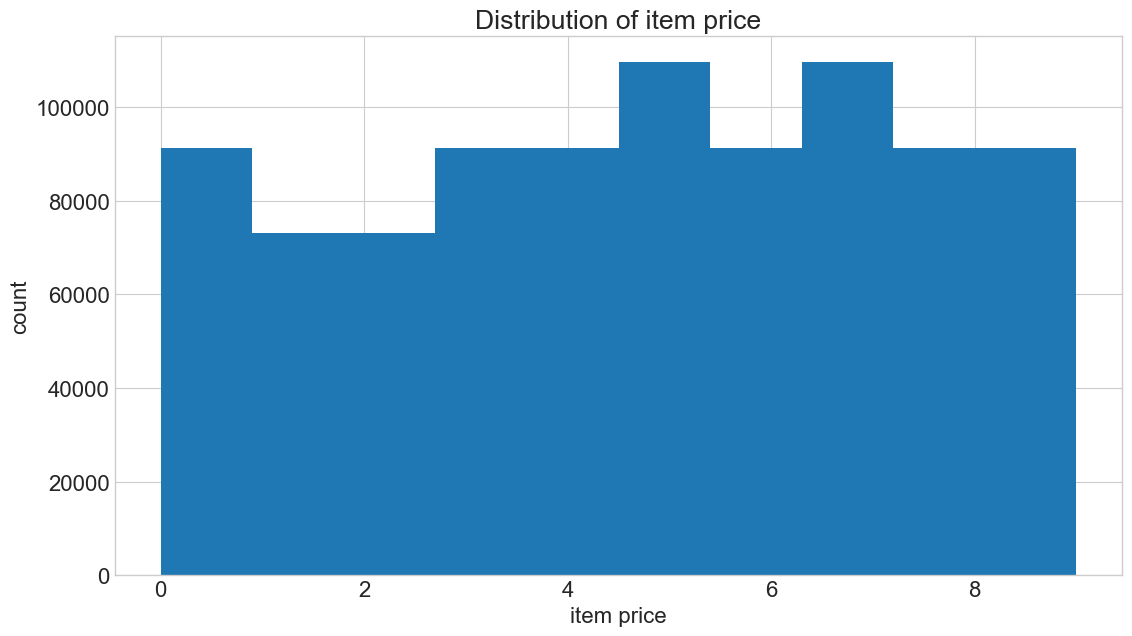

(547800, 12) train shape
(182600, 12) validate shape
(182600, 12) test shape


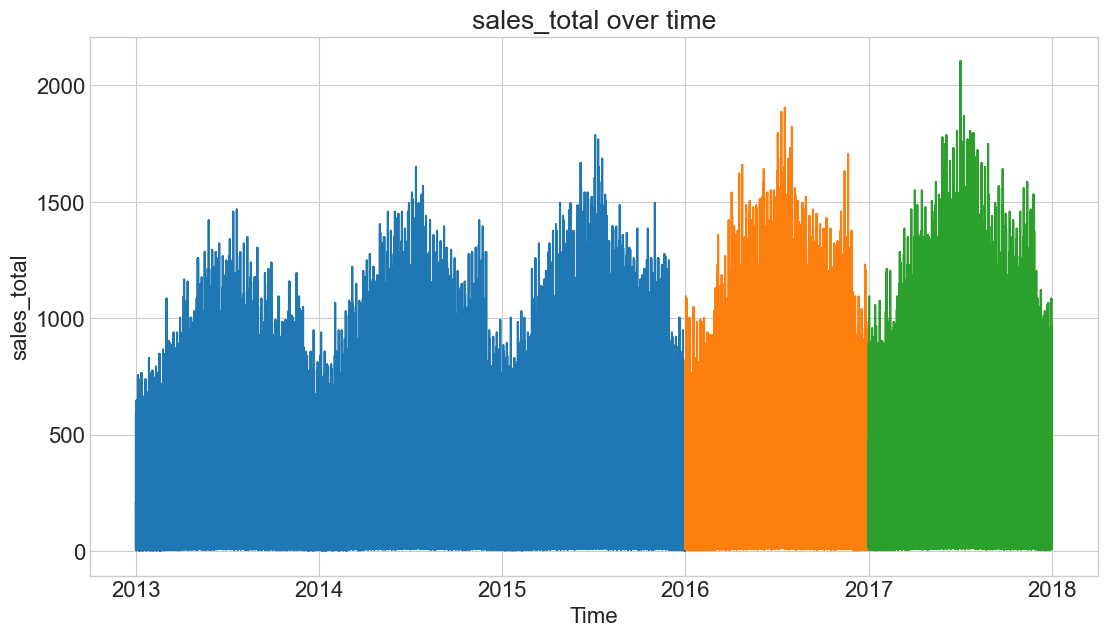

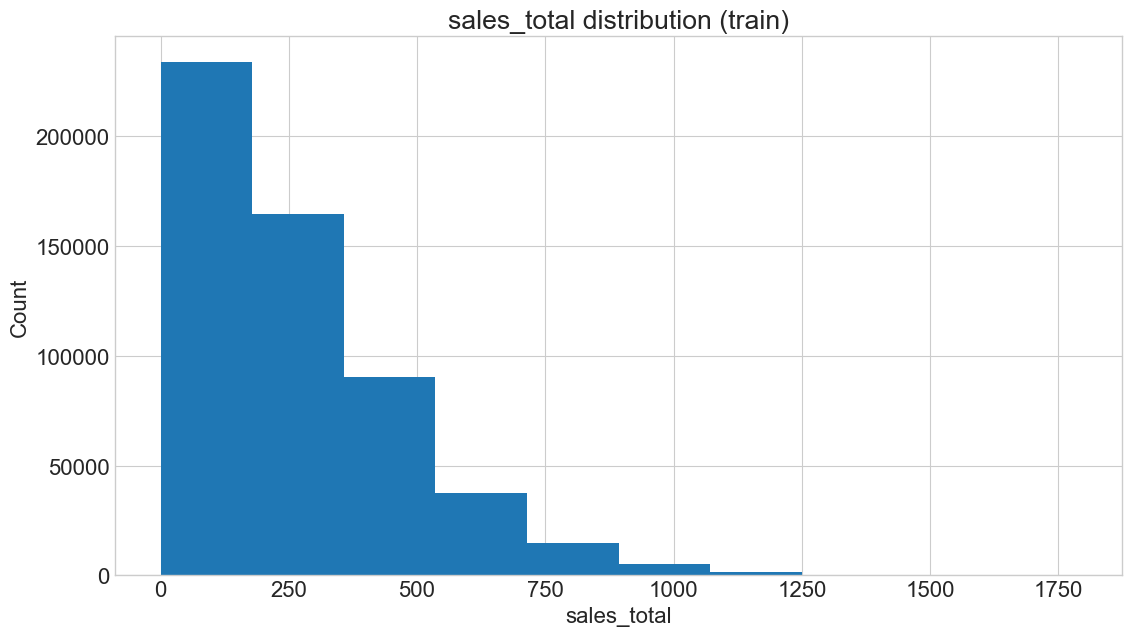

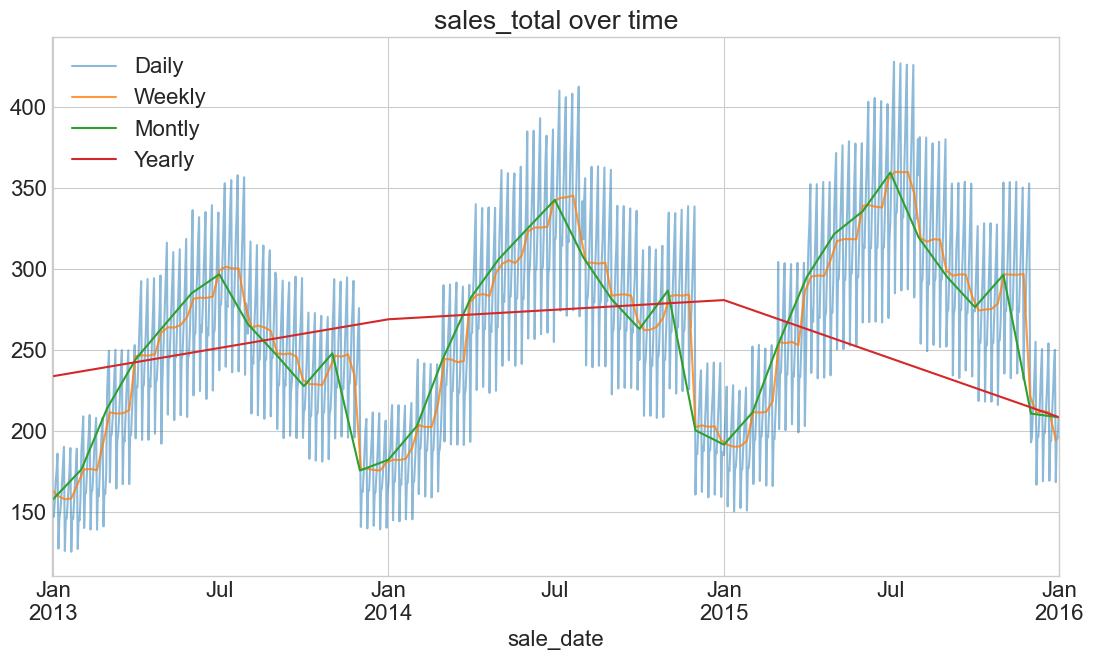

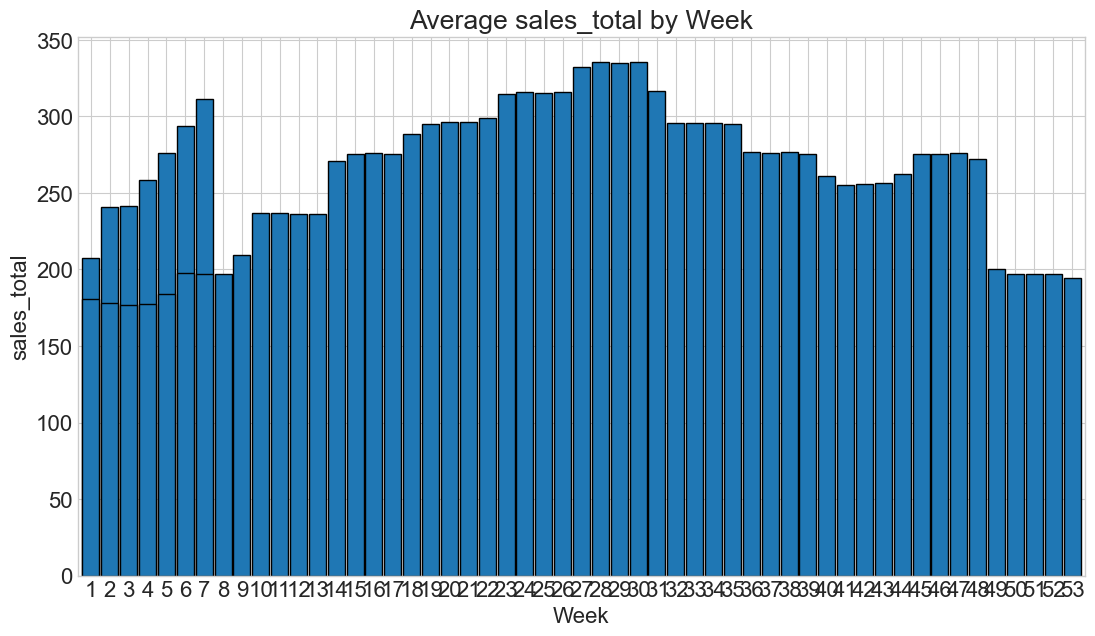

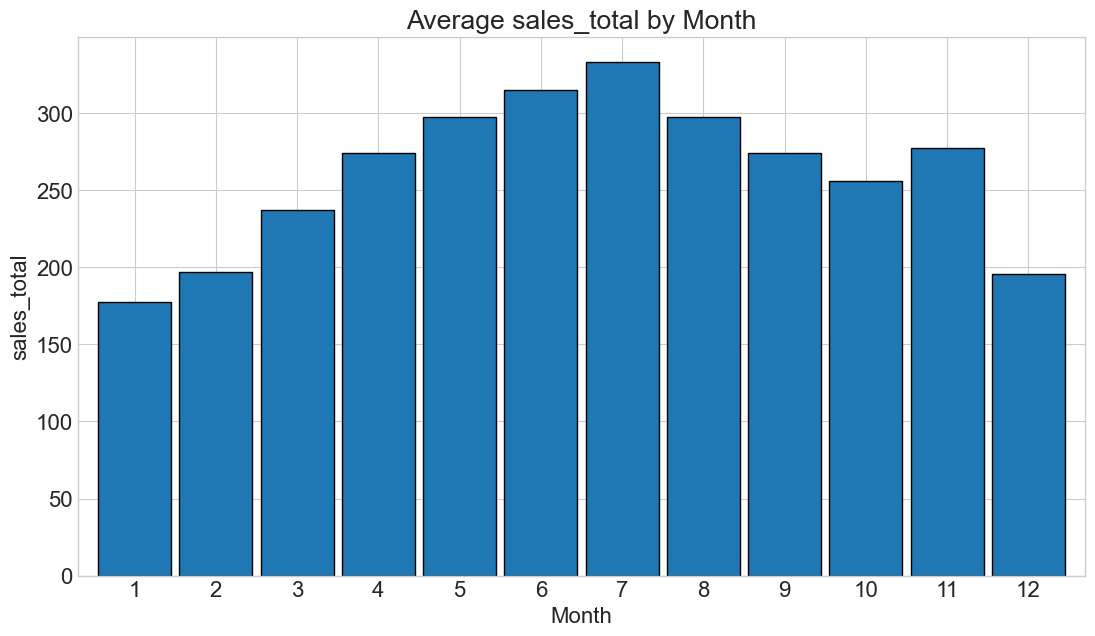

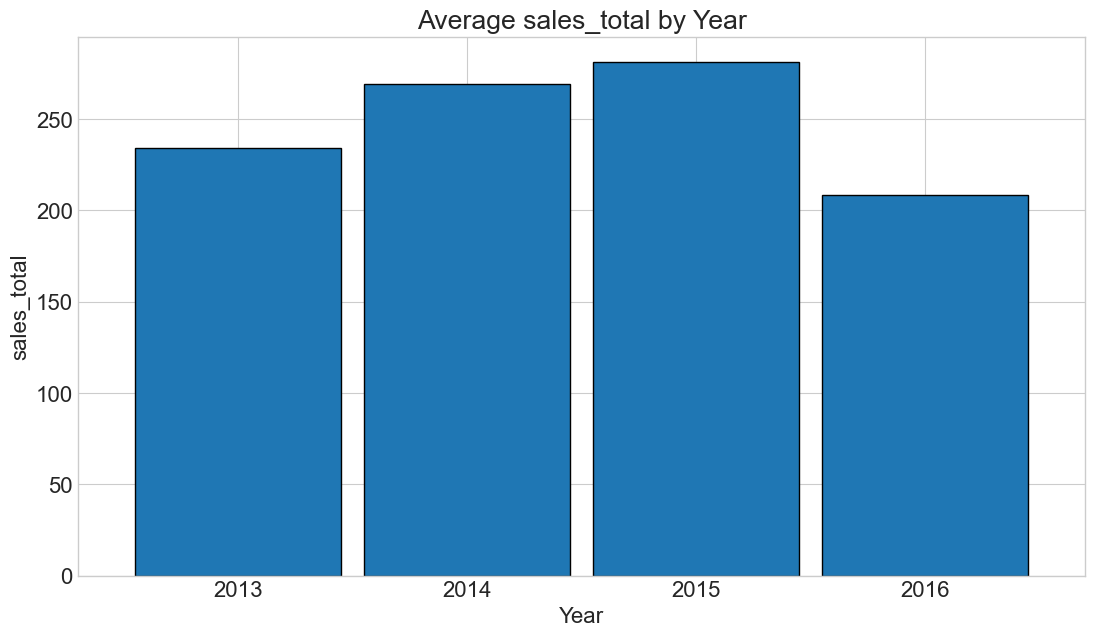

/Users/geary.shenck/codeup-data-science/time-series-exercises/explore.py:128: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ax, (month, subset) in zip(axs, table.iteritems()):


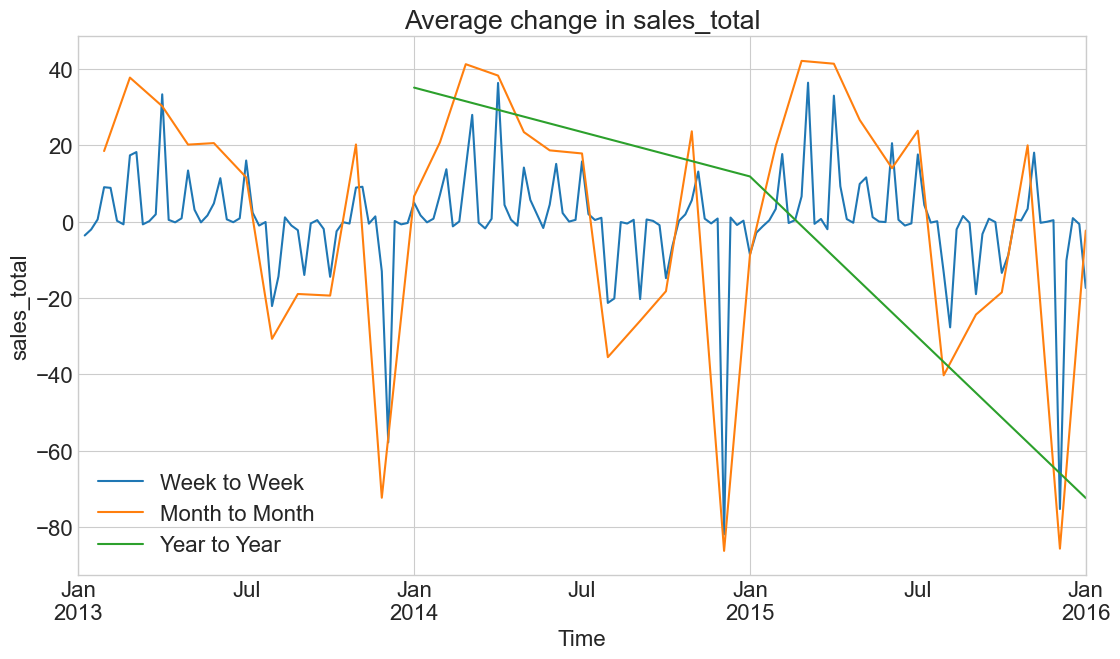

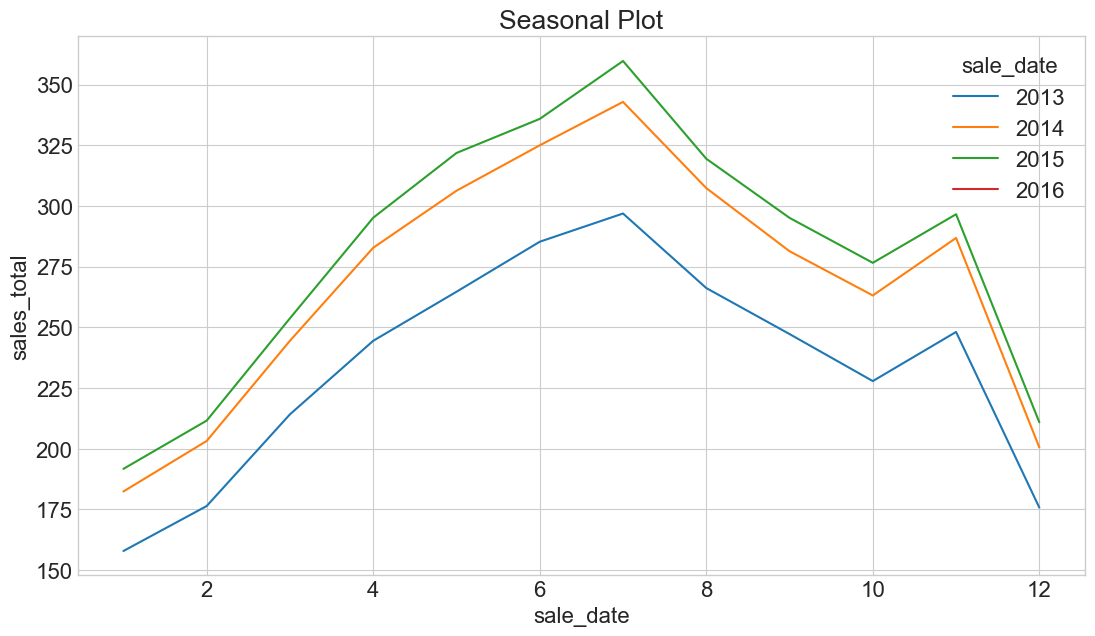

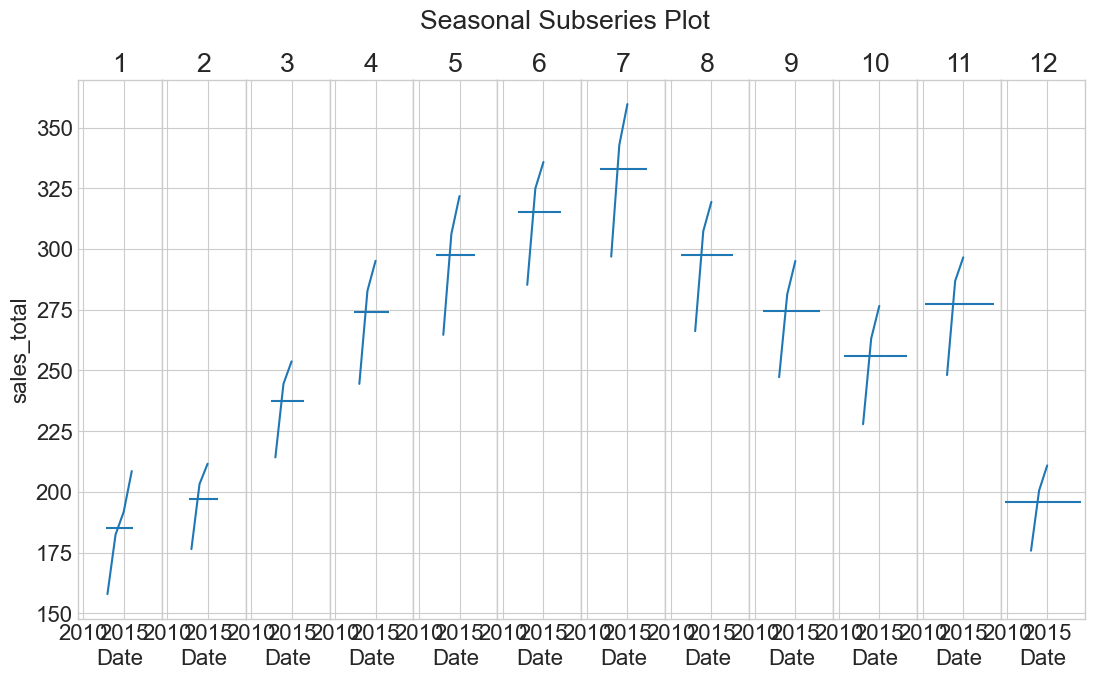

/Users/geary.shenck/codeup-data-science/time-series-exercises/explore.py:146: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = train.resample('W').mean()


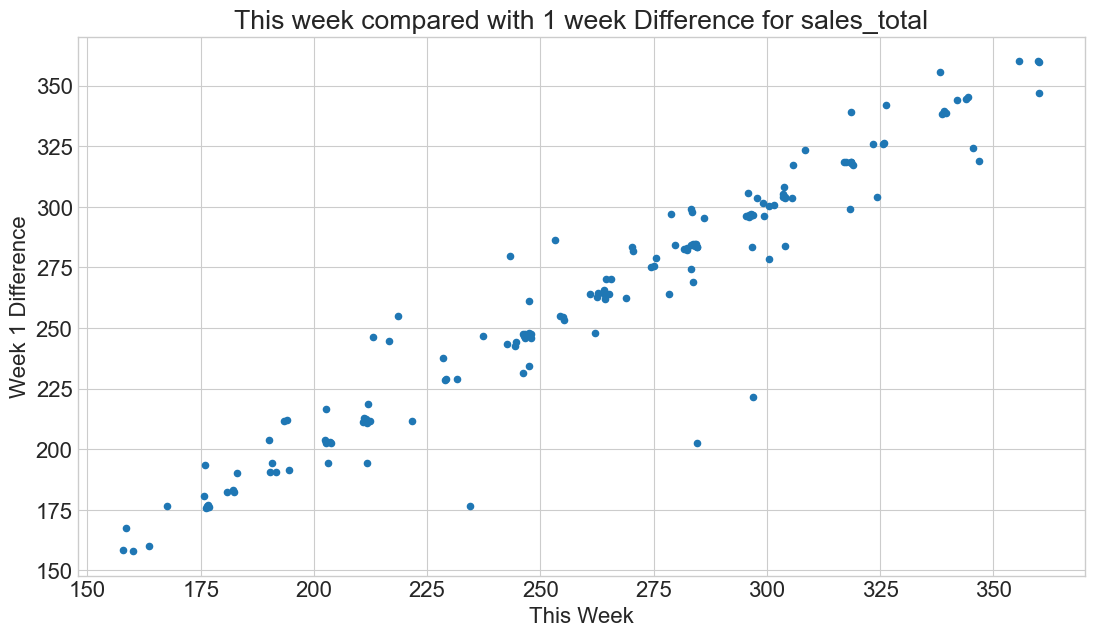

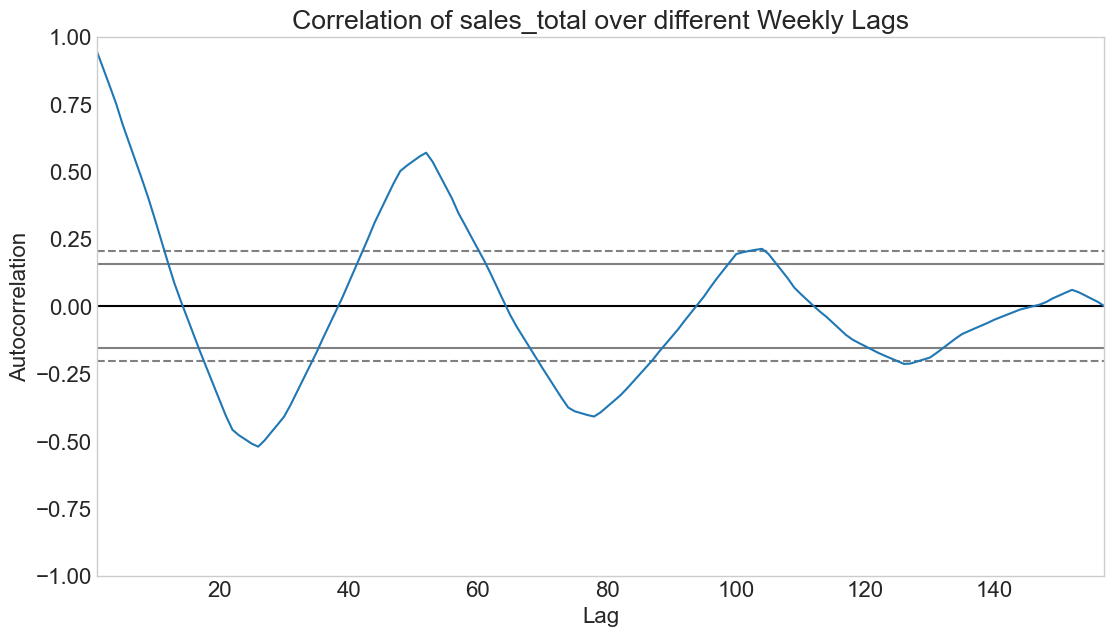

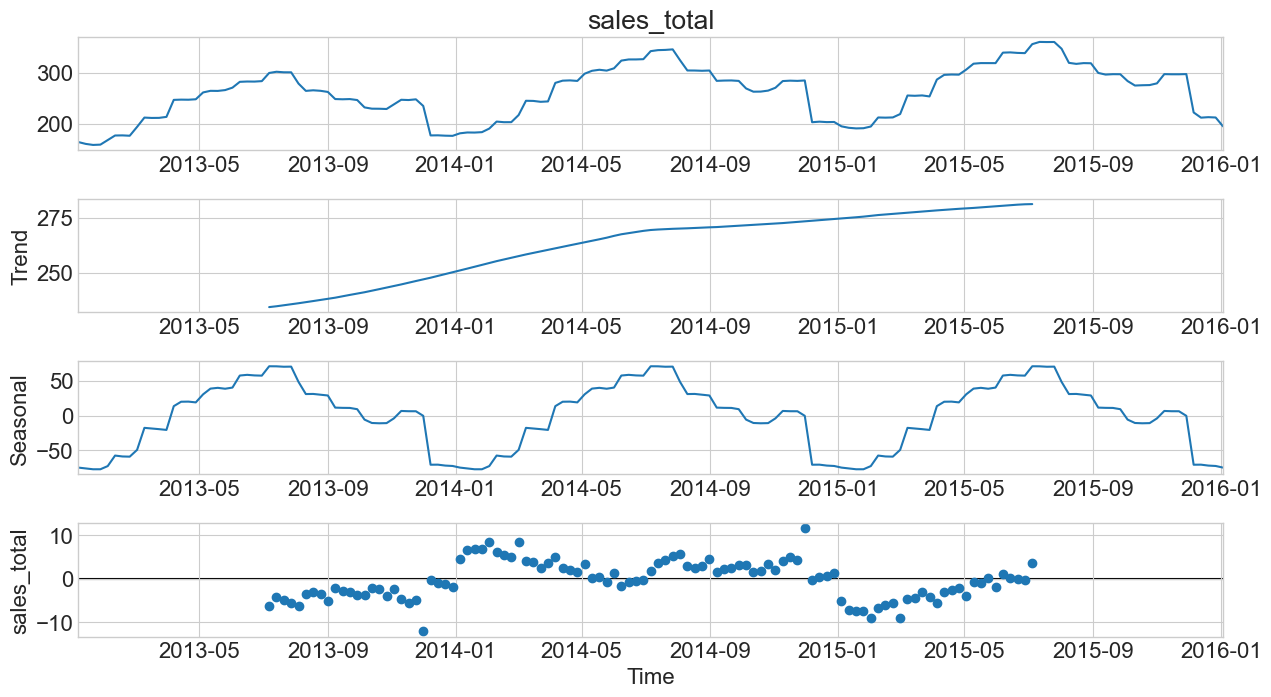

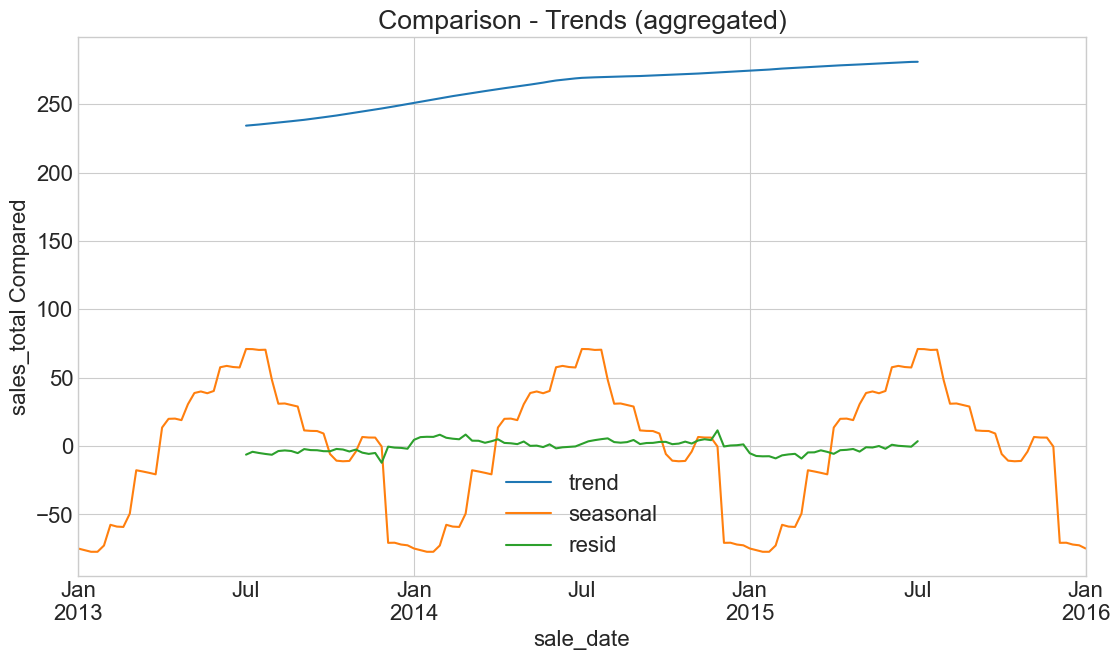

/Users/geary.shenck/codeup-data-science/time-series-exercises/explore.py:189: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_temp = train.resample(bin).mean()


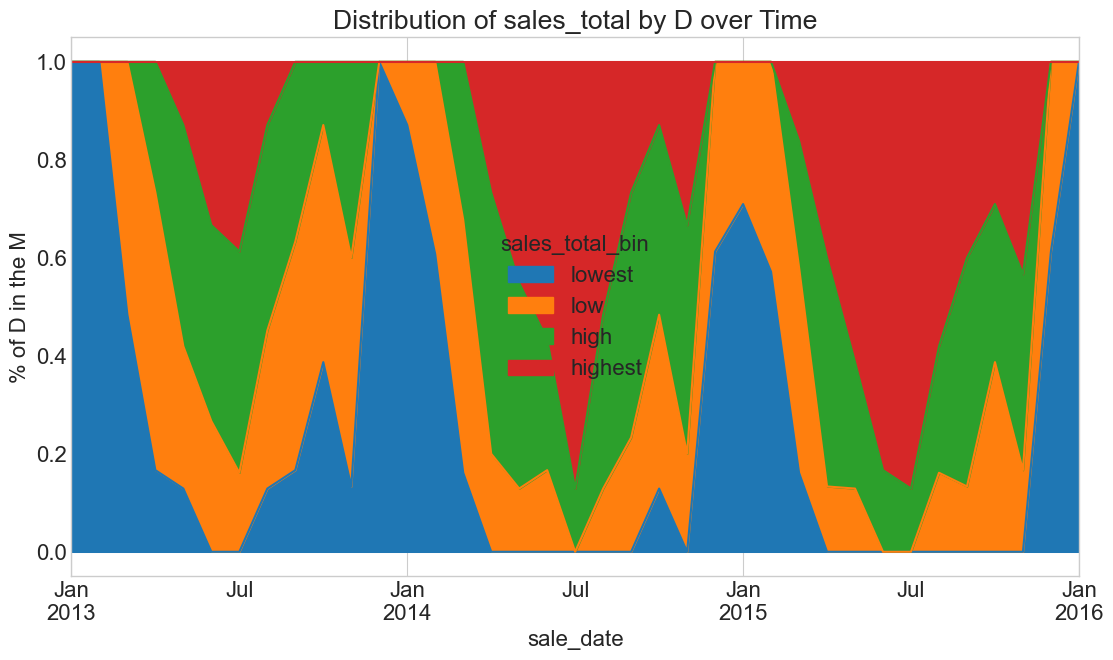

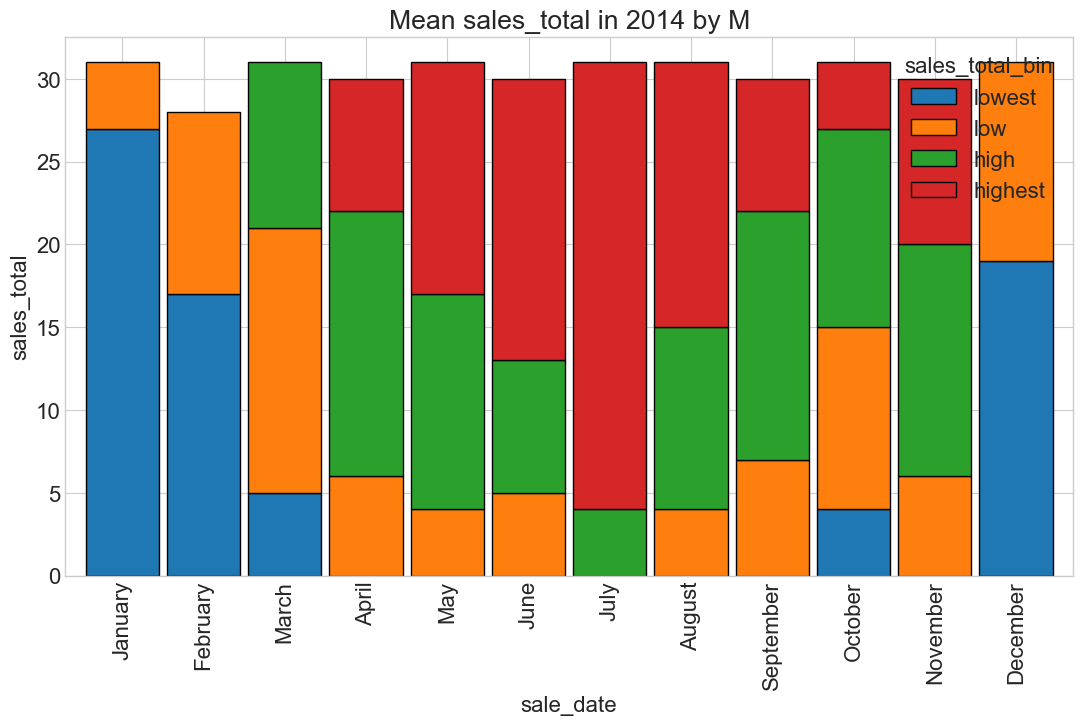

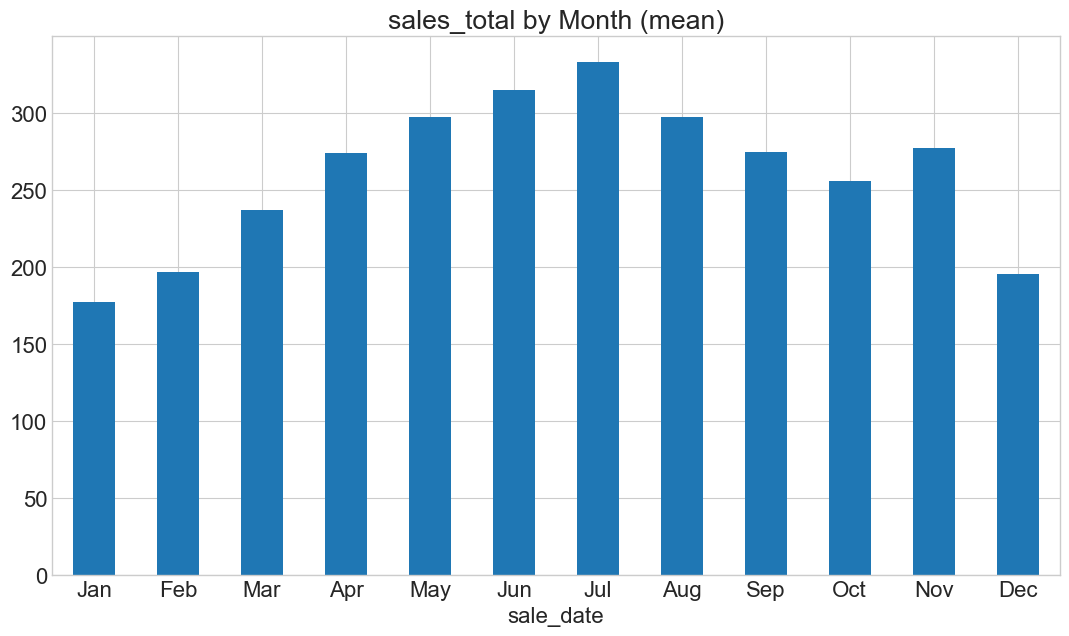

In [61]:
target="sales_total"
df = prepare.prep_sales()

train, validate, test, y_train, y_validate, y_test = explore.explore_split_time_series(df,target)
explore.explore_target_mean_time_series(y_train,target)
explore.explore_target_diff_time_series(y_train,target)
explore.explore_target_weekly_time_series(train,target)
explore.explore_target_bin_compare_time_series(train,target,bin="D",scale="M",year="2014")